# Module: ECS8055  | AI for Health |   Individual Coursework -                Lecturer: Dr Reza Rafiee

By submitting the work, I declare that:

1.	I have read and understood the University regulations relating to academic offences, including collusion and plagiarism: http://www.qub.ac.uk/directorates/AcademicStudentAffairs/AcademicAffairs/GeneralRegulations/Procedures/P roceduresforDealingwithAcademicOffences/
2.	The submission is my own original work and no part of it has been submitted for any other assignments, except as otherwise permitted.
3.	All sources used, published or unpublished, have been acknowledged.
4.	I give my consent for the work to be scanned using a plagiarism detection software.


# **Classification- The Immune Landscape of Cancer**

# **Introduction**: 
**Cancer immunotherapy has emerged as a transformative approach in oncology, relying heavily on our understanding of the immune system's interaction with cancer cells. The study "The Immune Landscape of Cancer" presents a detailed classification of immune subtypes across various cancer types using transcriptomic data. In this project, we aim to replicate and extend that work by developing a supervised classification model capable of predicting immune subtypes (C1 to C6) from high-dimensional RNA-Seq gene expression data.**

**This project represents a valuable opportunity to apply advanced machine learning techniques to a real-world health informatics challenge. By leveraging the dataset published on the Genomic Data Commons (GDC) portal, we explore how dimensionality reduction, classification algorithms, and robust evaluation strategies can be applied to accurately classify cancer patients into immune subtypes. Throughout this project, a structured Python-based Jupyter Notebook environment is used for data preparation, model development, and result interpretation. Our ultimate objective is to achieve high predictive accuracy and gain deeper insights into the immune profiling of cancer patients.**

# Step 1: Downloading Dataset, Data Preparation, Preprocessing and Visualisation

# Methodology: Step 1 - Data Pre-processing
**The first step in this project involved comprehensive data preparation and pre-processing to ensure a clean and structured dataset for downstream analysis.**

**Data Acquisition and Feature Selection:
The raw RNA-Seq dataset titled “EBPlusPlusAdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.tsv” was downloaded from the GDC portal. This dataset contains expression values for approximately 20,000 genes across thousands of patient samples.
To focus the analysis on immune-related genes, a filtering process was implemented to extract only those gene IDs identified as immune genes according to the criteria outlined in The Immune Landscape of Cancer study. This resulted in a reduced feature set comprising 440 immune-related genes.
Sample Matching and Cleaning:
Patient sample IDs were matched against the subtype labels provided in the original study to ensure alignment between features (gene expression) and targets (immune subtypes).
After merging and cleaning, a dataset of 9,130 patient samples with complete data for the 440 selected genes was obtained.
Data Transformation:
A log1p transformation was applied to the gene expression values to stabilize variance and reduce the impact of outliers. This normalization step is crucial for handling the skewed nature of RNA-Seq data.
Balanced Dataset Creation:
To ensure uniform representation across immune subtypes, a stratified random sampling strategy was employed. A fixed number of samples were randomly selected from each immune subtype as follows:
C1: 385 samples
C2: 414 samples
C3: 383 samples
C4: 462 samples
C5: 231 samples
C6: 134 samples
This process resulted in a final dataset comprising 2,009 samples and 440 gene features, ensuring balanced class distribution critical for model training and evaluation.**
# Dimensionality Reduction with NMF
**Non-negative Matrix Factorization (NMF) was applied to extract latent metagene components, providing interpretable, biologically-relevant feature sets.
A heatmap, PCA, and t-SNE were used to visualize subtype separability and component activation patterns.**

**Loading Dataset from https://gdc.cancer.gov/about-data/publications/panimmune**

In [142]:
import os
import pandas as pd


# Path to the TSV file
file_path = 'EBPlusPlusAdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.tsv'
# Reading 450K methylation data
# Read the TSV file into a pandas DataFrame
try:
    df_Immune = pd.read_csv(file_path, sep='\t',index_col=0)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path and try again.")
except Exception as e:
    print("An error occurred:", e)

Dataset loaded successfully.


In [143]:
df_Immune.shape # Explain what we see in this dataset in terms of the number of genes and samples (patients)

(20531, 11069)

**20531 are gene Ids and 11069 are patient sample Ids**

In [144]:
# Display the top 5 rows of the dataset
print("Top 5 Rows of the Dataset:")
print(df_Immune.head(5))

# Display the bottom 5 rows of the dataset
print("\nBottom 5 Rows of the Dataset:")
print(df_Immune.tail(5))

Top 5 Rows of the Dataset:
             TCGA-OR-A5J1-01A-11R-A29S-07  TCGA-OR-A5J2-01A-11R-A29S-07  \
gene_id                                                                   
?|100130426                        0.0000                        0.0000   
?|100133144                        3.2661                        2.6815   
?|100134869                        3.9385                        8.9948   
?|10357                          149.1350                       81.0777   
?|10431                         2034.1000                     1304.9300   

             TCGA-OR-A5J3-01A-11R-A29S-07  TCGA-OR-A5J5-01A-11R-A29S-07  \
gene_id                                                                   
?|100130426                        0.0000                        0.0000   
?|100133144                        1.7301                        0.0000   
?|100134869                        6.5650                        1.5492   
?|10357                           86.4879                       53.9117 

In [145]:
# Transpose the DataFrame to make genes as columns and samples as rows
df_Immune = df_Immune.transpose()

In [146]:
df_Immune.head()

gene_id                       ?|100130426  ?|100133144  ?|100134869   ?|10357  \
TCGA-OR-A5J1-01A-11R-A29S-07          0.0       3.2661       3.9385  149.1350   
TCGA-OR-A5J2-01A-11R-A29S-07          0.0       2.6815       8.9948   81.0777   
TCGA-OR-A5J3-01A-11R-A29S-07          0.0       1.7301       6.5650   86.4879   
TCGA-OR-A5J5-01A-11R-A29S-07          0.0       0.0000       1.5492   53.9117   
TCGA-OR-A5J6-01A-31R-A29S-07          0.0       0.0000       4.4709   66.9063   

gene_id                       ?|10431  ?|136542  ?|155060  ?|26823  ?|280660  \
TCGA-OR-A5J1-01A-11R-A29S-07  2034.10       0.0   274.255   1.4409       0.0   
TCGA-OR-A5J2-01A-11R-A29S-07  1304.93       0.0   199.302   0.0000       0.0   
TCGA-OR-A5J3-01A-11R-A29S-07  1054.66       0.0   348.393   0.5925       0.0   
TCGA-OR-A5J5-01A-11R-A29S-07  2350.89       0.0   439.194   0.7746       0.0   
TCGA-OR-A5J6-01A-31R-A29S-07  1257.99       0.0   149.215   0.0000       0.0   

gene_id                       ?|317712  ...  ZWILCH|55055  ZWINT|11130  \
TCGA-OR-A5J1-01A-11R-A29S-07       0.0  ...      183.9580     146.9740   
TCGA-OR-A5J2-01A-11R-A29S-07       0.0  ...      264.1250     438.4640   
TCGA-OR-A5J3-01A-11R-A29S-07       0.0  ...       90.6532     190.1940   
TCGA-OR-A5J5-01A-11R-A29S-07       0.0  ...      260.2630     840.4340   
TCGA-OR-A5J6-01A-31R-A29S-07       0.0  ...       64.2685      63.1508   

gene_id                       ZXDA|7789  ZXDB|158586  ZXDC|79364  \
TCGA-OR-A5J1-01A-11R-A29S-07    20.6532      351.585    1050.910   
TCGA-OR-A5J2-01A-11R-A29S-07    57.1735      279.023    2979.870   
TCGA-OR-A5J3-01A-11R-A29S-07    39.6978      495.334     914.827   
TCGA-OR-A5J5-01A-11R-A29S-07    17.8156      206.042     890.782   
TCGA-OR-A5J6-01A-31R-A29S-07    12.8537      117.919     894.730   

gene_id                       ZYG11A|440590  ZYG11B|79699  ZYX|7791  \
TCGA-OR-A5J1-01A-11R-A29S-07         0.4803       648.415  1841.020   
TCGA-OR-A5J2-01A-11R-A29S-07        31.4052      1166.020  3059.990   
TCGA-OR-A5J3-01A-11R-A29S-07         0.5925       806.399  2655.610   
TCGA-OR-A5J5-01A-11R-A29S-07        11.6189       553.834  2367.930   
TCGA-OR-A5J6-01A-31R-A29S-07         7.8240       795.812   708.071   

gene_id                       ZZEF1|23140  ZZZ3|26009  
TCGA-OR-A5J1-01A-11R-A29S-07     1157.540     596.062  
TCGA-OR-A5J2-01A-11R-A29S-07     1895.990     801.637  
TCGA-OR-A5J3-01A-11R-A29S-07     1482.450     437.269  
TCGA-OR-A5J5-01A-11R-A29S-07     1140.200     512.781  
TCGA-OR-A5J6-01A-31R-A29S-07      796.371     475.587  

[5 rows x 20531 columns]

# It has been observed that Main datet has 20531 gene IDs and 11069 Samples/ Now we have to reduce datset till 440 gene IDs and 9126 samples

**Now loading reduced dataset given by referring research paper and  PanCanAtlas_9126RNASeqSamplesWithImmuneSubtypes_440Genes_SampleIdsOrdered_SampleIdWithSubtypes_RR020718_RownamesGenesWithSignature.csv**

In [149]:
# You can also accomplish this without using the chunk function.
# Path to the TSV file
import pandas as pd
# Path to the TSV file
file_path = './PanCanAtlas_9126RNASeqSamplesWithImmuneSubtypes_440Genes_SampleIdsOrdered_SampleIdWithSubtypes_RR020718_RownamesGenesWithSignature.csv'
# Reading 450K methylation data
# Read the TSV file into a pandas DataFrame
try:
    df_Immune2 = pd.read_csv(file_path,index_col=0)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path and try again.")
except Exception as e:
    print("An error occurred:", e)


Dataset loaded successfully.


In [150]:
df_Immune2.head()

TCGA.02.0047.GBM.C4  TCGA.02.0055.GBM.C4  TCGA.02.2483.GBM.C4  \
ACTL6A_S5               745.567             1154.310             1498.680   
ADAM9_S2               4287.780             9475.540             2307.120   
ADAMTS1_S5              241.556             6098.950              433.984   
ADCY7_S3               1067.640              556.132              497.309   
AIMP2_S5                406.736              537.088              752.148   

            TCGA.02.2485.GBM.C4  TCGA.02.2486.GBM.C4  TCGA.04.1348.OV.C2  \
ACTL6A_S5              1320.000             1404.270         3504.629533   
ADAM9_S2               2685.710             2843.900         1107.601536   
ADAMTS1_S5              911.905              321.951         1956.185336   
ADCY7_S3                316.667              637.805          561.609041   
AIMP2_S5                785.552              792.963         1838.741423   

            TCGA.04.1357.OV.C2  TCGA.04.1362.OV.C4  TCGA.04.1364.OV.C1  \
ACTL6A_S5          1293.399416         2882.595819         2020.798919   
ADAM9_S2           1064.576057         2617.298339         1093.064945   
ADAMTS1_S5         1916.188921         1367.380382          604.273517   
ADCY7_S3            886.611634          473.008085          348.507899   
AIMP2_S5            805.563620          363.847507         1133.047832   

            TCGA.04.1365.OV.C2  ...  TCGA.ZP.A9D2.LIHC.C2  \
ACTL6A_S5          2793.364138  ...               986.536   
ADAM9_S2           1086.625845  ...              3511.280   
ADAMTS1_S5         3263.023906  ...               489.811   
ADCY7_S3            359.943652  ...               264.920   
AIMP2_S5           1080.598945  ...               721.026   

            TCGA.ZP.A9D4.LIHC.C4  TCGA.ZQ.A9CR.STAD.C1  TCGA.ZR.A9CJ.ESCA.C1  \
ACTL6A_S5                610.380           1491.324446           1252.608630   
ADAM9_S2                 368.265           5451.959018           7047.163688   
ADAMTS1_S5               626.785           3690.093898           1634.302502   
ADCY7_S3                 113.704            561.088712           1464.455684   
AIMP2_S5                 744.947            738.072372            516.796893   

            TCGA.ZS.A9CD.LIHC.C3  TCGA.ZS.A9CE.LIHC.C4  TCGA.ZS.A9CF.LIHC.C4  \
ACTL6A_S5                386.176               472.648               831.151   
ADAM9_S2                 416.228               178.884               504.480   
ADAMTS1_S5              2046.580               135.667              1062.720   
ADCY7_S3                 100.676                35.558               126.120   
AIMP2_S5                 980.841              1434.800               492.357   

            TCGA.ZS.A9CG.LIHC.C3  TCGA.ZU.A8S4.CHOL.C1  TCGA.ZX.AA5X.CESC.C2  
ACTL6A_S5                333.162              1176.620              1021.660  
ADAM9_S2                 920.651              7189.330              3178.650  
ADAMTS1_S5               467.524               512.028               608.662  
ADCY7_S3                 209.769               933.317              1081.210  
AIMP2_S5                 730.687               479.591               352.281  

[5 rows x 9126 columns]

In [151]:
df_Immune2 = df_Immune2.transpose()
df_Immune2.head()

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  AIMP2_S5  \
TCGA.02.0047.GBM.C4    745.567   4287.78     241.556  1067.640   406.736   
TCGA.02.0055.GBM.C4   1154.310   9475.54    6098.950   556.132   537.088   
TCGA.02.2483.GBM.C4   1498.680   2307.12     433.984   497.309   752.148   
TCGA.02.2485.GBM.C4   1320.000   2685.71     911.905   316.667   785.552   
TCGA.02.2486.GBM.C4   1404.270   2843.90     321.951   637.805   792.963   

                     ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  APITD1_S5  APOC1_S3  \
TCGA.02.0047.GBM.C4    518.148    1326.410   326.992    184.308   1370.66   
TCGA.02.0055.GBM.C4    942.957    4211.350   361.598    319.535   3093.48   
TCGA.02.2483.GBM.C4    656.042     566.543   196.728    311.443   3504.38   
TCGA.02.2485.GBM.C4    953.809     307.143    80.000    260.462   2482.86   
TCGA.02.2486.GBM.C4    815.244    5671.950   542.683    494.488  12512.80   

                     ...  VTA1_S5  WDHD1_S5  WDR54_S5  WDR77_S5  WIPF1_S3  \
TCGA.02.0047.GBM.C4  ...  1230.52  107.5630   321.460   925.044  2154.950   
TCGA.02.0055.GBM.C4  ...  1183.46  162.5790   585.844   931.184  1947.580   
TCGA.02.2483.GBM.C4  ...  1514.30  267.2300   561.055  1370.770  1042.740   
TCGA.02.2485.GBM.C4  ...  1577.62  309.5240   422.381   811.905   849.524   
TCGA.02.2486.GBM.C4  ...  1484.76   45.7317   669.512   954.878  2454.880   

                     WNT2B_S2  WNT8B_S2  WSB2_S5  ZWILCH_S5    ZYX_S2  
TCGA.02.0047.GBM.C4   43.0253    0.0000  4291.47    260.211   3867.97  
TCGA.02.0055.GBM.C4   44.8493    0.0000  2494.18    467.560  11481.40  
TCGA.02.2483.GBM.C4   10.1319    0.8443  4128.76    682.242   5066.81  
TCGA.02.2485.GBM.C4   18.5714    0.9524  3609.52    440.386   5090.95  
TCGA.02.2486.GBM.C4    7.3171    0.6098  2747.56    166.689   7800.00  

[5 rows x 440 columns]

In [152]:
# Step 1: Extract gene symbols from both datasets
# df_Immune: gene names like ZWILCH|55055 → extract 'ZWILCH'
df_Immune.columns = [col.split('|')[0] for col in df_Immune.columns]

# df_Immune2: gene names like ACTL6A_S5 → extract 'ACTL6A'
symbol_to_full = {col.split('_')[0]: col for col in df_Immune2.columns}
immune2_symbols = set(symbol_to_full.keys())

# Step 2: Get common genes between both datasets
common_gene_ids = [gene for gene in df_Immune.columns if gene in immune2_symbols]

# Step 3: Filter df_Immune to keep only common genes
df_440_Genes = df_Immune[common_gene_ids].copy()

# Step 4: Rename columns in df_filtered to match df_Immune2 column names
df_440_Genes.rename(columns={gene: symbol_to_full[gene] for gene in common_gene_ids}, inplace=True)

# Final shape check
print("Final shape:", df_440_Genes.shape)  # Should be (11069, up to 440)


Final shape: (11069, 440)


In [153]:
df_440_Genes.head()

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  \
TCGA-OR-A5J1-01A-11R-A29S-07    829.011   542.267    377.0410   183.477   
TCGA-OR-A5J2-01A-11R-A29S-07    935.310  1612.130   1453.5000   281.036   
TCGA-OR-A5J3-01A-11R-A29S-07    756.036  1101.470    777.9590   117.316   
TCGA-OR-A5J5-01A-11R-A29S-07    512.006   431.449     48.7994   333.075   
TCGA-OR-A5J6-01A-31R-A29S-07    410.760  2296.900    310.7240   250.368   

                              AIMP2_S5  ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  \
TCGA-OR-A5J1-01A-11R-A29S-07   338.823    974.544     83.5735   163.785   
TCGA-OR-A5J2-01A-11R-A29S-07  1001.020    812.508      9.2605   332.975   
TCGA-OR-A5J3-01A-11R-A29S-07  1081.980   1422.010     53.3254   347.208   
TCGA-OR-A5J5-01A-11R-A29S-07   198.474   1307.510     10.0697   115.414   
TCGA-OR-A5J6-01A-31R-A29S-07   477.403   1442.970    326.3720   939.997   

                              APITD1_S5   APOC1_S3  ...   VTA1_S5  WDHD1_S5  \
TCGA-OR-A5J1-01A-11R-A29S-07   321.7190   1875.120  ...  1124.880   64.3612   
TCGA-OR-A5J2-01A-11R-A29S-07    61.1998    237.552  ...  1008.190  162.6630   
TCGA-OR-A5J3-01A-11R-A29S-07   210.2740   4049.180  ...   537.994  183.6770   
TCGA-OR-A5J5-01A-11R-A29S-07   208.9080    646.785  ...   455.461  192.8740   
TCGA-OR-A5J6-01A-31R-A29S-07   225.7780  79054.200  ...   989.176   21.2366   

                               WDR54_S5  WDR77_S5  WIPF1_S3  WNT2B_S2  \
TCGA-OR-A5J1-01A-11R-A29S-07   411.6230   951.489   571.086   11.5274   
TCGA-OR-A5J2-01A-11R-A29S-07    64.0182   805.663   584.217   10.8710   
TCGA-OR-A5J3-01A-11R-A29S-07  1183.8200   865.649   158.791    0.5925   
TCGA-OR-A5J5-01A-11R-A29S-07   509.6820   574.748   343.919   17.0411   
TCGA-OR-A5J6-01A-31R-A29S-07   483.9700   582.888   393.435   11.1771   

                              WNT8B_S2  WSB2_S5  ZWILCH_S5    ZYX_S2  
TCGA-OR-A5J1-01A-11R-A29S-07    0.0000  1731.51   183.9580  1841.020  
TCGA-OR-A5J2-01A-11R-A29S-07    0.4026  5007.11   264.1250  3059.990  
TCGA-OR-A5J3-01A-11R-A29S-07    3.5550  2508.67    90.6532  2655.610  
TCGA-OR-A5J5-01A-11R-A29S-07    0.7746  1889.23   260.2630  2367.930  
TCGA-OR-A5J6-01A-31R-A29S-07    0.0000  3739.87    64.2685   708.071  

[5 rows x 440 columns]

In [154]:
print(df_440_Genes.index)

Index(['TCGA-OR-A5J1-01A-11R-A29S-07', 'TCGA-OR-A5J2-01A-11R-A29S-07',
       'TCGA-OR-A5J3-01A-11R-A29S-07', 'TCGA-OR-A5J5-01A-11R-A29S-07',
       'TCGA-OR-A5J6-01A-31R-A29S-07', 'TCGA-OR-A5J7-01A-11R-A29S-07',
       'TCGA-OR-A5J8-01A-11R-A29S-07', 'TCGA-OR-A5J9-01A-11R-A29S-07',
       'TCGA-OR-A5JA-01A-11R-A29S-07', 'TCGA-OR-A5JB-01A-11R-A29S-07',
       ...
       'TCGA-CG-4449-01A-01R-1157-13', 'TCGA-CG-4462-01A-01R-1157-13',
       'TCGA-CG-4465-01A-01R-1157-13', 'TCGA-CG-4466-01A-01R-1157-13',
       'TCGA-CG-4469-01A-01R-1157-13', 'TCGA-CG-4472-01A-01R-1157-13',
       'TCGA-CG-4474-01A-02R-1157-13', 'TCGA-CG-4475-01A-01R-1157-13',
       'TCGA-CG-4476-01A-01R-1157-13', 'TCGA-CG-4477-01A-01R-1157-13'],
      dtype='object', length=11069)


**Loading dataset from Supplemental Datasets of The Immune Landsape of Cancer**

In [156]:
import pandas as pd

# Load the Excel file
file_path = "./Table1-s2.0-S1074761318301213-mmc2.xlsx"
df_Table1 = pd.read_excel(file_path, engine='openpyxl')

# Display the first few rows
print(df_Table1.head())

  TCGA Participant Barcode TCGA Study Immune Subtype          TCGA Subtype  \
0             TCGA-01-0639         OV            NaN                   NaN   
1             TCGA-02-0007        GBM            NaN  GBM_LGG.Classic-like   
2             TCGA-02-0011        GBM            NaN      GBM_LGG.LGm6-GBM   
3             TCGA-02-0023        GBM            NaN              GBM_LGG.   
4             TCGA-02-0025        GBM            NaN              GBM_LGG.   

   Leukocyte Fraction  Stromal Fraction  Intratumor Heterogeneity  \
0                 NaN               NaN                       NaN   
1            0.047660               NaN                       NaN   
2            0.062099               NaN                       NaN   
3                 NaN               NaN                       NaN   
4                 NaN               NaN                       NaN   

   TIL Regional Fraction  Proliferation  Wound Healing  ...  T Cells CD8  \
0                    NaN            NaN 

# Keeping only Solid Tumours

In [158]:
# List of 30 solid tumor types
solid_tumor_types = [
    "UVM", "ACC", "UCS", "KICH", "LGG", "PCPG", "PRAD", "THCA", "OV", "CHOL",
    "READ", "SKCM", "UCEC", "GBM", "SARC", "LIHC", "COAD", "KIRP", "BRCA", "BLCA",
    "ESCA", "CESC", "KIRC", "MESO", "STAD", "TGCT", "HNSC", "PAAD", "LUAD", "LUSC"
]

# Assuming the 1st column is 'TCGA Participant Barcode' and 2nd column is 'TCGA Study'
filtered_df_solid_tumors_30 = df_Table1[df_Table1.iloc[:, 1].isin(solid_tumor_types)]  # Filter based on 'TCGA Study'

# Select only the 'TCGA Participant Barcode' column
#filtered_df_solid_tumors_30 = filtered_df_solid_tumors.iloc[:, 0]

# Display the filtered samples
print(filtered_df_solid_tumors_30.head())

  TCGA Participant Barcode TCGA Study Immune Subtype          TCGA Subtype  \
0             TCGA-01-0639         OV            NaN                   NaN   
1             TCGA-02-0007        GBM            NaN  GBM_LGG.Classic-like   
2             TCGA-02-0011        GBM            NaN      GBM_LGG.LGm6-GBM   
3             TCGA-02-0023        GBM            NaN              GBM_LGG.   
4             TCGA-02-0025        GBM            NaN              GBM_LGG.   

   Leukocyte Fraction  Stromal Fraction  Intratumor Heterogeneity  \
0                 NaN               NaN                       NaN   
1            0.047660               NaN                       NaN   
2            0.062099               NaN                       NaN   
3                 NaN               NaN                       NaN   
4                 NaN               NaN                       NaN   

   TIL Regional Fraction  Proliferation  Wound Healing  ...  T Cells CD8  \
0                    NaN            NaN 

In [159]:
filtered_df_solid_tumors_30.shape

(10706, 64)

In [160]:
# Optionally, save the filtered data to a new file
filtered_df_solid_tumors_30.to_csv("filtered_df_solid_tumors_30_NA.csv", index=False)

In [161]:
filtered_df_solid_tumors_30.head()

TCGA Participant Barcode TCGA Study Immune Subtype          TCGA Subtype  \
0             TCGA-01-0639         OV            NaN                   NaN   
1             TCGA-02-0007        GBM            NaN  GBM_LGG.Classic-like   
2             TCGA-02-0011        GBM            NaN      GBM_LGG.LGm6-GBM   
3             TCGA-02-0023        GBM            NaN              GBM_LGG.   
4             TCGA-02-0025        GBM            NaN              GBM_LGG.   

   Leukocyte Fraction  Stromal Fraction  Intratumor Heterogeneity  \
0                 NaN               NaN                       NaN   
1            0.047660               NaN                       NaN   
2            0.062099               NaN                       NaN   
3                 NaN               NaN                       NaN   
4                 NaN               NaN                       NaN   

   TIL Regional Fraction  Proliferation  Wound Healing  ...  T Cells CD8  \
0                    NaN            NaN            NaN  ...          NaN   
1                    NaN            NaN            NaN  ...          NaN   
2                    NaN            NaN            NaN  ...          NaN   
3                    NaN            NaN            NaN  ...          NaN   
4                    NaN            NaN            NaN  ...          NaN   

   T Cells Follicular Helper  T Cells gamma delta  T Cells Regulatory Tregs  \
0                        NaN                  NaN                       NaN   
1                        NaN                  NaN                       NaN   
2                        NaN                  NaN                       NaN   
3                        NaN                  NaN                       NaN   
4                        NaN                  NaN                       NaN   

   Lymphocytes  Neutrophils.1  Eosinophils.1  Mast Cells  Dendritic Cells  \
0          NaN            NaN            NaN         NaN              NaN   
1          NaN            NaN            NaN         NaN              NaN   
2          NaN            NaN            NaN         NaN              NaN   
3          NaN            NaN            NaN         NaN              NaN   
4          NaN            NaN            NaN         NaN              NaN   

   Macrophages  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 64 columns]

# Now keeping all samples having Immune Subtype [C1,C2,C3,C4,C5,C6], Saving samples in other csv whose subtype is not NA for testing Purpose.

In [163]:
# Define the immune subtypes of interest
immune_subtypes = ["C1", "C2", "C3", "C4", "C5", "C6"]


# Filter samples whose 'Immune Subtype' matches C1, C2, C3, C5, or C6
filtered_samples_has_immune = filtered_df_solid_tumors_30[filtered_df_solid_tumors_30.iloc[:, 2].isin(immune_subtypes)]

# Store rows where 'Immune Subtype' is missing (NA)
missing_subtype_samples = filtered_df_solid_tumors_30[filtered_df_solid_tumors_30.iloc[:, 2].isna()]

# Save the filtered data for later use
filtered_samples_has_immune.to_csv("filtered_immune_subtype_samples.csv", index=False)
missing_subtype_samples.to_csv("missing_immune_subtype_samples.csv", index=False)

In [164]:
filtered_samples_has_immune.head()

TCGA Participant Barcode TCGA Study Immune Subtype          TCGA Subtype  \
9              TCGA-02-2485        GBM             C4  GBM_LGG.Classic-like   
13             TCGA-05-4410       LUAD             C3                LUAD.3   
14             TCGA-05-4424       LUAD             C2                LUAD.5   
15             TCGA-05-4425       LUAD             C6                LUAD.4   
17             TCGA-06-0156        GBM             C4              GBM_LGG.   

    Leukocyte Fraction  Stromal Fraction  Intratumor Heterogeneity  \
9             0.049501              0.13                      0.03   
13            0.428618              0.76                      0.39   
14            0.326200              0.76                      0.45   
15            0.228394              0.39                      0.08   
17                 NaN               NaN                       NaN   

    TIL Regional Fraction  Proliferation  Wound Healing  ...  T Cells CD8  \
9                     NaN         0.3223          0.150  ...     0.015523   
13               0.000000        -0.2923         -0.166  ...     0.109387   
14               4.438672         0.3447          0.020  ...     0.055662   
15               0.000000        -0.0918         -0.017  ...     0.052170   
17                    NaN         0.4888          0.138  ...     0.096720   

    T Cells Follicular Helper  T Cells gamma delta  T Cells Regulatory Tregs  \
9                    0.198057             0.054341                  0.000000   
13                   0.013077             0.000000                  0.013376   
14                   0.026872             0.000000                  0.008113   
15                   0.014315             0.000000                  0.050522   
17                   0.022861             0.000000                  0.000000   

    Lymphocytes  Neutrophils.1  Eosinophils.1  Mast Cells  Dendritic Cells  \
9      0.396934       0.000000       0.011272    0.094994         0.000000   
13     0.726240       0.003574       0.000000    0.023075         0.000000   
14     0.423194       0.012312       0.000000    0.033189         0.003214   
15     0.325964       0.000000       0.000000    0.030454         0.033241   
17     0.322847       0.079236       0.000000    0.082228         0.000142   

    Macrophages  
9      0.496801  
13     0.247111  
14     0.528092  
15     0.610342  
17     0.515548  

[5 rows x 64 columns]

In [165]:
filtered_samples_has_immune.shape

(9126, 64)

In [166]:
missing_subtype_samples.head()

TCGA Participant Barcode TCGA Study Immune Subtype          TCGA Subtype  \
0             TCGA-01-0639         OV            NaN                   NaN   
1             TCGA-02-0007        GBM            NaN  GBM_LGG.Classic-like   
2             TCGA-02-0011        GBM            NaN      GBM_LGG.LGm6-GBM   
3             TCGA-02-0023        GBM            NaN              GBM_LGG.   
4             TCGA-02-0025        GBM            NaN              GBM_LGG.   

   Leukocyte Fraction  Stromal Fraction  Intratumor Heterogeneity  \
0                 NaN               NaN                       NaN   
1            0.047660               NaN                       NaN   
2            0.062099               NaN                       NaN   
3                 NaN               NaN                       NaN   
4                 NaN               NaN                       NaN   

   TIL Regional Fraction  Proliferation  Wound Healing  ...  T Cells CD8  \
0                    NaN            NaN            NaN  ...          NaN   
1                    NaN            NaN            NaN  ...          NaN   
2                    NaN            NaN            NaN  ...          NaN   
3                    NaN            NaN            NaN  ...          NaN   
4                    NaN            NaN            NaN  ...          NaN   

   T Cells Follicular Helper  T Cells gamma delta  T Cells Regulatory Tregs  \
0                        NaN                  NaN                       NaN   
1                        NaN                  NaN                       NaN   
2                        NaN                  NaN                       NaN   
3                        NaN                  NaN                       NaN   
4                        NaN                  NaN                       NaN   

   Lymphocytes  Neutrophils.1  Eosinophils.1  Mast Cells  Dendritic Cells  \
0          NaN            NaN            NaN         NaN              NaN   
1          NaN            NaN            NaN         NaN              NaN   
2          NaN            NaN            NaN         NaN              NaN   
3          NaN            NaN            NaN         NaN              NaN   
4          NaN            NaN            NaN         NaN              NaN   

   Macrophages  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 64 columns]

In [167]:
missing_subtype_samples.shape

(1580, 64)

In [168]:
df_440_Genes.shape

(11069, 440)

In [169]:
# Extract and clean Sample Keys from both datasets
df_440_Genes = df_440_Genes.copy()  # Ensure it's a copy to avoid modification warnings
df_440_Genes["Sample_Key"] = df_440_Genes.index.str.split("-").str[:3].str.join("-").str.strip()

filtered_samples_has_immune = filtered_samples_has_immune.copy()  # Ensure it's a copy before modifications
filtered_samples_has_immune["Sample_Key"] = filtered_samples_has_immune["TCGA Participant Barcode"].str.split("-").str[:3].str.join("-").str.strip()

# Check if matching samples exist
matching_samples = set(df_440_Genes["Sample_Key"]).intersection(set(filtered_samples_has_immune["Sample_Key"]))
print("Total Matching Samples Found:", len(matching_samples))

# Merge datasets while keeping the sample IDs as index
df_merged = df_440_Genes.merge(filtered_samples_has_immune[["Sample_Key", "TCGA Study", "Immune Subtype"]],
                               on="Sample_Key", how="left")

# Restore Sample_IDs as Index (after merging, index might be lost)
df_merged.index = df_440_Genes.index  # Ensure original sample IDs are used as index
df_merged = df_merged.drop(columns=["Sample_Key"])  # Remove temporary Sample_Key column

# Separate matched and unmatched samples
df_440_Genes_Matched = df_merged[df_merged["TCGA Study"].notna()]  # Keep matched samples
df_440_Genes_Unmatched = df_merged[df_merged["TCGA Study"].isna()]  # Keep unmatched samples

# Save matched and unmatched data (keeping sample IDs as index)
df_440_Genes_Matched.to_csv("df_440_Genes_Matched.csv", index=True)
df_440_Genes_Unmatched.to_csv("df_440_Genes_Unmatched.csv", index=True)



Total Matching Samples Found: 9126


In [170]:
df_440_Genes_Matched.head()

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  \
TCGA-OR-A5J1-01A-11R-A29S-07    829.011   542.267    377.0410   183.477   
TCGA-OR-A5J2-01A-11R-A29S-07    935.310  1612.130   1453.5000   281.036   
TCGA-OR-A5J3-01A-11R-A29S-07    756.036  1101.470    777.9590   117.316   
TCGA-OR-A5J5-01A-11R-A29S-07    512.006   431.449     48.7994   333.075   
TCGA-OR-A5J6-01A-31R-A29S-07    410.760  2296.900    310.7240   250.368   

                              AIMP2_S5  ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  \
TCGA-OR-A5J1-01A-11R-A29S-07   338.823    974.544     83.5735   163.785   
TCGA-OR-A5J2-01A-11R-A29S-07  1001.020    812.508      9.2605   332.975   
TCGA-OR-A5J3-01A-11R-A29S-07  1081.980   1422.010     53.3254   347.208   
TCGA-OR-A5J5-01A-11R-A29S-07   198.474   1307.510     10.0697   115.414   
TCGA-OR-A5J6-01A-31R-A29S-07   477.403   1442.970    326.3720   939.997   

                              APITD1_S5   APOC1_S3  ...   WDR54_S5  WDR77_S5  \
TCGA-OR-A5J1-01A-11R-A29S-07   321.7190   1875.120  ...   411.6230   951.489   
TCGA-OR-A5J2-01A-11R-A29S-07    61.1998    237.552  ...    64.0182   805.663   
TCGA-OR-A5J3-01A-11R-A29S-07   210.2740   4049.180  ...  1183.8200   865.649   
TCGA-OR-A5J5-01A-11R-A29S-07   208.9080    646.785  ...   509.6820   574.748   
TCGA-OR-A5J6-01A-31R-A29S-07   225.7780  79054.200  ...   483.9700   582.888   

                              WIPF1_S3  WNT2B_S2  WNT8B_S2  WSB2_S5  \
TCGA-OR-A5J1-01A-11R-A29S-07   571.086   11.5274    0.0000  1731.51   
TCGA-OR-A5J2-01A-11R-A29S-07   584.217   10.8710    0.4026  5007.11   
TCGA-OR-A5J3-01A-11R-A29S-07   158.791    0.5925    3.5550  2508.67   
TCGA-OR-A5J5-01A-11R-A29S-07   343.919   17.0411    0.7746  1889.23   
TCGA-OR-A5J6-01A-31R-A29S-07   393.435   11.1771    0.0000  3739.87   

                              ZWILCH_S5    ZYX_S2  TCGA Study  Immune Subtype  
TCGA-OR-A5J1-01A-11R-A29S-07   183.9580  1841.020         ACC              C4  
TCGA-OR-A5J2-01A-11R-A29S-07   264.1250  3059.990         ACC              C3  
TCGA-OR-A5J3-01A-11R-A29S-07    90.6532  2655.610         ACC              C4  
TCGA-OR-A5J5-01A-11R-A29S-07   260.2630  2367.930         ACC              C4  
TCGA-OR-A5J6-01A-31R-A29S-07    64.2685   708.071         ACC              C4  

[5 rows x 442 columns]

In [171]:
df_440_Genes_Matched.shape

(9879, 442)

**It shows that duplicate samples are there**

# Double check the sample, gene IDs and values are correct

In [172]:
# Find the sample(s) where ACTL6A column has the value 745.567
matching_samples = df_440_Genes_Matched[df_440_Genes_Matched["ACTL6A_S5"] == 745.567]

# Print the matching Sample IDs (Index)
print("Matching Sample(s) with ACTL6A_S5 = 745.567:")
print(matching_samples.index.tolist())


Matching Sample(s) with ACTL6A_S5 = 745.567:
['TCGA-02-0047-01A-01R-1849-01']


**As matched samples were 9126...It means duplicates are there. Checking for duplicates**

/var/folders/ml/23lnxp3n2gs0vq78xwywvdm00000gn/T/ipykernel_20011/455363565.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_440_Genes_Matched["Sample_Base"] = df_440_Genes_Matched.index.str.split("-").str[:3].str.join("-")


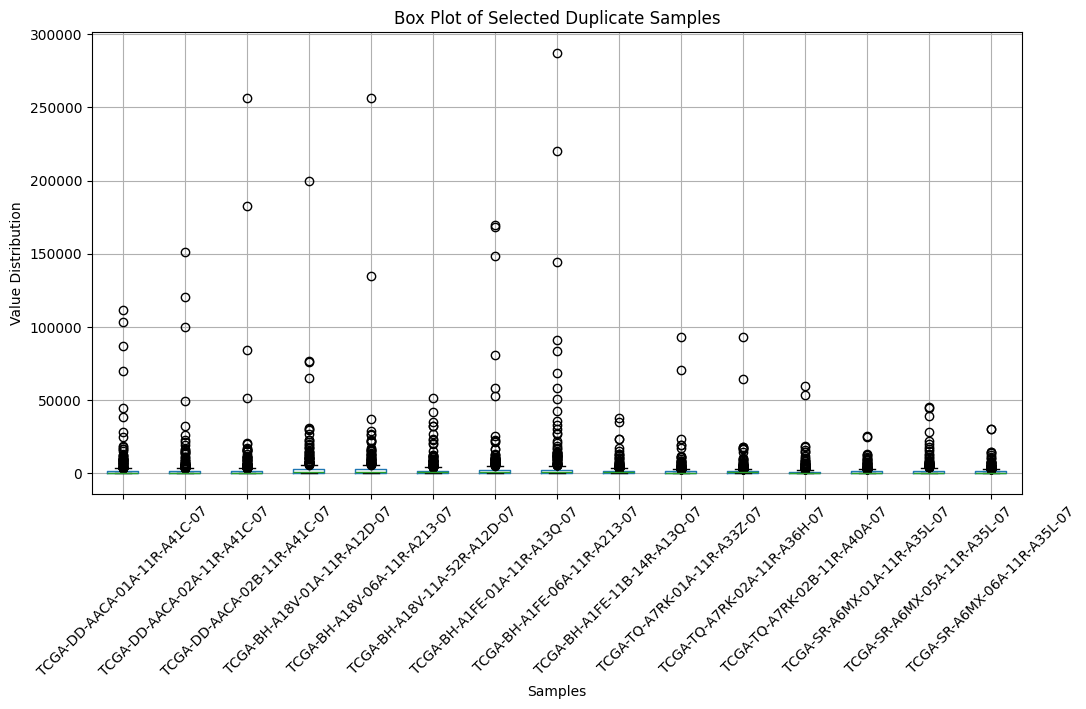

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract first three parts of sample name
df_440_Genes_Matched["Sample_Base"] = df_440_Genes_Matched.index.str.split("-").str[:3].str.join("-")

# Find duplicates
duplicate_counts = df_440_Genes_Matched["Sample_Base"].value_counts()
duplicate_samples = duplicate_counts[duplicate_counts > 1].index.tolist()

# Select a few duplicate samples to plot
selected_samples = duplicate_samples[:5]  # Change number as needed

# Filter the dataset for only selected duplicate samples
df_selected = df_440_Genes_Matched[df_440_Genes_Matched["Sample_Base"].isin(selected_samples)]

# Drop non-numeric columns for boxplot
df_selected_numeric = df_selected.drop(columns=["Sample_Base", "TCGA Study", "Immune Subtype"], errors='ignore')

# Transpose for better visualization (samples on x-axis)
df_selected_numeric.T.boxplot(figsize=(12,6))

# Customize plot
plt.xticks(rotation=45)
plt.title("Box Plot of Selected Duplicate Samples")
plt.ylabel("Value Distribution")
plt.xlabel("Samples")
plt.show()


**Interpretation: Above plot shows that almost three duplicates of same sample are present in dataset like reccurrent. We will keep only one sample**

![alt text](barcode.png "Title")

**Keeping only Primary Solid Tumour Samples - Barcode-01(4th part of sample is for only Sample Tumours)**

**Removing Duplicate Samples**

In [178]:
# Extract the 4th part of the sample ID and filter rows
df_440_Genes_9130_Samples_no_duplicates = df_440_Genes_Matched[df_440_Genes_Matched.index.str.split("-").str[3].str.startswith("01")]

df_440_Genes_9130_Samples_no_duplicates.to_csv("df_440_Genes_9130_Samples_no_duplicates.csv")
df_440_Genes_9130_Samples_no_duplicates.head()


ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  \
TCGA-OR-A5J1-01A-11R-A29S-07    829.011   542.267    377.0410   183.477   
TCGA-OR-A5J2-01A-11R-A29S-07    935.310  1612.130   1453.5000   281.036   
TCGA-OR-A5J3-01A-11R-A29S-07    756.036  1101.470    777.9590   117.316   
TCGA-OR-A5J5-01A-11R-A29S-07    512.006   431.449     48.7994   333.075   
TCGA-OR-A5J6-01A-31R-A29S-07    410.760  2296.900    310.7240   250.368   

                              AIMP2_S5  ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  \
TCGA-OR-A5J1-01A-11R-A29S-07   338.823    974.544     83.5735   163.785   
TCGA-OR-A5J2-01A-11R-A29S-07  1001.020    812.508      9.2605   332.975   
TCGA-OR-A5J3-01A-11R-A29S-07  1081.980   1422.010     53.3254   347.208   
TCGA-OR-A5J5-01A-11R-A29S-07   198.474   1307.510     10.0697   115.414   
TCGA-OR-A5J6-01A-31R-A29S-07   477.403   1442.970    326.3720   939.997   

                              APITD1_S5   APOC1_S3  ...  WDR77_S5  WIPF1_S3  \
TCGA-OR-A5J1-01A-11R-A29S-07   321.7190   1875.120  ...   951.489   571.086   
TCGA-OR-A5J2-01A-11R-A29S-07    61.1998    237.552  ...   805.663   584.217   
TCGA-OR-A5J3-01A-11R-A29S-07   210.2740   4049.180  ...   865.649   158.791   
TCGA-OR-A5J5-01A-11R-A29S-07   208.9080    646.785  ...   574.748   343.919   
TCGA-OR-A5J6-01A-31R-A29S-07   225.7780  79054.200  ...   582.888   393.435   

                              WNT2B_S2  WNT8B_S2  WSB2_S5  ZWILCH_S5  \
TCGA-OR-A5J1-01A-11R-A29S-07   11.5274    0.0000  1731.51   183.9580   
TCGA-OR-A5J2-01A-11R-A29S-07   10.8710    0.4026  5007.11   264.1250   
TCGA-OR-A5J3-01A-11R-A29S-07    0.5925    3.5550  2508.67    90.6532   
TCGA-OR-A5J5-01A-11R-A29S-07   17.0411    0.7746  1889.23   260.2630   
TCGA-OR-A5J6-01A-31R-A29S-07   11.1771    0.0000  3739.87    64.2685   

                                ZYX_S2  TCGA Study  Immune Subtype  \
TCGA-OR-A5J1-01A-11R-A29S-07  1841.020         ACC              C4   
TCGA-OR-A5J2-01A-11R-A29S-07  3059.990         ACC              C3   
TCGA-OR-A5J3-01A-11R-A29S-07  2655.610         ACC              C4   
TCGA-OR-A5J5-01A-11R-A29S-07  2367.930         ACC              C4   
TCGA-OR-A5J6-01A-31R-A29S-07   708.071         ACC              C4   

                               Sample_Base  
TCGA-OR-A5J1-01A-11R-A29S-07  TCGA-OR-A5J1  
TCGA-OR-A5J2-01A-11R-A29S-07  TCGA-OR-A5J2  
TCGA-OR-A5J3-01A-11R-A29S-07  TCGA-OR-A5J3  
TCGA-OR-A5J5-01A-11R-A29S-07  TCGA-OR-A5J5  
TCGA-OR-A5J6-01A-31R-A29S-07  TCGA-OR-A5J6  

[5 rows x 443 columns]

In [179]:
# Safely remove the 'Sample_Base' column if it exists
df_440_Genes_9130_Samples_no_duplicates = df_440_Genes_9130_Samples_no_duplicates.drop(
    columns=["Sample_Base"], errors='ignore'
)

# Check shape to confirm it's back to 442 columns (if that was your original count)
print("Shape after removing 'Sample_Base':", df_440_Genes_9130_Samples_no_duplicates.shape)


df_440_Genes_9130_Samples_no_duplicates.to_csv("df_440_Genes_9130_Samples_no_duplicates.csv")


Shape after removing 'Sample_Base': (9130, 442)


# Harmonising the Immune Subtype - sample Count with reearch paper of "The Immune Landscape of Cancer"

In [181]:
# Count the number of samples for each TCGA Study
tcga_immune_subtype_counts = df_440_Genes_9130_Samples_no_duplicates["TCGA Study"].value_counts()

# Convert to DataFrame for better display
tcga_immune_subtype_counts = tcga_immune_subtype_counts.reset_index()
tcga_immune_subtype_counts.columns = ["TCGA Study", "Sample Count"]

# Reset index to 0,1,2...
tcga_immune_subtype_counts.index = range(len(tcga_immune_subtype_counts))

# Display the counts
print(tcga_immune_subtype_counts)

   TCGA Study  Sample Count
0        BRCA          1083
1        UCEC           528
2        KIRC           515
3        HNSC           514
4         LGG           514
5        THCA           500
6        LUSC           487
7        LUAD           457
8        COAD           441
9        PRAD           405
10       BLCA           397
11       STAD           391
12       LIHC           362
13       CESC           300
14       KIRP           279
15         OV           270
16       SARC           223
17       PCPG           178
18       ESCA           173
19       READ           156
20        GBM           156
21       PAAD           151
22       TGCT           149
23       SKCM           103
24       MESO            83
25        UVM            80
26        ACC            78
27       KICH            65
28        UCS            57
29       CHOL            35


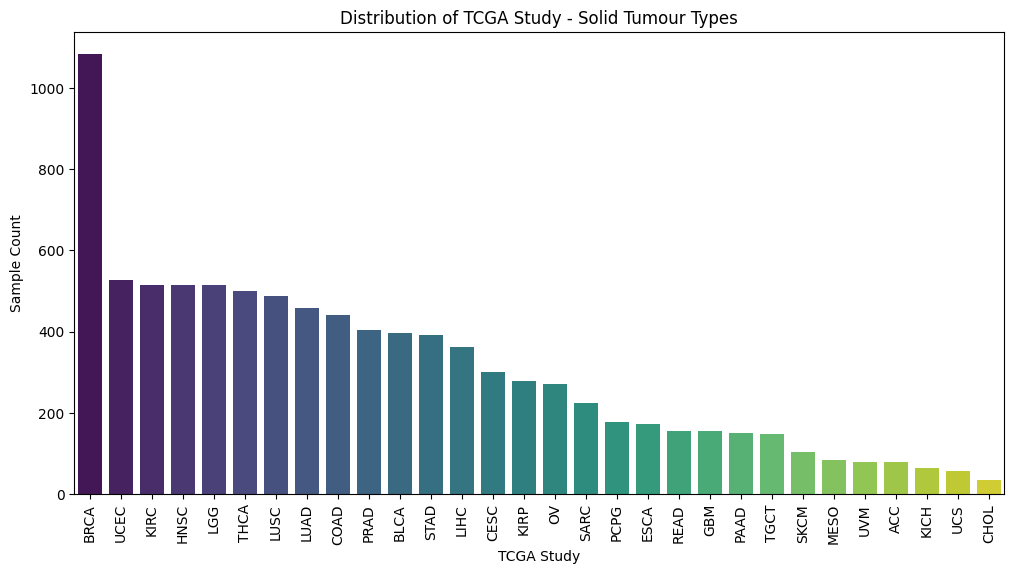

In [182]:
import seaborn as sns 
# Count the number of samples for each TCGA Study (Cancer Type)
tcga_immune_subtype_counts = df_440_Genes_9130_Samples_no_duplicates["TCGA Study"].value_counts().reset_index()
tcga_immune_subtype_counts.columns = ["TCGA Study", "Sample Count"]

# Plot bar chart with proper palette usage
plt.figure(figsize=(12, 6))
sns.barplot(
    data=tcga_immune_subtype_counts, 
    x="TCGA Study", 
    y="Sample Count", 
    hue="TCGA Study",  # Assign hue to avoid warning
    palette="viridis", 
    legend=False  # Disable legend as hue is just for colors
)

# Customize plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Distribution of TCGA Study - Solid Tumour Types")
plt.xlabel("TCGA Study")
plt.ylabel("Sample Count")

# Show plot
plt.show()


**Interpretation: Abve distribution shows that BRCA tumour type has highest number of samples(1083) and CHOL has lowest(35).**

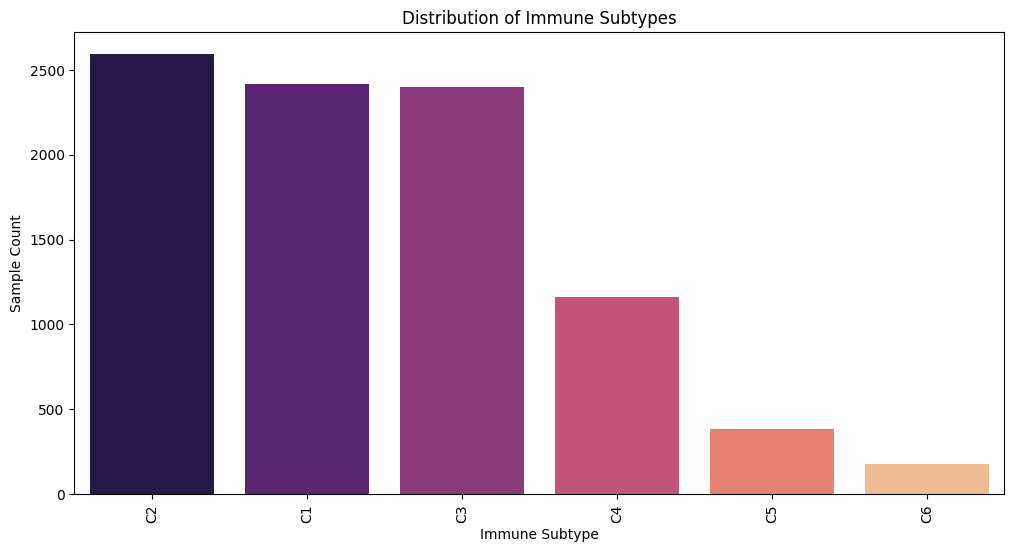

In [183]:
# Count the number of samples for each Immune Subtype
immune_subtype_counts = df_440_Genes_9130_Samples_no_duplicates["Immune Subtype"].value_counts().reset_index()
immune_subtype_counts.columns = ["Immune Subtype", "Sample Count"]

# Plot bar chart with proper palette usage
plt.figure(figsize=(12, 6))
sns.barplot(
    data=immune_subtype_counts, 
    x="Immune Subtype", 
    y="Sample Count", 
    hue="Immune Subtype", 
    palette="magma", 
    legend=False  
)

# Customize plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Distribution of Immune Subtypes")
plt.xlabel("Immune Subtype")
plt.ylabel("Sample Count")

# Show plot
plt.show()


**Interpretation: Above distrivution plot shows that C2 immune subtype has hoghest number of samples and C6 has lowest number of samples in dataset**

In [184]:
#!pip install missingno
import missingno as msno
# Visualize the number of missing
# values as a bar chart
msno.bar(df_440_Genes_9130_Samples_no_duplicates.T)

<Axes: >

# Checking missing values in reduced datset

In [187]:
print(f"Total Missing Values in Dataset:{df_440_Genes_9130_Samples_no_duplicates.isnull().sum().sum()}")

total_missing = df_440_Genes_9130_Samples_no_duplicates.isnull().sum().sum()
total_cells = df_440_Genes_9130_Samples_no_duplicates.shape[0] * df_440_Genes_9130_Samples_no_duplicates.shape[1]
missing_percentage_total = (total_missing / total_cells) * 100

print(f"Total percentage of missing values in dataset: {missing_percentage_total:.2f}%")

Total Missing Values in Dataset:2368
Total percentage of missing values in dataset: 0.06%


In [188]:
missing_values_per_col = df_440_Genes_9130_Samples_no_duplicates.isnull().sum()
missing_values_per_col = missing_values_per_col[missing_values_per_col > 0]  # Filter out columns with no missing values
print(missing_values_per_col)

MMP1_S2      38
MMP3_S2      38
MT3_S5       38
PLG_S5      834
RGS8_S5    1420
dtype: int64


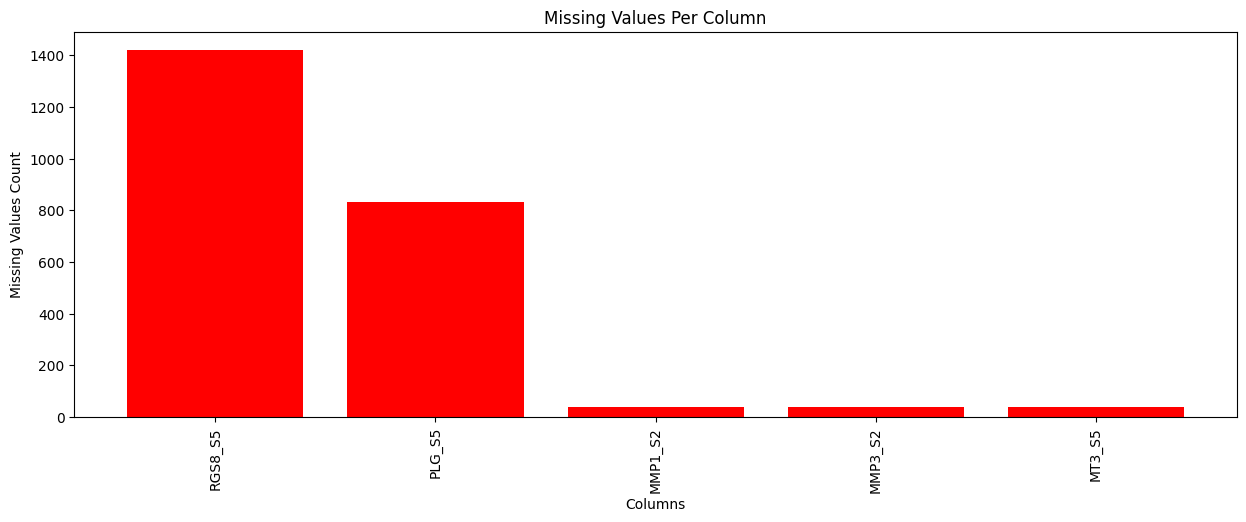

In [189]:
# Count missing values per column
missing_counts = df_440_Genes_9130_Samples_no_duplicates.isnull().sum()

# Filter only columns with missing values
missing_counts = missing_counts[missing_counts > 0]

# Sort by missing values count (descending order)
missing_counts = missing_counts.sort_values(ascending=False)

# Plot
plt.figure(figsize=(15, 5))
plt.bar(missing_counts.index, missing_counts.values, color='red')
plt.xticks(rotation=90)  # Rotate column names for better visibility
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.title("Missing Values Per Column")
plt.show()

# Seperating the numerical and catagorical cols of dataset for imputation of missing values.

In [190]:
# Store the two categorical columns in a separate DataFrame
df_categorical = df_440_Genes_9130_Samples_no_duplicates[['TCGA Study', 'Immune Subtype']]

# Remove these columns from the main dataset
df_numeric = df_440_Genes_9130_Samples_no_duplicates.drop(columns=['TCGA Study', 'Immune Subtype'])

In [191]:
# Check the shape of the original and modified DataFrames
print("Original dataset shape:", df_440_Genes_9130_Samples_no_duplicates.shape)
print("New dataset shape (numeric only):", df_numeric.shape)
print("Categorical dataset shape:", df_categorical.shape)

# Display first few rows of both datasets
print(df_numeric.head())   # Numerical dataset without categorical columns
print(df_categorical.head())  # The extracted categorical columns


Original dataset shape: (9130, 442)
New dataset shape (numeric only): (9130, 440)
Categorical dataset shape: (9130, 2)
                              ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  \
TCGA-OR-A5J1-01A-11R-A29S-07    829.011   542.267    377.0410   183.477   
TCGA-OR-A5J2-01A-11R-A29S-07    935.310  1612.130   1453.5000   281.036   
TCGA-OR-A5J3-01A-11R-A29S-07    756.036  1101.470    777.9590   117.316   
TCGA-OR-A5J5-01A-11R-A29S-07    512.006   431.449     48.7994   333.075   
TCGA-OR-A5J6-01A-31R-A29S-07    410.760  2296.900    310.7240   250.368   

                              AIMP2_S5  ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  \
TCGA-OR-A5J1-01A-11R-A29S-07   338.823    974.544     83.5735   163.785   
TCGA-OR-A5J2-01A-11R-A29S-07  1001.020    812.508      9.2605   332.975   
TCGA-OR-A5J3-01A-11R-A29S-07  1081.980   1422.010     53.3254   347.208   
TCGA-OR-A5J5-01A-11R-A29S-07   198.474   1307.510     10.0697   115.414   
TCGA-OR-A5J6-01A-31R-A29S-07   477.403   1442.970    32

# MICE Imputar is being used to impute the missing values on datset 9130 samples and 440 gene Ids.
**MICE Imputer is good for addressing missing values because it models each feature with missing data as a function of other features, capturing complex interdependencies for more accurate imputations.**

In [192]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# List of columns that need imputation
columns_to_impute = ["MMP1_S2", "MMP3_S2", "MT3_S5", "PLG_S5", "RGS8_S5"]

# Initialize MICE Imputer
mice_imputer = IterativeImputer(max_iter=10, random_state=42)

# Extract only the missing values for imputation
df_to_impute = df_numeric[columns_to_impute]

# Fit and transform only on the missing values
df_imputed_cols = pd.DataFrame(mice_imputer.fit_transform(df_to_impute), 
                               columns=columns_to_impute, index=df_numeric.index)

# Replace missing values in original dataset without changing existing values
df_440_Genes_9130_Samples_imputed = df_numeric.copy()  # Keep a copy of the original
df_440_Genes_9130_Samples_imputed[columns_to_impute] = df_numeric[columns_to_impute].combine_first(df_imputed_cols)

# Check if missing values in selected columns are filled
print(df_440_Genes_9130_Samples_imputed[columns_to_impute].isnull().sum())  # Should print 0 only for these columns

MMP1_S2    0
MMP3_S2    0
MT3_S5     0
PLG_S5     0
RGS8_S5    0
dtype: int64


In [193]:
df_440_Genes_9130_Samples_imputed.head()

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  \
TCGA-OR-A5J1-01A-11R-A29S-07    829.011   542.267    377.0410   183.477   
TCGA-OR-A5J2-01A-11R-A29S-07    935.310  1612.130   1453.5000   281.036   
TCGA-OR-A5J3-01A-11R-A29S-07    756.036  1101.470    777.9590   117.316   
TCGA-OR-A5J5-01A-11R-A29S-07    512.006   431.449     48.7994   333.075   
TCGA-OR-A5J6-01A-31R-A29S-07    410.760  2296.900    310.7240   250.368   

                              AIMP2_S5  ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  \
TCGA-OR-A5J1-01A-11R-A29S-07   338.823    974.544     83.5735   163.785   
TCGA-OR-A5J2-01A-11R-A29S-07  1001.020    812.508      9.2605   332.975   
TCGA-OR-A5J3-01A-11R-A29S-07  1081.980   1422.010     53.3254   347.208   
TCGA-OR-A5J5-01A-11R-A29S-07   198.474   1307.510     10.0697   115.414   
TCGA-OR-A5J6-01A-31R-A29S-07   477.403   1442.970    326.3720   939.997   

                              APITD1_S5   APOC1_S3  ...   VTA1_S5  WDHD1_S5  \
TCGA-OR-A5J1-01A-11R-A29S-07   321.7190   1875.120  ...  1124.880   64.3612   
TCGA-OR-A5J2-01A-11R-A29S-07    61.1998    237.552  ...  1008.190  162.6630   
TCGA-OR-A5J3-01A-11R-A29S-07   210.2740   4049.180  ...   537.994  183.6770   
TCGA-OR-A5J5-01A-11R-A29S-07   208.9080    646.785  ...   455.461  192.8740   
TCGA-OR-A5J6-01A-31R-A29S-07   225.7780  79054.200  ...   989.176   21.2366   

                               WDR54_S5  WDR77_S5  WIPF1_S3  WNT2B_S2  \
TCGA-OR-A5J1-01A-11R-A29S-07   411.6230   951.489   571.086   11.5274   
TCGA-OR-A5J2-01A-11R-A29S-07    64.0182   805.663   584.217   10.8710   
TCGA-OR-A5J3-01A-11R-A29S-07  1183.8200   865.649   158.791    0.5925   
TCGA-OR-A5J5-01A-11R-A29S-07   509.6820   574.748   343.919   17.0411   
TCGA-OR-A5J6-01A-31R-A29S-07   483.9700   582.888   393.435   11.1771   

                              WNT8B_S2  WSB2_S5  ZWILCH_S5    ZYX_S2  
TCGA-OR-A5J1-01A-11R-A29S-07    0.0000  1731.51   183.9580  1841.020  
TCGA-OR-A5J2-01A-11R-A29S-07    0.4026  5007.11   264.1250  3059.990  
TCGA-OR-A5J3-01A-11R-A29S-07    3.5550  2508.67    90.6532  2655.610  
TCGA-OR-A5J5-01A-11R-A29S-07    0.7746  1889.23   260.2630  2367.930  
TCGA-OR-A5J6-01A-31R-A29S-07    0.0000  3739.87    64.2685   708.071  

[5 rows x 440 columns]

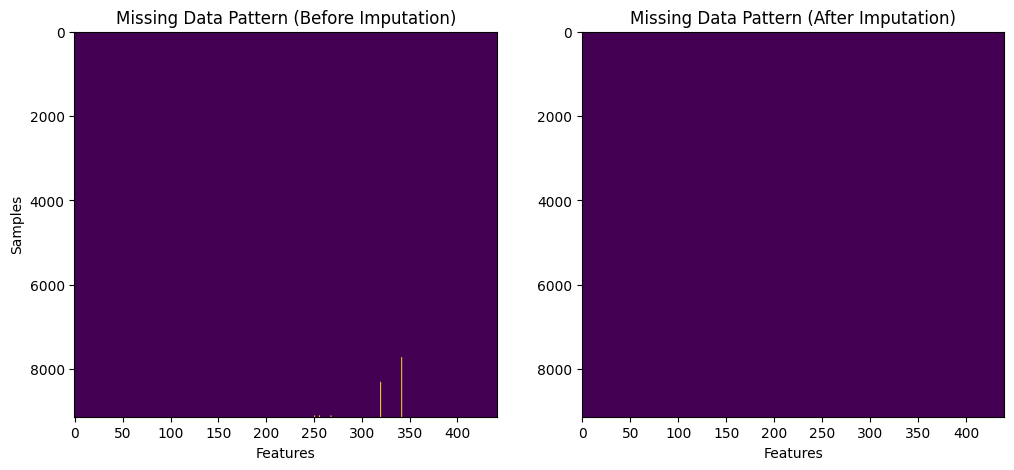

In [194]:

# Plot before and after imputation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot original data with missing values
axes[0].imshow(df_440_Genes_9130_Samples_no_duplicates.isnull(), cmap="viridis", aspect="auto")
axes[0].set_title("Missing Data Pattern (Before Imputation)")
axes[0].set_xlabel("Features")
axes[0].set_ylabel("Samples")

# Plot imputed data (check if any NaN remains)
axes[1].imshow(pd.DataFrame(df_440_Genes_9130_Samples_imputed).isnull(), cmap="viridis", aspect="auto")
axes[1].set_title("Missing Data Pattern (After Imputation)")
axes[1].set_xlabel("Features")

plt.show()

In [195]:
df_440_Genes_9130_Samples_imputed.describe()

ACTL6A_S5      ADAM9_S2    ADAMTS1_S5      ADCY7_S3     AIMP2_S5  \
count   9130.000000   9130.000000   9130.000000   9130.000000  9130.000000   
mean    1336.521673   3111.563633   1483.856513    683.354907   626.004674   
std     1051.449244   2807.493025   2033.957346    544.776912   318.975388   
min       22.955500     34.018900     13.850400     15.847900     9.289700   
25%      697.918291   1423.377500    386.138640    304.247000   401.508250   
50%     1052.305000   2401.346169    802.224500    553.781411   554.286000   
75%     1625.572500   3898.430000   1759.787500    911.509000   766.591905   
max    15105.600000  47456.800000  41386.400000  12887.800000  3237.281867   

         ALKBH7_S5   ALOX5AP_S3     AMPD3_S3    APITD1_S5      APOC1_S3  ...  \
count   9130.00000  9130.000000  9130.000000  9130.000000  9.130000e+03  ...   
mean     918.47674   372.083392   390.614310   284.545412  7.242847e+03  ...   
std      782.60956   493.388526   404.448909   143.045333  4.027721e+04  ...   
min        4.29650     0.595000     4.681600    17.565900  2.118600e+00  ...   
25%      476.81950    99.978006   186.404500   184.683777  3.150743e+02  ...   
50%      720.55950   221.400000   300.143000   258.170000  8.539330e+02  ...   
75%     1097.33250   449.775000   466.201520   351.578500  2.074110e+03  ...   
max    16942.70000  9413.960000  6969.460000  1950.920000  1.345140e+06  ...   

           VTA1_S5     WDHD1_S5     WDR54_S5     WDR77_S5      WIPF1_S3  \
count  9130.000000  9130.000000  9130.000000  9130.000000   9130.000000   
mean   1052.412180   317.090796   366.316427   962.462946   1186.699386   
std     451.082738   428.186894   332.186467   595.577731    937.383255   
min       0.000000     4.373200     0.609800   156.377000     27.962100   
25%     750.704250    98.075375   164.145250   575.278750    550.202000   
50%     982.028865   208.362190   276.360500   804.555990    946.485000   
75%    1276.191025   396.003856   471.400937  1165.965000   1552.210000   
max    7844.462187  7308.920000  8066.000000  8999.414178  11073.783745   

          WNT2B_S2     WNT8B_S2       WSB2_S5    ZWILCH_S5        ZYX_S2  
count  9130.000000  9130.000000   9130.000000  9130.000000   9130.000000  
mean     76.743536     3.047032   2017.376697   443.842154   4549.186677  
std     212.320086    16.515641    836.378017   306.277825   2936.600051  
min       0.000000    -0.370082    243.797000    19.869800    139.635000  
25%       8.919700     0.000000   1439.695000   206.224250   2679.235000  
50%      20.389333     0.920750   1848.785000   373.913318   3924.035550  
75%      52.971586     2.499825   2406.867500   607.243263   5581.586162  
max    6467.740000  1026.420000  14261.100000  5504.480000  44290.200000  

[8 rows x 440 columns]

 # Checking skewness for each column

In [196]:
print(df_440_Genes_9130_Samples_imputed.skew()) 

ACTL6A_S5      3.595877
ADAM9_S2       3.814720
ADAMTS1_S5     4.475596
ADCY7_S3       2.927250
AIMP2_S5       1.756472
                ...    
WNT2B_S2      10.013071
WNT8B_S2      39.373459
WSB2_S5        1.873402
ZWILCH_S5      1.903128
ZYX_S2         2.614742
Length: 440, dtype: float64


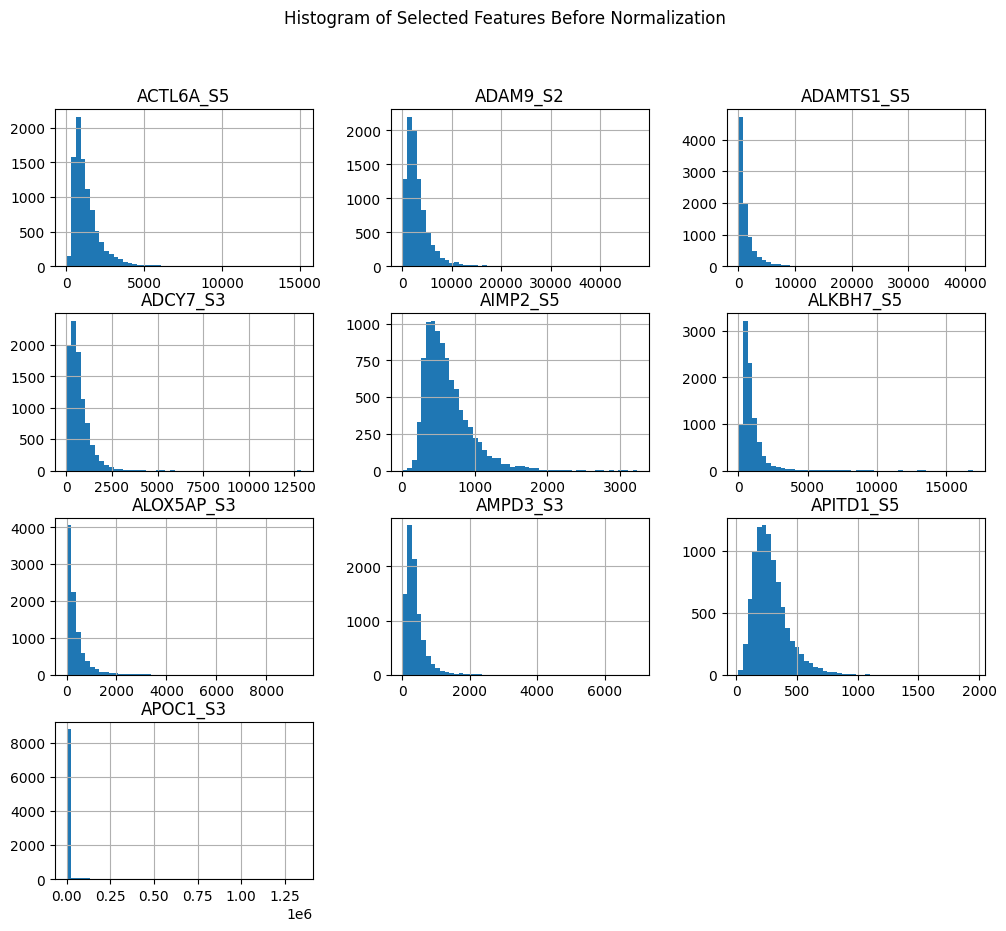

In [197]:
import matplotlib.pyplot as plt

# Select a subset of features (you can change them)
sample_features = df_440_Genes_9130_Samples_imputed.columns[:10]  # First 10 features

# Plot histograms for selected features
df_440_Genes_9130_Samples_imputed[sample_features].hist(figsize=(12, 10), bins=50)
plt.suptitle("Histogram of Selected Features Before Normalization")
plt.show()

**To examine the distribution of gene expression values, histograms were plotted for a subset of features. As shown in the figure, most features exhibit strong right skewness (long tails toward higher values), indicating non-normal distribution. This pattern is common in RNA-seq data due to the presence of a few highly expressed genes. Such skewed distributions support the need for log transformation and scaling prior to applying dimensionality reduction techniques like NMF, ensuring more stable and meaningful component extraction.**

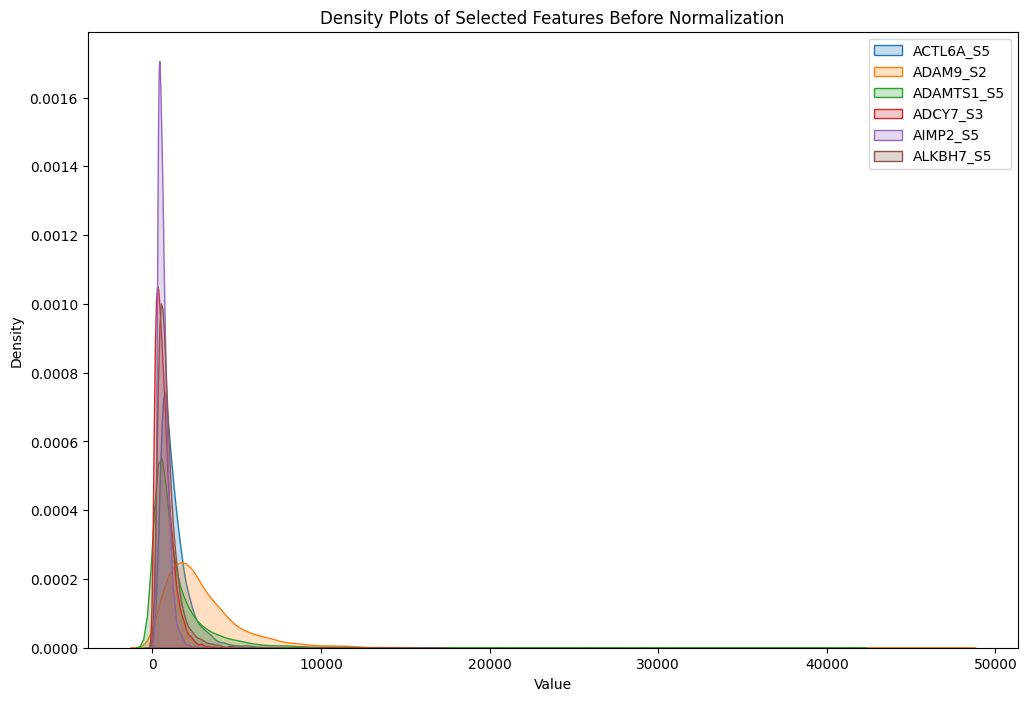

In [250]:

# Select a subset of features
sample_features = df_440_Genes_9130_Samples_imputed.columns[:6]

# Plot KDE for selected features
plt.figure(figsize=(12, 8))
for feature in sample_features:
    sns.kdeplot(df_440_Genes_9130_Samples_imputed[feature], label=feature, fill=True)

plt.title("Density Plots of Selected Features Before Normalization")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

**Interpretation: Data is skewed towards right side.**

In [252]:
df_440_Genes_9130_Samples_imputed = df_440_Genes_9130_Samples_imputed.select_dtypes(include='number')

print("Min value:", df_440_Genes_9130_Samples_imputed.min().min())
print("Max value:", df_440_Genes_9130_Samples_imputed.max().max())

Min value: -3600.323037478524
Max value: 3180922.96943738


# Trying to check the spread of values in dataset

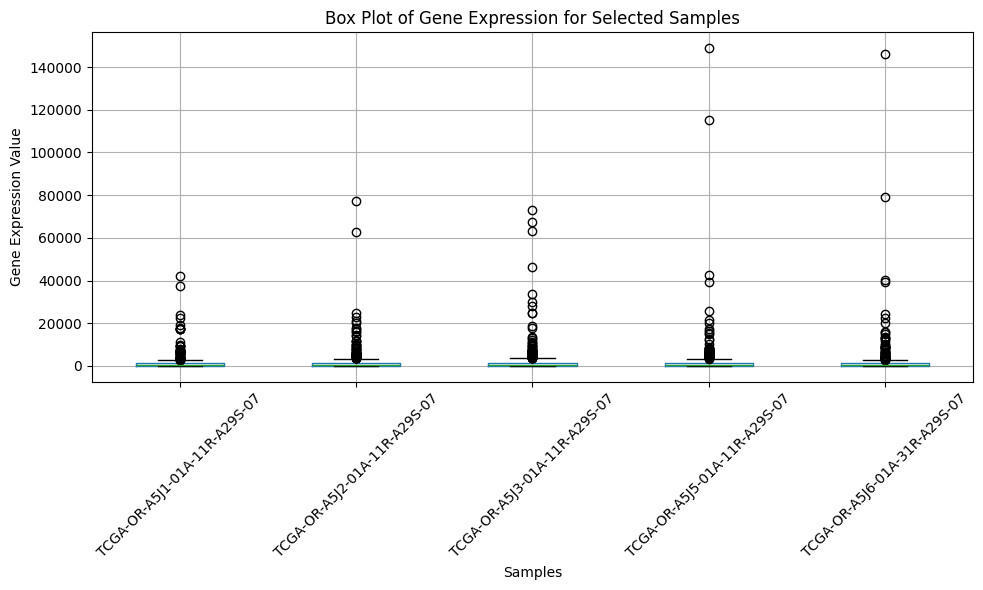

In [254]:
import matplotlib.pyplot as plt

# Select a few samples (rows) to visualize
selected_samples = df_440_Genes_9130_Samples_imputed.index[:5]  # First 5 samples

# Filter and transpose for plotting (genes as x-axis)
df_selected = df_440_Genes_9130_Samples_imputed.loc[selected_samples]
df_selected_numeric = df_selected.select_dtypes(include='number')  # Just numeric data

# Transpose so each box represents a sample's distribution across genes
df_selected_numeric.T.boxplot(figsize=(10, 6))

plt.title("Box Plot of Gene Expression for Selected Samples")
plt.xlabel("Samples")
plt.ylabel("Gene Expression Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# above box plot is showing that there is a spread of values in dataset

# Checking for any negative value

In [259]:
print((df_440_Genes_9130_Samples_imputed < 0).any().any())

True


# Shifting the dataset by abs(min) + 1 → Ensures all values are positive before applying np.log1p().

In [261]:
# Find the minimum value in the dataset
min_value = df_440_Genes_9130_Samples_imputed.min().min()

# Shift the data if there are negative values
if min_value < 0:
   df_440_Genes_9130_Samples_imputed_Shifted = df_440_Genes_9130_Samples_imputed + abs(min_value) + 1  # Shift to make all values positive
else:
    df_440_Genes_9130_Samples_imputed_Shifted = df_440_Genes_9130_Samples_imputed  # No need to shift if all values are positive

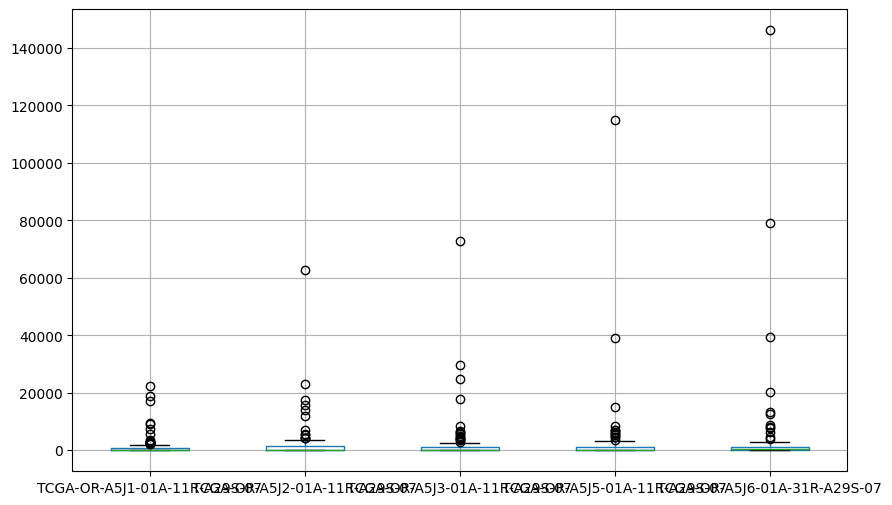

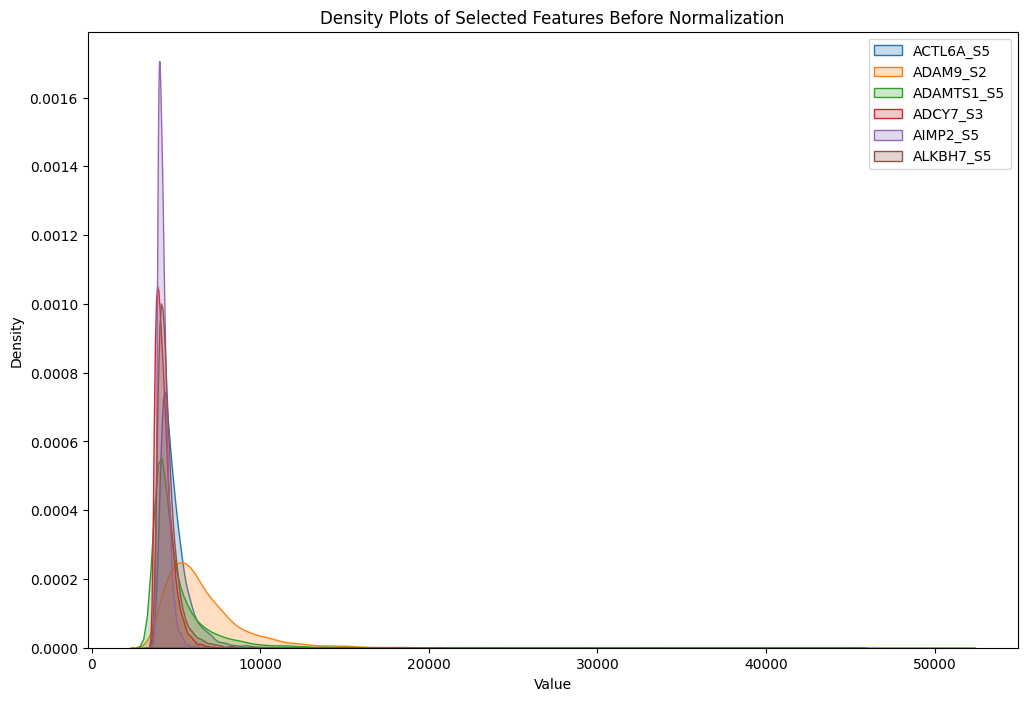

In [263]:
# Select a subset of features
sample_features = df_440_Genes_9130_Samples_imputed_Shifted.columns[:6]

# Plot KDE for selected features
plt.figure(figsize=(12, 8))
for feature in sample_features:
    sns.kdeplot(df_440_Genes_9130_Samples_imputed_Shifted[feature], label=feature, fill=True)

plt.title("Density Plots of Selected Features Before Normalization")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

In [265]:
print((df_440_Genes_9130_Samples_imputed_Shifted < 0).any().any())

False


# As we are dealing with skewed distributions or features with large ranges. So we will apply log1p as this will give strictly non negative values and It compresses large values while maintaining relative relationships and avoids the undefined log(0) issue by computing log(1 + X).

In [267]:
df_440_Genes_9130_Samples_imputed_Shifted = df_440_Genes_9130_Samples_imputed_Shifted.select_dtypes(include='number')

print("Min value:", df_440_Genes_9130_Samples_imputed_Shifted.min().min())
print("Max value:", df_440_Genes_9130_Samples_imputed_Shifted.max().max())


Min value: 1.0
Max value: 3184524.2924748585


# Why? np.log1p(x) applies log transformation to (x + 1), so even if x = 0, it computes log(1) = 0 (avoiding negative values).It ensures all outputs remain non-negative.

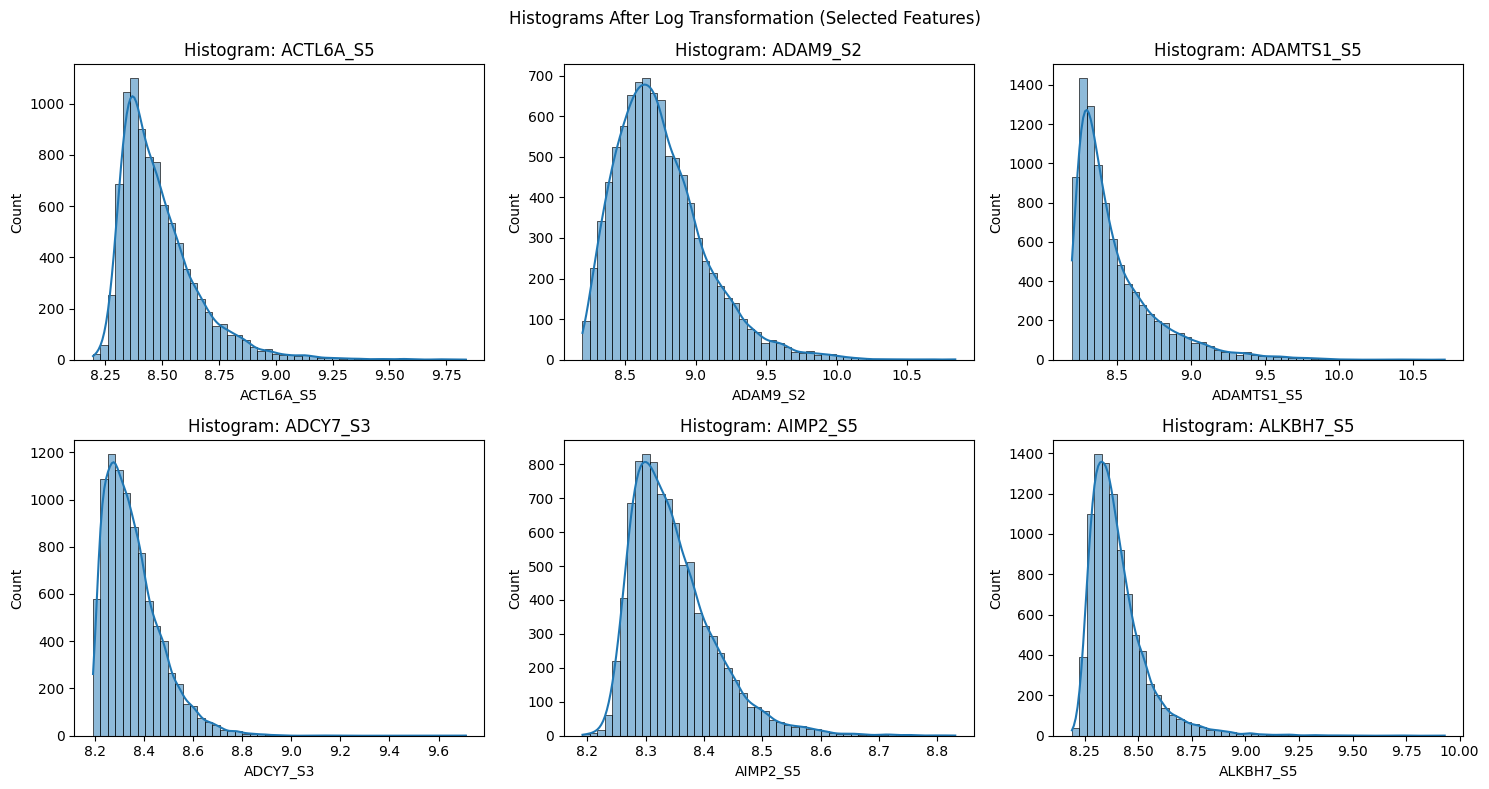

In [272]:
import numpy as np
# Apply log transformation
df_440_Genes_9130_Samples_imputed_Shifted_log_transformed = np.log1p(df_440_Genes_9130_Samples_imputed_Shifted)

# Check new skewness after transformation
#print(df_440_Genes_9130_Samples_imputed_Shifted_log_transformed.skew())


# Select a subset of features to plot
sample_features = df_440_Genes_9130_Samples_imputed_Shifted_log_transformed.columns[:6]  # Select first 6 features (Change as needed)

# Create subplots for better visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns

# Plot each feature separately
for i, feature in enumerate(sample_features):
    row, col = divmod(i, 3)  # Determine subplot position
    sns.histplot(df_440_Genes_9130_Samples_imputed_Shifted_log_transformed[feature], bins=50, ax=axes[row, col], kde=True)
    axes[row, col].set_title(f"Histogram: {feature}")

plt.suptitle("Histograms After Log Transformation (Selected Features)")
plt.tight_layout()
plt.show()

In [274]:
df_440_Genes_9130_Samples_imputed_Shifted_log_transformed.describe()

ACTL6A_S5     ADAM9_S2   ADAMTS1_S5     ADCY7_S3     AIMP2_S5  \
count  9130.000000  9130.000000  9130.000000  9130.000000  9130.000000   
mean      8.487866     8.752587     8.485561     8.356036     8.346914   
std       0.173975     0.322381     0.282625     0.114894     0.071574   
min       8.195686     8.198733     8.193172     8.193724     8.191910   
25%       8.366426     8.522320     8.291161     8.270415     8.295007   
50%       8.445617     8.700126     8.390393     8.332333     8.332455   
75%       8.561764     8.922759     8.587113     8.414902     8.382270   
max       9.836702    10.840740    10.714167     9.710517     8.830485   

         ALKBH7_S5   ALOX5AP_S3     AMPD3_S3    APITD1_S5     APOC1_S3  ...  \
count  9130.000000  9130.000000  9130.000000  9130.000000  9130.000000  ...   
mean      8.405461     8.281622     8.288354     8.264705     8.617316  ...   
std       0.139232     0.103792     0.083690     0.035888     0.699153  ...   
min       8.190526     8.189499     8.190633     8.194199     8.189922  ...   
25%       8.313642     8.216710     8.239785     8.239331     8.273183  ...   
50%       8.371678     8.248980     8.269364     8.258550     8.402064  ...   
75%       8.455244     8.306990     8.311036     8.282458     8.644078  ...   
max       9.930374     9.473956     9.265944     8.622137    14.114683  ...   

           VTA1_S5     WDHD1_S5     WDR54_S5     WDR77_S5     WIPF1_S3  \
count  9130.000000  9130.000000  9130.000000  9130.000000  9130.000000   
mean      8.441407     8.269294     8.283189     8.418982     8.458081   
std       0.090082     0.087736     0.074746     0.115126     0.172253   
min       8.189334     8.190547     8.189503     8.231828     8.197066   
25%       8.378627     8.216196     8.233893     8.337493     8.331472   
50%       8.430404     8.245564     8.263251     8.390922     8.422621   
75%       8.492596     8.293631     8.312313     8.469743     8.547632   
max       9.345464     9.297549     9.364633     9.441590     9.593976   

          WNT2B_S2     WNT8B_S2      WSB2_S5    ZWILCH_S5       ZYX_S2  
count  9130.000000  9130.000000  9130.000000  9130.000000  9130.000000  
mean      8.209134     8.190170     8.624165     8.302858     8.955776  
std       0.047733     0.004228     0.137194     0.071872     0.303393  
min       8.189334     8.189231     8.254820     8.194835     8.227364  
25%       8.191807     8.189334     8.525562     8.245003     8.745373  
50%       8.194978     8.189590     8.603574     8.288091     8.926167  
75%       8.203932     8.190028     8.701045     8.345115     9.125208  
max       9.217322     8.440041     9.790510     9.116777    10.776715  

[8 rows x 440 columns]

In [276]:
df_440_Genes_9130_Samples_imputed_Shifted_log_transformed = df_440_Genes_9130_Samples_imputed_Shifted_log_transformed.select_dtypes(include='number')

print("Min value:", df_440_Genes_9130_Samples_imputed_Shifted_log_transformed.min().min())
print("Max value:", df_440_Genes_9130_Samples_imputed_Shifted_log_transformed.max().max())

Min value: 0.6931471805599453
Max value: 14.973813791131262


# Interpretation: Now got more stable value's range

In [279]:

# Concatenate along columns (axis=1)
df_440_Genes_9130_Samples_imputed_Shifted_log_transformed_Final = pd.concat([df_440_Genes_9130_Samples_imputed_Shifted_log_transformed, df_categorical], axis=1)

# Confirm the result
print(df_440_Genes_9130_Samples_imputed_Shifted_log_transformed_Final.shape)
print(df_440_Genes_9130_Samples_imputed_Shifted_log_transformed_Final.dtypes.tail())  # Check if categorical columns are correctly added


(9130, 442)
WSB2_S5           float64
ZWILCH_S5         float64
ZYX_S2            float64
TCGA Study         object
Immune Subtype     object
dtype: object


In [281]:
df_440_Genes_9130_Samples_imputed_Shifted_log_transformed_Final.head()

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  \
TCGA-OR-A5J1-01A-11R-A29S-07   8.396456  8.329559    8.288877  8.239013   
TCGA-OR-A5J2-01A-11R-A29S-07   8.420161  8.559189    8.528296  8.264456   
TCGA-OR-A5J3-01A-11R-A29S-07   8.379851  8.456124    8.384868  8.221382   
TCGA-OR-A5J5-01A-11R-A29S-07   8.322231  8.302457    8.202790  8.277767   
TCGA-OR-A5J6-01A-31R-A29S-07   8.297315  8.682576    8.272072  8.256527   

                              AIMP2_S5  ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  \
TCGA-OR-A5J1-01A-11R-A29S-07  8.279227   8.428770    8.212269  8.233797   
TCGA-OR-A5J2-01A-11R-A29S-07  8.434538   8.392725    8.191902  8.277742   
TCGA-OR-A5J3-01A-11R-A29S-07  8.451972   8.522048    8.204029  8.281352   
TCGA-OR-A5J5-01A-11R-A29S-07  8.242966   8.498995    8.192126  8.220870   
TCGA-OR-A5J6-01A-31R-A29S-07  8.313785   8.526211    8.276063  8.421193   

                              APITD1_S5   APOC1_S3  ...  WDR54_S5  WDR77_S5  \
TCGA-OR-A5J1-01A-11R-A29S-07   8.274878   8.608394  ...  8.297530  8.423720   
TCGA-OR-A5J2-01A-11R-A29S-07   8.206180   8.253195  ...  8.206950  8.391173   
TCGA-OR-A5J3-01A-11R-A29S-07   8.246066   8.942657  ...  8.473480  8.404690   
TCGA-OR-A5J5-01A-11R-A29S-07   8.245708   8.354464  ...  8.321666  8.337366   
TCGA-OR-A5J6-01A-31R-A29S-07   8.250124  11.322449  ...  8.315393  8.339312   

                              WIPF1_S3  WNT2B_S2  WNT8B_S2   WSB2_S5  \
TCGA-OR-A5J1-01A-11R-A29S-07  8.336488  8.192529  8.189334  8.581825   
TCGA-OR-A5J2-01A-11R-A29S-07  8.339630  8.192347  8.189446  9.060614   
TCGA-OR-A5J3-01A-11R-A29S-07  8.232470  8.189499  8.190321  8.717845   
TCGA-OR-A5J5-01A-11R-A29S-07  8.280519  8.194054  8.189549  8.610966   
TCGA-OR-A5J6-01A-31R-A29S-07  8.292989  8.192432  8.189334  8.901393   

                              ZWILCH_S5    ZYX_S2  TCGA Study  Immune Subtype  
TCGA-OR-A5J1-01A-11R-A29S-07   8.239140  8.602149         ACC              C4  
TCGA-OR-A5J2-01A-11R-A29S-07   8.260092  8.804222         ACC              C3  
TCGA-OR-A5J3-01A-11R-A29S-07   8.214188  8.741605         ACC              C4  
TCGA-OR-A5J5-01A-11R-A29S-07   8.259092  8.694545         ACC              C4  
TCGA-OR-A5J6-01A-31R-A29S-07   8.207018  8.368785         ACC              C4  

[5 rows x 442 columns]

# Changing the names of samples for harmonising and better visualisation at later stages during Classification

In [284]:
# Make a copy to avoid modifying the original
df_440_Genes_9130_Samples_imputed_Shifted_log_transformed_Final_Name = df_440_Genes_9130_Samples_imputed_Shifted_log_transformed_Final.copy()

# Extract the first 4 parts from the existing index
base_parts_four = df_440_Genes_9130_Samples_imputed_Shifted_log_transformed_Final_Name.index.str.split("-").str[:4].str.join("-")

# Combine with TCGA Study and Immune Subtype from the DataFrame
new_index_sample = base_parts_four + "-" + df_440_Genes_9130_Samples_imputed_Shifted_log_transformed_Final_Name["TCGA Study"] + "-" + df_440_Genes_9130_Samples_imputed_Shifted_log_transformed_Final_Name["Immune Subtype"]

# Assign new sample names as the index
df_440_Genes_9130_Samples_imputed_Shifted_log_transformed_Final_Name.index = new_index_sample

# Optional: drop the original TCGA Study and Immune Subtype columns if you don't want duplicates
# df_final = df_final.drop(columns=["TCGA Study", "Immune Subtype"])

# Preview the new index
print(df_440_Genes_9130_Samples_imputed_Shifted_log_transformed_Final_Name.index[:5])


Index(['TCGA-OR-A5J1-01A-ACC-C4', 'TCGA-OR-A5J2-01A-ACC-C3',
       'TCGA-OR-A5J3-01A-ACC-C4', 'TCGA-OR-A5J5-01A-ACC-C4',
       'TCGA-OR-A5J6-01A-ACC-C4'],
      dtype='object')


# Samples taken from every Immune Subytpe - As per Coursework instructions.

![alt text](Picture1.png "Title")

In [288]:
import pandas as pd

# Define the target number of samples for each immune subtype
subtype_targets = {
    "C1": 385,
    "C2": 414,
    "C3": 383,
    "C4": 462,
    "C5": 231,
    "C6": 134
}

# Create an empty list to store the selected samples
selected_samples = []

# Loop through each subtype and randomly sample the required number
for subtype, count in subtype_targets.items():
    subtype_samples = df_440_Genes_9130_Samples_imputed_Shifted_log_transformed_Final_Name[df_440_Genes_9130_Samples_imputed_Shifted_log_transformed_Final_Name["Immune Subtype"] == subtype]
    sampled = subtype_samples.sample(n=count, random_state=404)  # For reproducibility
    selected_samples.append(sampled)

# Concatenate all the sampled subgroups
df_440_Genes_2009_TCGA_Samples = pd.concat(selected_samples)

# Confirm shape and subtype counts
print("Selected shape:", df_440_Genes_2009_TCGA_Samples.shape)
print("Distribution:\n", df_440_Genes_2009_TCGA_Samples["Immune Subtype"].value_counts())

Selected shape: (2009, 442)
Distribution:
 Immune Subtype
C4    462
C2    414
C1    385
C3    383
C5    231
C6    134
Name: count, dtype: int64


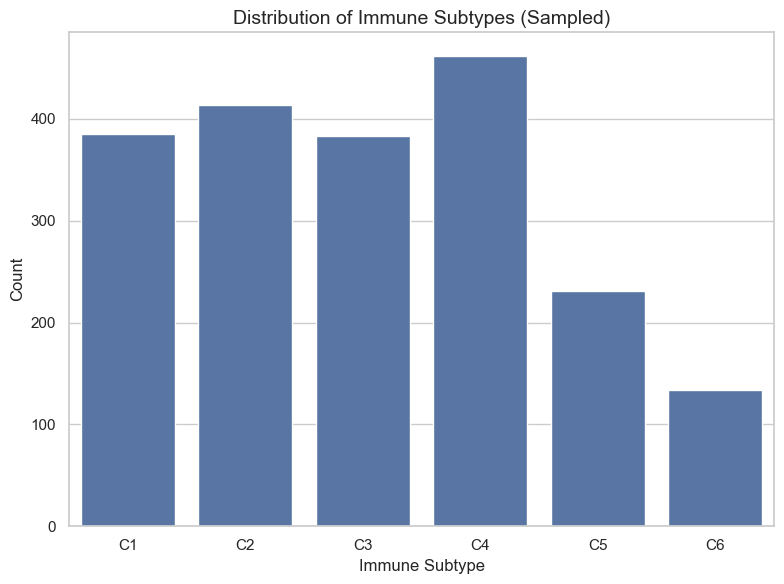

In [290]:
# Set a style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_440_Genes_2009_TCGA_Samples, x="Immune Subtype", order=subtype_targets.keys())

# Add labels and title
plt.title("Distribution of Immune Subtypes (Sampled)", fontsize=14)
plt.xlabel("Immune Subtype")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**The bar plot shows the distribution of immune subtypes after sampling. Classes C1 to C4 are relatively balanced, each with over 350 samples. However, C5 and especially C6 have significantly fewer samples, indicating class imbalance. This imbalance will be addressed during model training using techniques like class_weight='balanced' and careful validation strategies to ensure fair performance across all subtypes.**

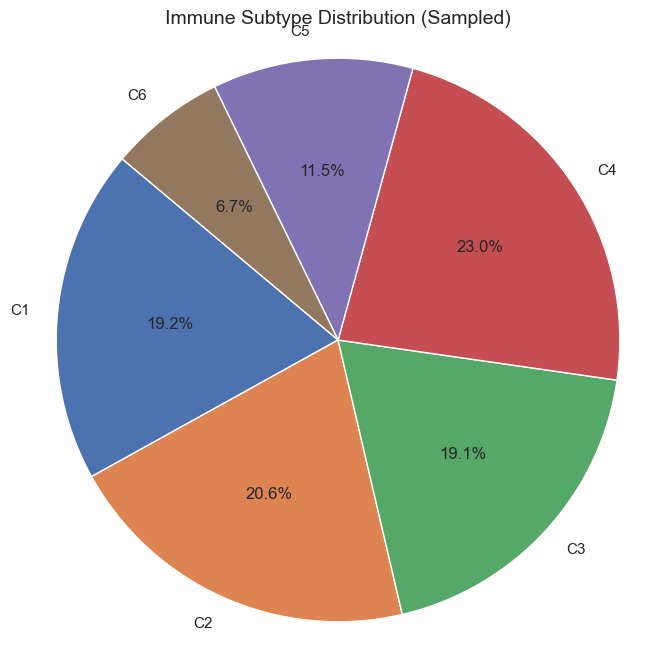

In [292]:
# Get the value counts
subtype_counts = df_440_Genes_2009_TCGA_Samples["Immune Subtype"].value_counts().sort_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(subtype_counts, labels=subtype_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Immune Subtype Distribution (Sampled)", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [ ]:
# 1. Extract metadata (TCGA Study and Immune Subtype)
df_440_Genes_2009_TCGA_Samples_Groups_Immune_Subtype = df_440_Genes_2009_TCGA_Samples[["TCGA Study", "Immune Subtype"]]

# 2. Extract the 440 gene expression columns (drop metadata)
df_440_Genes_2009_TCGA_Samples_Final_Dataset = df_440_Genes_2009_TCGA_Samples.drop(columns=["TCGA Study", "Immune Subtype"])

# 3. Save both DataFrames to separate CSVs
df_440_Genes_2009_TCGA_Samples_Groups_Immune_Subtype.to_csv("df_440_Genes_2009_TCGA_Samples_Groups_Immune_Subtype.csv", index=True)
df_440_Genes_2009_TCGA_Samples_Final_Dataset.to_csv("df_440_Genes_2009_TCGA_Samples_Final_Dataset.csv", index=True)

# Confirm
print("Files saved successfully!")

# Loading Unique Dataset having 2009 samples and 440 genes/features for the purpose of classification

In [1]:
import pandas as pd
file_path = './df_440_Genes_2009_TCGA_Samples_Final_Dataset.csv'
# Reading 450K methylation data
# Read the TSV file into a pandas DataFrame
try:
    df_440_Genes_2009_TCGA_Samples_Final_Dataset = pd.read_csv(file_path, index_col=0)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path and try again.")
except Exception as e:
    print("An error occurred:", e)

Dataset loaded successfully.


In [3]:
df_440_Genes_2009_TCGA_Samples_Final_Dataset.shape

(2009, 440)

In [5]:
df_440_Genes_2009_TCGA_Samples_Final_Dataset.head()

ACTL6A_S5   ADAM9_S2  ADAMTS1_S5  ADCY7_S3  \
TCGA-CR-7370-01A-HNSC-C1   9.017058   8.918748    8.406415  8.434064   
TCGA-33-A4WN-01A-LUSC-C1   8.859580  10.102860    8.595768  8.451037   
TCGA-IQ-A61H-01A-HNSC-C1   8.675113   8.750254    8.417197  8.449270   
TCGA-AA-A00W-01A-COAD-C1   8.472029   8.697881    8.245469  8.251713   
TCGA-DX-A7EM-01A-SARC-C1   8.417717   9.081617    9.454031  8.296746   

                          AIMP2_S5  ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  \
TCGA-CR-7370-01A-HNSC-C1  8.345686   8.271526    8.223104  8.231119   
TCGA-33-A4WN-01A-LUSC-C1  8.418746   8.425149    8.239573  8.270249   
TCGA-IQ-A61H-01A-HNSC-C1  8.371417   8.258326    8.242213  8.278141   
TCGA-AA-A00W-01A-COAD-C1  8.430655   8.496447    8.197059  8.265645   
TCGA-DX-A7EM-01A-SARC-C1  8.264587   8.301973    8.210440  8.222874   

                          APITD1_S5  APOC1_S3  ...   VTA1_S5  WDHD1_S5  \
TCGA-CR-7370-01A-HNSC-C1   8.233783  8.239762  ...  8.502588  8.484524   
TCGA-33-A4WN-01A-LUSC-C1   8.301950  8.266042  ...  8.615902  8.260887   
TCGA-IQ-A61H-01A-HNSC-C1   8.281114  8.352393  ...  8.572454  8.348126   
TCGA-AA-A00W-01A-COAD-C1   8.245124  8.193929  ...  8.449981  8.235246   
TCGA-DX-A7EM-01A-SARC-C1   8.253910  8.242146  ...  8.356381  8.326657   

                          WDR54_S5  WDR77_S5  WIPF1_S3  WNT2B_S2  WNT8B_S2  \
TCGA-CR-7370-01A-HNSC-C1  8.243061  8.327120  8.505951  8.207434  8.189577   
TCGA-33-A4WN-01A-LUSC-C1  8.284889  8.438999  8.322327  8.207381  8.189334   
TCGA-IQ-A61H-01A-HNSC-C1  8.272904  8.330146  8.353930  8.280050  8.189473   
TCGA-AA-A00W-01A-COAD-C1  8.209123  8.640755  8.238235  8.192491  8.189292   
TCGA-DX-A7EM-01A-SARC-C1  8.238513  8.381518  8.511870  8.192248  8.189435   

                           WSB2_S5  ZWILCH_S5     ZYX_S2  
TCGA-CR-7370-01A-HNSC-C1  8.491299   8.380306   8.804306  
TCGA-33-A4WN-01A-LUSC-C1  8.602035   8.347649   8.863605  
TCGA-IQ-A61H-01A-HNSC-C1  8.836092   8.403385   8.705153  
TCGA-AA-A00W-01A-COAD-C1  8.650683   8.308508   9.008555  
TCGA-DX-A7EM-01A-SARC-C1  8.486256   8.294451  10.241406  

[5 rows x 440 columns]

# Checking Missing Values in Unique dataset having (2009,440) samples and Gene_Ids

In [7]:
df_440_Genes_2009_TCGA_Samples_Final_Dataset.isnull().sum().sum()

0

**Result: As missing values has already been addressed before random sampling for better imputation.**
**Duplicates have already being removed during data preprocessing of main dataset**

# Checking Outliers

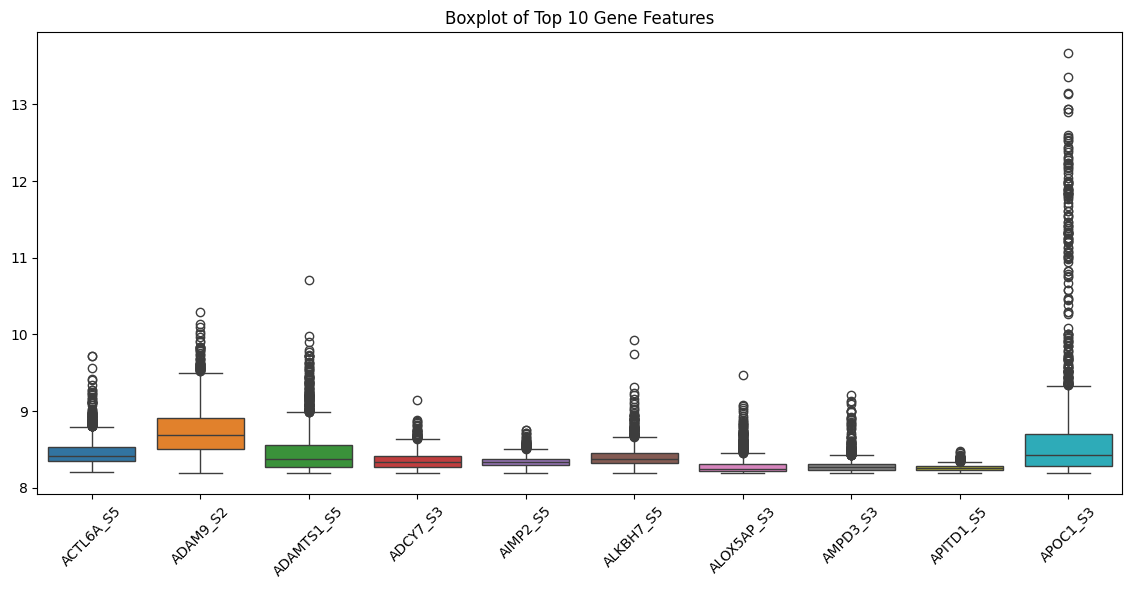

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 features (you can use variance, PCA, etc.)
top_features = df_440_Genes_2009_TCGA_Samples_Final_Dataset.columns[:10]

# Plot boxplots
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_440_Genes_2009_TCGA_Samples_Final_Dataset[top_features])
plt.title("Boxplot of Top 10 Gene Features")
plt.xticks(rotation=45)
plt.show()

 **Interpretation: Above box plots shows that still there are outliers which can effect the results when we will apply classification model. So we need to apply scaling like min/max** 

# Applying Min/Max scaling that brings everything to the [0, 1] range, which is ideal for matrix factorization techniques like NMF,

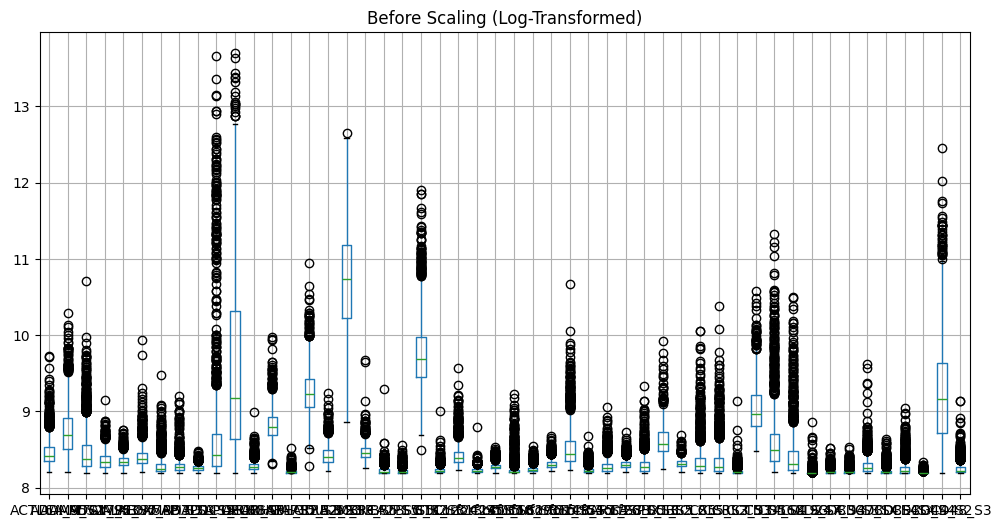

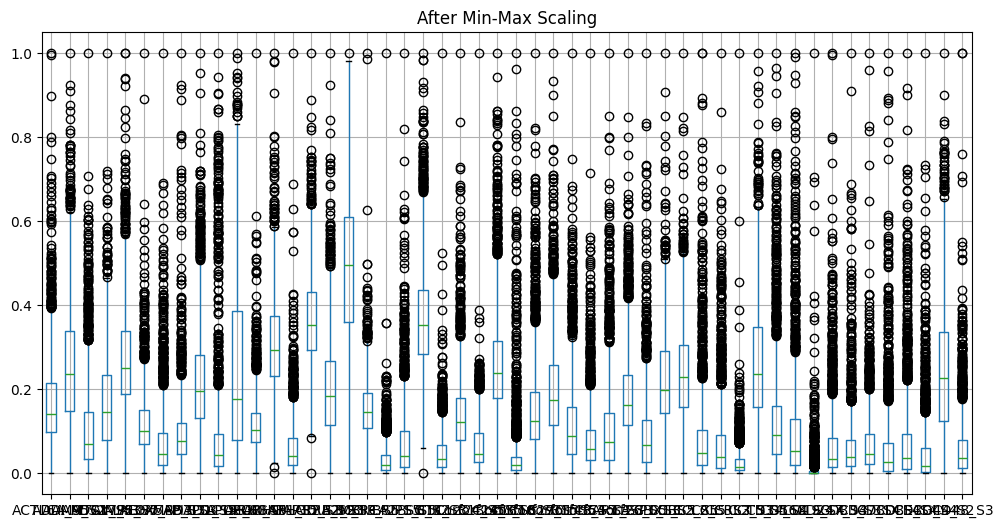

In [9]:
import matplotlib.pyplot as plt

# Before scaling
df_440_Genes_2009_TCGA_Samples_Final_Dataset.iloc[:, :50].boxplot(figsize=(12, 6))
plt.title("Before Scaling (Log-Transformed)")
plt.show()

# After scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_440_Genes_2009_TCGA_Samples_Final_Dataset_scaled = pd.DataFrame(
    scaler.fit_transform(df_440_Genes_2009_TCGA_Samples_Final_Dataset),
    index=df_440_Genes_2009_TCGA_Samples_Final_Dataset.index,
    columns=df_440_Genes_2009_TCGA_Samples_Final_Dataset.columns
)

df_440_Genes_2009_TCGA_Samples_Final_Dataset_scaled.iloc[:, :50].boxplot(figsize=(12, 6))
plt.title("After Min-Max Scaling")
plt.show()


**Before Min-Max Scaling:
Features show wide variation in value ranges, with some extreme outliers and inconsistent scales across genes.**

**After Min-Max Scaling:
All features are normalized to a uniform range [0, 1], preserving distribution shape but aligning scales for fair model input.**

In [11]:
df_440_Genes_2009_TCGA_Samples_Final_Dataset_scaled.head()

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  AIMP2_S5  \
TCGA-CR-7370-01A-HNSC-C1   0.536553  0.343672    0.084587  0.252781  0.274965   
TCGA-33-A4WN-01A-LUSC-C1   0.433147  0.908864    0.159697  0.270633  0.405603   
TCGA-IQ-A61H-01A-HNSC-C1   0.312020  0.263248    0.088864  0.268775  0.320974   
TCGA-AA-A00W-01A-COAD-C1   0.178667  0.238250    0.020745  0.060991  0.426896   
TCGA-DX-A7EM-01A-SARC-C1   0.143004  0.421412    0.500143  0.108355  0.129952   

                          ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  APITD1_S5  \
TCGA-CR-7370-01A-HNSC-C1   0.041963    0.026157  0.039544   0.127658   
TCGA-33-A4WN-01A-LUSC-C1   0.130685    0.038980  0.078190   0.366787   
TCGA-IQ-A61H-01A-HNSC-C1   0.034339    0.041034  0.085984   0.293694   
TCGA-AA-A00W-01A-COAD-C1   0.171862    0.005880  0.073643   0.167442   
TCGA-DX-A7EM-01A-SARC-C1   0.059547    0.016298  0.031400   0.198262   

                          APOC1_S3  ...   VTA1_S5  WDHD1_S5  WDR54_S5  \
TCGA-CR-7370-01A-HNSC-C1  0.008842  ...  0.266826  0.298118  0.093116   
TCGA-33-A4WN-01A-LUSC-C1  0.013642  ...  0.373262  0.071330  0.165838   
TCGA-IQ-A61H-01A-HNSC-C1  0.029415  ...  0.332452  0.159798  0.145000   
TCGA-AA-A00W-01A-COAD-C1  0.000471  ...  0.217413  0.045328  0.034110   
TCGA-DX-A7EM-01A-SARC-C1  0.009278  ...  0.129494  0.138027  0.085208   

                          WDR77_S5  WIPF1_S3  WNT2B_S2  WNT8B_S2   WSB2_S5  \
TCGA-CR-7370-01A-HNSC-C1  0.105619  0.268201  0.030350  0.004183  0.202420   
TCGA-33-A4WN-01A-LUSC-C1  0.249023  0.106763  0.030262  0.001245  0.297206   
TCGA-IQ-A61H-01A-HNSC-C1  0.109499  0.134547  0.152118  0.002932  0.497553   
TCGA-AA-A00W-01A-COAD-C1  0.507629  0.032831  0.005294  0.000732  0.338848   
TCGA-DX-A7EM-01A-SARC-C1  0.175346  0.273405  0.004886  0.002464  0.198103   

                          ZWILCH_S5    ZYX_S2  
TCGA-CR-7370-01A-HNSC-C1   0.299053  0.249515  
TCGA-33-A4WN-01A-LUSC-C1   0.246398  0.276047  
TCGA-IQ-A61H-01A-HNSC-C1   0.336266  0.205151  
TCGA-AA-A00W-01A-COAD-C1   0.183287  0.340901  
TCGA-DX-A7EM-01A-SARC-C1   0.160622  0.892512  

[5 rows x 440 columns]

# Loading Dataset having Immune Subtypes

In [13]:
import os
import pandas as pd



file_path = './df_440_Genes_2009_TCGA_Samples_Groups_Immune_Subtype.csv'
# Reading 450K methylation data
# Read the TSV file into a pandas DataFrame
try:
    df_440_Genes_2009_TCGA_Samples_Groups_Immune_Subtype = pd.read_csv(file_path, index_col=0)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path and try again.")
except Exception as e:
    print("An error occurred:", e)

Dataset loaded successfully.


In [15]:
# Keep only samples present in both datasets
common_samples = df_440_Genes_2009_TCGA_Samples_Final_Dataset_scaled.index.intersection(df_440_Genes_2009_TCGA_Samples_Groups_Immune_Subtype.index)

# Filter both DataFrames to common samples
genes_df = df_440_Genes_2009_TCGA_Samples_Final_Dataset_scaled.loc[common_samples]
labels_df = df_440_Genes_2009_TCGA_Samples_Groups_Immune_Subtype.loc[common_samples]

In [30]:
from sklearn.decomposition import PCA
import numpy as np
# Apply PCA
pca = PCA()
pca.fit(genes_df)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components_95}")

Number of components explaining 95% variance: 197


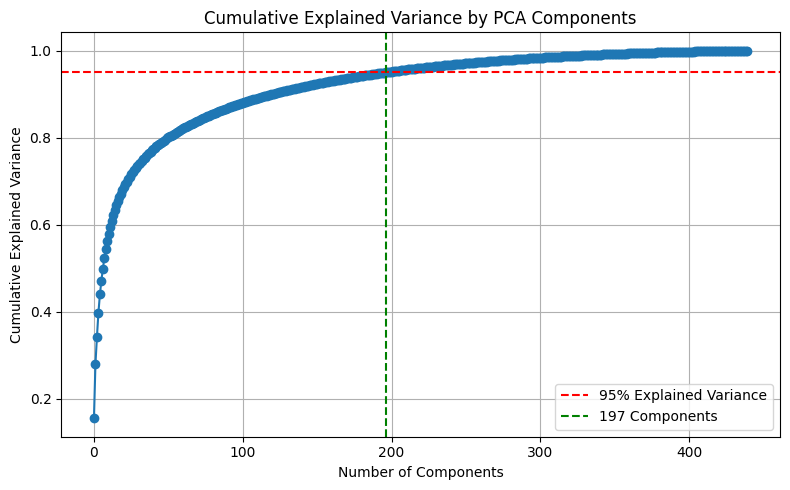

In [32]:
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axvline(x=n_components_95-1, color='g', linestyle='--', label=f'{n_components_95} Components')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

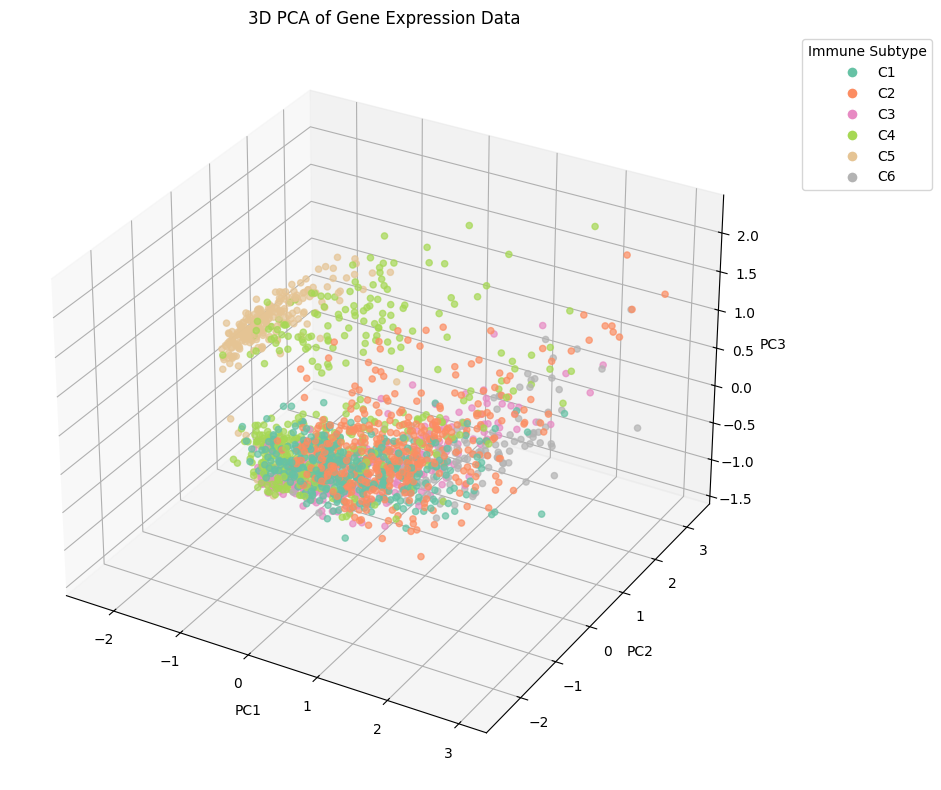

In [34]:


# Step 4: PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(genes_df)

# Step 5: Create plot-ready DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3"], index=genes_df.index)
df_pca["Immune Subtype"] = labels_df["Immune Subtype"]

# Step 6: 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

subtypes = df_pca["Immune Subtype"].astype('category')
colors = subtypes.cat.codes

scatter = ax.scatter(df_pca["PC1"], df_pca["PC2"], df_pca["PC3"],
                     c=colors, cmap='Set2', alpha=0.7)

ax.set_title("3D PCA of Gene Expression Data")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Add legend
unique_labels = subtypes.cat.categories
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=label,
               markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=8)
    for i, label in enumerate(unique_labels)
]
ax.legend(handles=legend_handles, title="Immune Subtype", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**INTERPRETATION: This 3D scatter plot shows the first three principal components (PC1, PC2, PC3) from PCA, visualizing how samples group based on immune subtypes (C1–C6). While some clusters show partial separation, there is notable overlap, indicating moderate distinction between subtypes in reduced dimensions.**

In [36]:
genes_df.shape

(2009, 440)

In [38]:
# After fitting PCA
explained_variance = pca.explained_variance_ratio_

# Print variance explained by each component
for i, var in enumerate(explained_variance, start=1):
    print(f"PC{i} explains {var:.2%} of the variance")


PC1 explains 15.48% of the variance
PC2 explains 12.43% of the variance
PC3 explains 6.25% of the variance


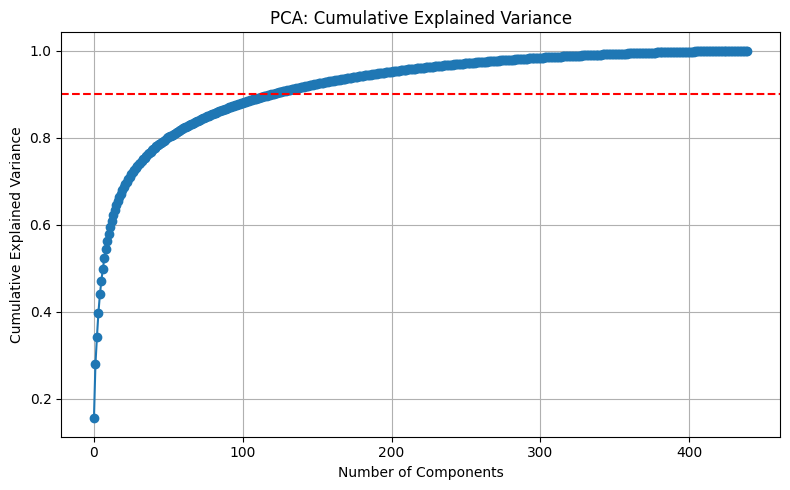

In [40]:
# Run PCA without limiting n_components
pca_full = PCA().fit(genes_df)

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--')
plt.tight_layout()
plt.show()


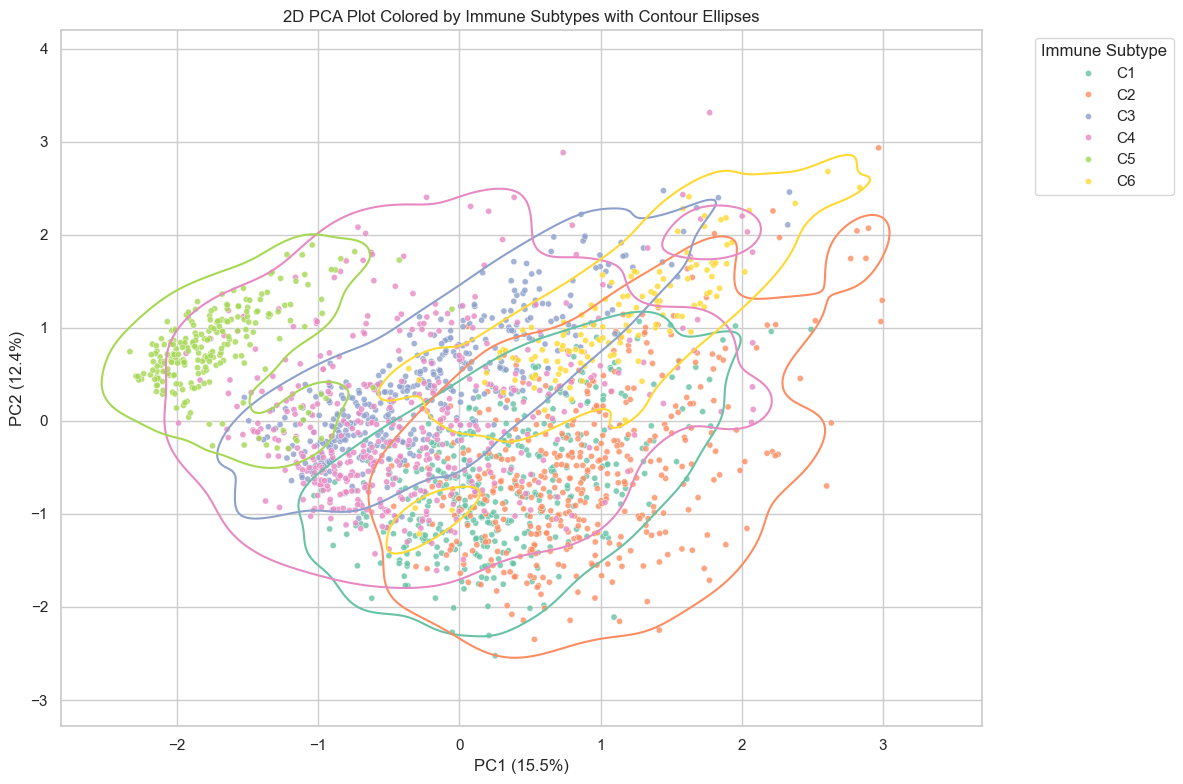

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd

# PCA (assuming you already did this)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(genes_df)

# Prepare DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"], index=genes_df.index)
df_pca["Immune Subtype"] = labels_df["Immune Subtype"]

# Set style
sns.set(style="whitegrid", rc={"figure.figsize": (12, 8)})

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_pca,
    x="PC1", y="PC2",
    hue="Immune Subtype",
    palette="Set2",
    s=20,
    alpha=0.8
)

# Add ellipse-like density contours for each subtype
for subtype in df_pca["Immune Subtype"].unique():
    subset = df_pca[df_pca["Immune Subtype"] == subtype]
    sns.kdeplot(
        x=subset["PC1"], y=subset["PC2"],
        levels=1,  # Only one contour line
        color=sns.color_palette("Set2")[df_pca["Immune Subtype"].unique().tolist().index(subtype)],
        linewidths=1.5
    )

plt.title("2D PCA Plot Colored by Immune Subtypes with Contour Ellipses")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title="Immune Subtype", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**This 2D PCA plot visualizes immune subtypes (C1–C6) using the first two principal components, with each point representing a sample. The contour ellipses highlight the spread and overlap of each subtype, indicating partial clustering but with significant overlap between groups.**

# Applying nmf technique for dimentionality reduction. First, i will check how many components will give less reconstruction error

In [17]:
genes_df.head()

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  AIMP2_S5  \
TCGA-CR-7370-01A-HNSC-C1   0.536553  0.343672    0.084587  0.252781  0.274965   
TCGA-33-A4WN-01A-LUSC-C1   0.433147  0.908864    0.159697  0.270633  0.405603   
TCGA-IQ-A61H-01A-HNSC-C1   0.312020  0.263248    0.088864  0.268775  0.320974   
TCGA-AA-A00W-01A-COAD-C1   0.178667  0.238250    0.020745  0.060991  0.426896   
TCGA-DX-A7EM-01A-SARC-C1   0.143004  0.421412    0.500143  0.108355  0.129952   

                          ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  APITD1_S5  \
TCGA-CR-7370-01A-HNSC-C1   0.041963    0.026157  0.039544   0.127658   
TCGA-33-A4WN-01A-LUSC-C1   0.130685    0.038980  0.078190   0.366787   
TCGA-IQ-A61H-01A-HNSC-C1   0.034339    0.041034  0.085984   0.293694   
TCGA-AA-A00W-01A-COAD-C1   0.171862    0.005880  0.073643   0.167442   
TCGA-DX-A7EM-01A-SARC-C1   0.059547    0.016298  0.031400   0.198262   

                          APOC1_S3  ...   VTA1_S5  WDHD1_S5  WDR54_S5  \
TCGA-CR-7370-01A-HNSC-C1  0.008842  ...  0.266826  0.298118  0.093116   
TCGA-33-A4WN-01A-LUSC-C1  0.013642  ...  0.373262  0.071330  0.165838   
TCGA-IQ-A61H-01A-HNSC-C1  0.029415  ...  0.332452  0.159798  0.145000   
TCGA-AA-A00W-01A-COAD-C1  0.000471  ...  0.217413  0.045328  0.034110   
TCGA-DX-A7EM-01A-SARC-C1  0.009278  ...  0.129494  0.138027  0.085208   

                          WDR77_S5  WIPF1_S3  WNT2B_S2  WNT8B_S2   WSB2_S5  \
TCGA-CR-7370-01A-HNSC-C1  0.105619  0.268201  0.030350  0.004183  0.202420   
TCGA-33-A4WN-01A-LUSC-C1  0.249023  0.106763  0.030262  0.001245  0.297206   
TCGA-IQ-A61H-01A-HNSC-C1  0.109499  0.134547  0.152118  0.002932  0.497553   
TCGA-AA-A00W-01A-COAD-C1  0.507629  0.032831  0.005294  0.000732  0.338848   
TCGA-DX-A7EM-01A-SARC-C1  0.175346  0.273405  0.004886  0.002464  0.198103   

                          ZWILCH_S5    ZYX_S2  
TCGA-CR-7370-01A-HNSC-C1   0.299053  0.249515  
TCGA-33-A4WN-01A-LUSC-C1   0.246398  0.276047  
TCGA-IQ-A61H-01A-HNSC-C1   0.336266  0.205151  
TCGA-AA-A00W-01A-COAD-C1   0.183287  0.340901  
TCGA-DX-A7EM-01A-SARC-C1   0.160622  0.892512  

[5 rows x 440 columns]

100%|█████████████████████████████████████████████| 8/8 [00:03<00:00,  2.57it/s]

Corrected Optimal Number of Components: 9
Components Range: [2, 3, 4, 5, 6, 7, 8, 9]
Reconstruction Errors: [104.49927754715904, 98.42408938738915, 94.74995751635832, 90.96875092247791, 88.2192752774923, 85.85244584052377, 83.7131298882323, 81.85798783832833]
Index of Minimum Error: 7
Optimal n_components: 9


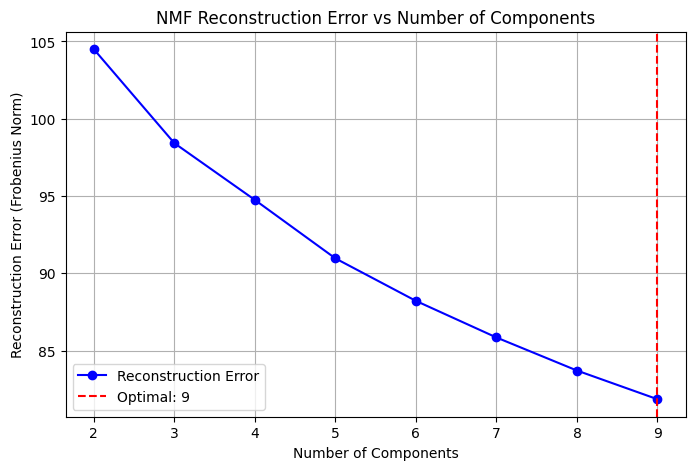

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from tqdm import tqdm

# Define range of components to test
components_range = range(2, 10)  # Testing from 2 to 10 components
errors = []

for n in tqdm(components_range):
    model = NMF(n_components=n, init='random', random_state=42, max_iter=10000)
    W = model.fit_transform(genes_df)
    H = model.components_
    reconstruction = np.dot(W, H)
    error = np.linalg.norm(genes_df - reconstruction, ord='fro')  # Compute Frobenius norm error
    errors.append(error)

# Correct way to find optimal number of components
optimal_n_components = components_range[np.argmin(errors)]  # Select the index with minimum error

print(f"Corrected Optimal Number of Components: {optimal_n_components}")



print("Components Range:", list(components_range))
print("Reconstruction Errors:", errors)
print("Index of Minimum Error:", np.argmin(errors))
print("Optimal n_components:", optimal_n_components)


plt.figure(figsize=(8, 5))
plt.plot(components_range, errors, marker='o', label="Reconstruction Error", color="blue")

# Corrected optimal component line
plt.axvline(x=optimal_n_components, color='red', linestyle='--', label=f"Optimal: {optimal_n_components}")

plt.title("NMF Reconstruction Error vs Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Reconstruction Error (Frobenius Norm)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
**NMF (Non-negative Matrix Factorization) is useful for dimensionality reduction when working with non-negative data. It helps uncover latent biological patterns while preserving data sparsity and non-negativity.**

# Checking which genes are contributing most in each component

Top Contributing Genes for Each Component:


Component 1 Component 2   Component 3 Component 4 Component 5  \
0      CENPO_S5     APOE_S3     CTNNA1_S2      BSG_S2   COL6A3_S2   
1      TRA2B_S5    APOC1_S3     UBE2J1_S5     MYL6_S5   COL3A1_S2   
2  HNRNPA2B1_S5      PLG_S5       HN1L_S5    SNRPB_S5   COL1A2_S2   
3       MCM7_S5   IGFBP4_S2       NEO1_S2    NUTF2_S5   COL6A1_S2   
4      LMNB2_S5    VDAC1_S5    EIF2AK1_S5     RHOC_S5      FN1_S2   
5     HNRNPR_S5     SDC1_S5   MARCKSL1_S2  ARHGDIA_S2    MMP14_S2   
6       CCT5_S5    SAR1B_S5     HNRNPR_S5     PFN1_S5     MMP2_S2   
7       MCM3_S5      FN1_S2       RHOA_S2    PSMC3_S5    SPARC_S2   
8      RBM14_S5     RHOB_S2  HNRNPA2B1_S5    PA2G4_S5    THBS2_S2   
9      SNRPB_S5    IFRD2_S5       TPM3_S5    IFRD2_S5    HSPG2_S2   

   Component 6 Component 7   Component 8  Component 9  
0    SLC1A3_S3      MX1_S1      ITGA3_S2    LAPTM5_S3  
1     SPARC_S2     OAS2_S1        MSN_S3      CD53_S3  
2     CELF2_S3     OAS3_S1     CTNNA1_S2    IL10RA_S3  
3  MARCKSL1_S2     IFI6_S1        MET_S5     HCLS1_S3  
4    RASSF4_S3    IFI27_S1        EZR_S5   NCKAP1L_S3  
5      RHOB_S2    ISG15_S1       CD59_S2  HLA-DRB1_S3  
6    RASSF2_S3    IFI44_S1       ENO1_S5     IFI30_S3  
7      WSB2_S5    IFIT3_S1      IGF2R_S2      CYBB_S3  
8    CORO1C_S5    STAT1_S1  TNFRSF12A_S5     DOCK2_S3  
9      APOE_S3    IFIT1_S1       CTSC_S3     EVI2B_S3

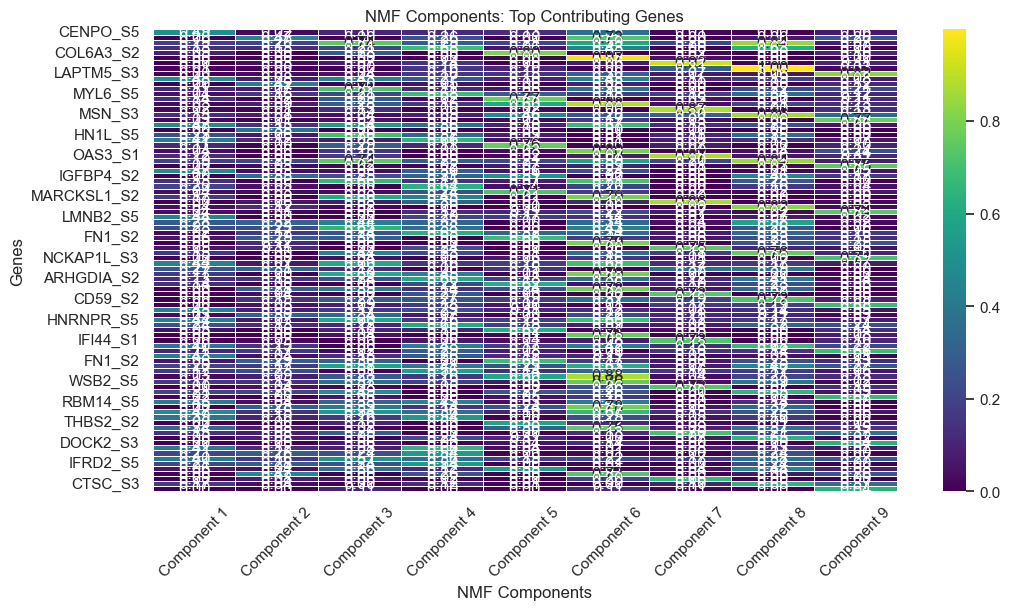

In [50]:
# Step 2: Create DataFrame for visualization
gene_names = df_440_Genes_2009_TCGA_Samples_Final_Dataset.columns  # Extract gene names
H_df = pd.DataFrame(H, columns=gene_names, index=[f'Component {i+1}' for i in range(optimal_n_components)])

# Step 3: Find top genes contributing to each component
top_genes_per_component = {}
top_n = 10  # Show top 10 genes for each component

for i in range(optimal_n_components):
    top_genes = H_df.iloc[i].nlargest(top_n)  # Get top N genes
    top_genes_per_component[f'Component {i+1}'] = top_genes.index.tolist()

# Step 4: Convert to DataFrame for better readability
top_genes_df = pd.DataFrame(top_genes_per_component)
print("Top Contributing Genes for Each Component:")
display(top_genes_df)

# Step 5: Heatmap to show gene importance across components
plt.figure(figsize=(12, 6))
sns.heatmap(H_df[top_genes_df.values.flatten()].T, cmap="viridis", annot=True, fmt=".2f", linewidths=0.5)
plt.title("NMF Components: Top Contributing Genes")
plt.xlabel("NMF Components")
plt.ylabel("Genes")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

**Above heatmap is showing that which genes has contributed in which component the most**

# Making W as dataframe for further classification tasks

# Plotting heatmap of nmf to check the intensity of gene expression in components

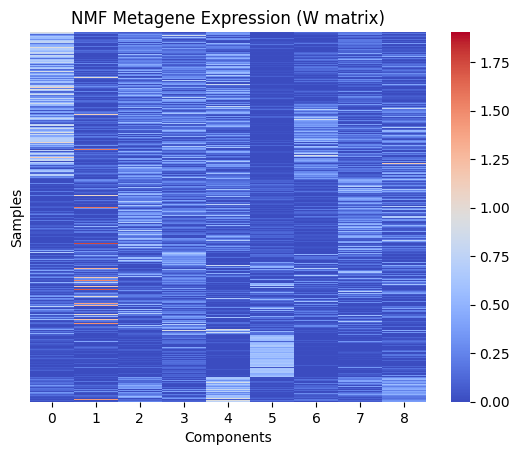

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(W, cmap='coolwarm', yticklabels=False)
plt.title('NMF Metagene Expression (W matrix)')
plt.xlabel('Components')
plt.ylabel('Samples')
plt.show()

# Interpretation of heatmap:
# 1. Component expression is sparse and distinct

**Most cells are dark blue, indicating low values, meaning most components are inactive for most samples.
NMF output — it’s picking up distinct patterns.**

# 2. Some components dominate specific samples:

**For example:
Component 0 shows strong activation (light blue, orange) for a small subset of samples near the top.Comppnent 1 has high activation of gene expression
Component 5 is activated in a cluster of samples lower down.
Components 6, 7, and 8 have low to moderate activations in specific bands of samples.
This suggests that different groups of samples express different combinations of components, which may relate to hidden structures, like subtypes or biological classes.**

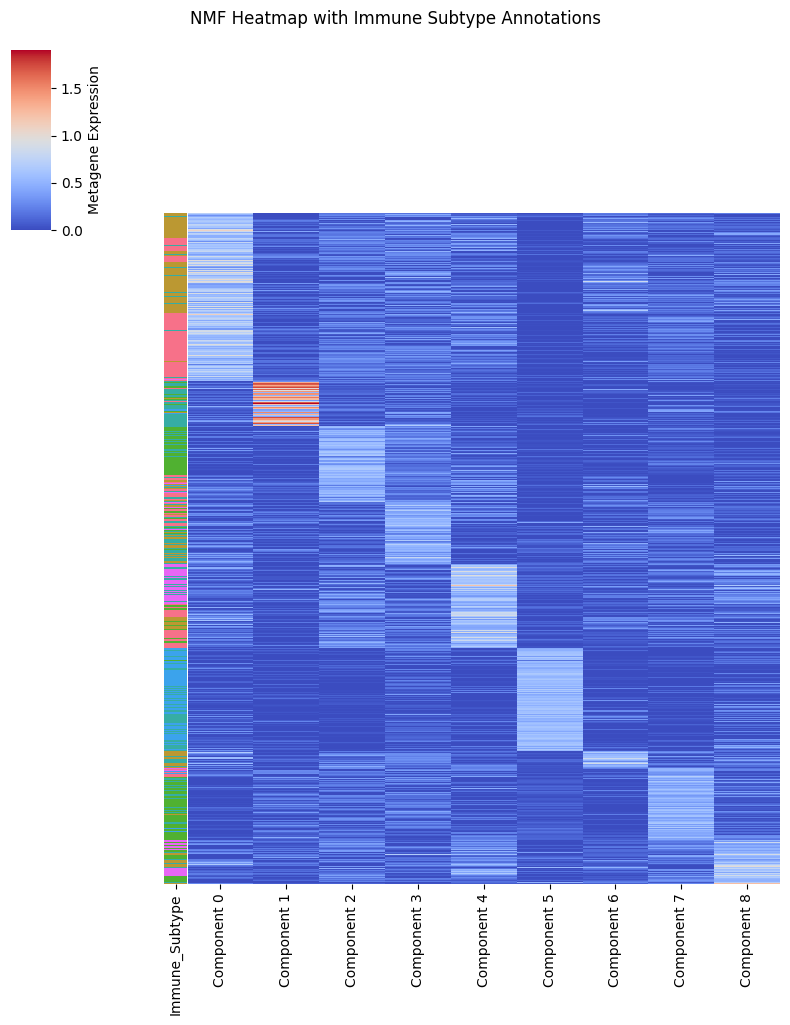

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame from W
W_df_sorted_samples = pd.DataFrame(W, columns=[f"Component {i}" for i in range(W.shape[1])])

# Step 1: Merge NMF data and labels
# Ensure both W_df and labels_df have the same index (sample IDs). If not, you need to align them manually.
W_df_sorted_samples['Immune_Subtype'] = labels_df['Immune Subtype'].values  # align by index
W_df_sorted_samples['Dominant_Component'] = W_df_sorted_samples.iloc[:, :-1].idxmax(axis=1)  # exclude label column before finding dominant component

# Step 2: Sort by dominant component
W_df_sorted_samples_heatmap = W_df_sorted_samples.sort_values('Dominant_Component')
dominant_sorted = W_df_sorted_samples_heatmap['Dominant_Component']
labels_sorted = W_df_sorted_samples_heatmap['Immune_Subtype']

#  Step 3: Drop annotation columns before plotting
heatmap_data = W_df_sorted_samples_heatmap.drop(columns=['Dominant_Component', 'Immune_Subtype'])

#  Optional: create row colors for annotation
unique_labels = sorted(labels_sorted.unique())
label_colors = dict(zip(unique_labels, sns.color_palette("husl", len(unique_labels))))
row_colors = labels_sorted.map(label_colors)

#  Plot with seaborn clustermap
sns.clustermap(
    heatmap_data,
    cmap='coolwarm',
    row_colors=row_colors,
    col_cluster=False,
    row_cluster=False,
    yticklabels=False,
    figsize=(8, 10),
    cbar_kws={'label': 'Metagene Expression'}
)

plt.suptitle("NMF Heatmap with Immune Subtype Annotations", y=1.02)
plt.show()


**This heatmap shows the NMF components (metagenes) for each sample, sorted by their dominant component and annotated by immune subtype (colored on the left). Brighter regions indicate stronger expression of a specific component, and distinct vertical patterns highlight how different metagenes are associated with particular immune subtypes.**

In [25]:
# Convert W matrix to DataFrame
W_df = pd.DataFrame(W, columns=[f'Component {i+1}' for i in range(optimal_n_components)], index=df_440_Genes_2009_TCGA_Samples_Final_Dataset.index)

# Display the transformed dataset
#import ace_tools as tools
#tools.display_dataframe_to_user(name="NMF Reduced Data (W Matrix)", dataframe=W_df)
W_df.head()

Component 1  Component 2  Component 3  Component 4  \
TCGA-CR-7370-01A-HNSC-C1     0.676679     0.000000     0.179101     0.000000   
TCGA-33-A4WN-01A-LUSC-C1     0.828174     0.086762     0.167662     0.004148   
TCGA-IQ-A61H-01A-HNSC-C1     0.939505     0.113551     0.063216     0.010708   
TCGA-AA-A00W-01A-COAD-C1     0.587319     0.102486     0.272639     0.142500   
TCGA-DX-A7EM-01A-SARC-C1     0.223873     0.000000     0.140130     0.100468   

                          Component 5  Component 6  Component 7  Component 8  \
TCGA-CR-7370-01A-HNSC-C1     0.352068     0.016898     0.183882     0.159975   
TCGA-33-A4WN-01A-LUSC-C1     0.139288     0.000000     0.066236     0.301250   
TCGA-IQ-A61H-01A-HNSC-C1     0.298551     0.020451     0.133724     0.191546   
TCGA-AA-A00W-01A-COAD-C1     0.000000     0.010856     0.011499     0.204186   
TCGA-DX-A7EM-01A-SARC-C1     0.834108     0.094338     0.094367     0.095315   

                          Component 9  
TCGA-CR-7370-01A-HNSC-C1     0.046924  
TCGA-33-A4WN-01A-LUSC-C1     0.074061  
TCGA-IQ-A61H-01A-HNSC-C1     0.032605  
TCGA-AA-A00W-01A-COAD-C1     0.000000  
TCGA-DX-A7EM-01A-SARC-C1     0.115463

# t-SNE Visualization of NMF Components

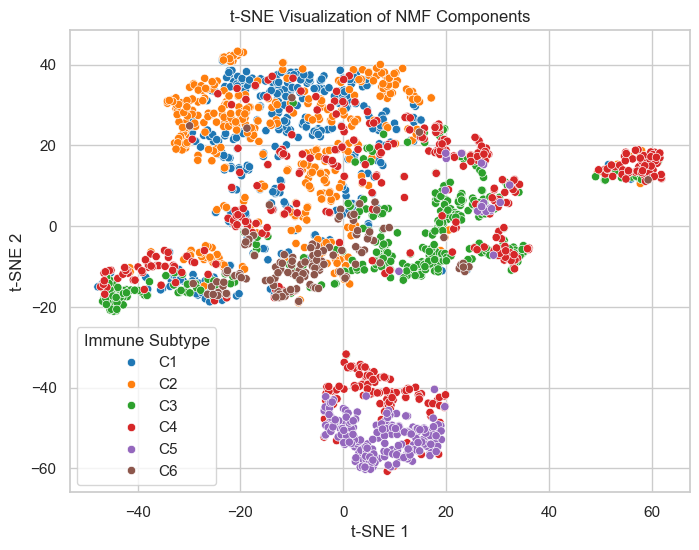

In [62]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
W_2D = tsne.fit_transform(W)

tsne_df = pd.DataFrame(W_2D, columns=["t-SNE 1", "t-SNE 2"])
tsne_df["Immune Subtype"] = labels_df["Immune Subtype"].values  # Add immune subtype labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x="t-SNE 1", y="t-SNE 2", hue="Immune Subtype", palette="tab10")
plt.title("t-SNE Visualization of NMF Components")
plt.show()

**This t-SNE plot visualizes high-dimensional NMF components in 2D, with points colored by immune subtype. It reveals potential clusters and subtype separability, helping assess how well NMF captures subtype-specific patterns in a lower-dimensional space.**

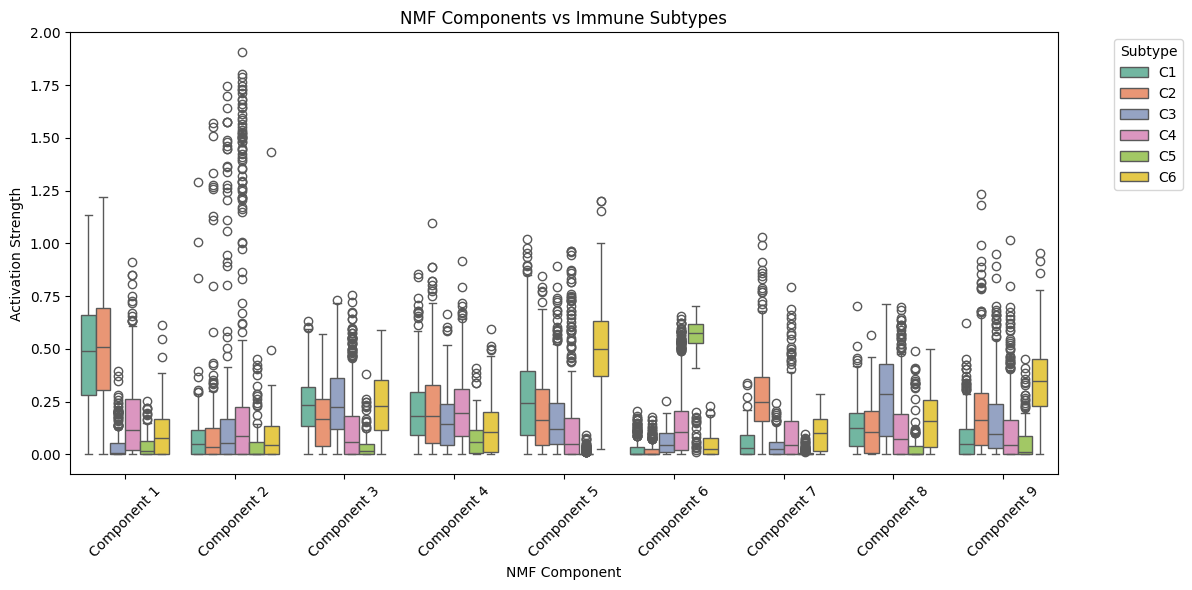

In [450]:
import seaborn as sns
import matplotlib.pyplot as plt
W_df['Immune Subtype']=labels_df['Immune Subtype'].values

# Convert data to long format for easy visualization
W_melted = W_df.melt(id_vars=["Immune Subtype"], var_name="NMF Component", value_name="Activation Strength")

# Boxplot to compare NMF components across immune subtypes
plt.figure(figsize=(12, 6))
sns.boxplot(data=W_melted, x="NMF Component", y="Activation Strength", hue="Immune Subtype", palette="Set2")
plt.xticks(rotation=45)
plt.title("NMF Components vs Immune Subtypes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Subtype")
plt.tight_layout()
plt.show()


# This boxplot compares the activation strength of each NMF component across different immune subtypes. It highlights which components are more dominant or discriminative for specific subtypes, helping identify subtype-specific gene expression patterns learned by the NMF model.**

In [29]:
W_df.head()

Component 1  Component 2  Component 3  Component 4  \
TCGA-CR-7370-01A-HNSC-C1     0.676679     0.000000     0.179101     0.000000   
TCGA-33-A4WN-01A-LUSC-C1     0.828174     0.086762     0.167662     0.004148   
TCGA-IQ-A61H-01A-HNSC-C1     0.939505     0.113551     0.063216     0.010708   
TCGA-AA-A00W-01A-COAD-C1     0.587319     0.102486     0.272639     0.142500   
TCGA-DX-A7EM-01A-SARC-C1     0.223873     0.000000     0.140130     0.100468   

                          Component 5  Component 6  Component 7  Component 8  \
TCGA-CR-7370-01A-HNSC-C1     0.352068     0.016898     0.183882     0.159975   
TCGA-33-A4WN-01A-LUSC-C1     0.139288     0.000000     0.066236     0.301250   
TCGA-IQ-A61H-01A-HNSC-C1     0.298551     0.020451     0.133724     0.191546   
TCGA-AA-A00W-01A-COAD-C1     0.000000     0.010856     0.011499     0.204186   
TCGA-DX-A7EM-01A-SARC-C1     0.834108     0.094338     0.094367     0.095315   

                          Component 9 Immune Subtype  
TCGA-CR-7370-01A-HNSC-C1     0.046924             C1  
TCGA-33-A4WN-01A-LUSC-C1     0.074061             C1  
TCGA-IQ-A61H-01A-HNSC-C1     0.032605             C1  
TCGA-AA-A00W-01A-COAD-C1     0.000000             C1  
TCGA-DX-A7EM-01A-SARC-C1     0.115463             C1

# **Step 2: Classification Model Development**

# Splitting dataset into 80% training and 20% Testing sets and then further 80% for train and 20 % validation from Training datset.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and labels
X = W_df.drop(columns=["Immune Subtype"])
y = W_df["Immune Subtype"]

# Split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, stratify=y_train_full, random_state=42
)

In [33]:
X_train_full.shape

(1607, 9)

In [35]:
y_train_full.shape

(1607,)

In [37]:
X_train.shape

(1285, 9)

In [39]:
y_train.shape

(1285,)

In [41]:
X_val.shape

(322, 9)

In [43]:
y_val.shape

(322,)

In [47]:
X_test.shape

(402, 9)

In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'C': [1, 10, 50, 100],
    'gamma': [0.1, 0.01, 0.001, 'scale'],
    'kernel': ['rbf']
}

# Define base SVM model with class_weight balanced
svm = SVC(probability=True, class_weight='balanced', random_state=42)

# Grid search with 10-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='balanced_accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best results
print("Best Parameters (with class_weight='balanced'):", grid_search.best_params_)
print(f"Best Cross-Validated Accuracy (CV=10): {grid_search.best_score_:.4f}")

# Best estimator
best_svm = grid_search.best_estimator_


Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best Parameters (with class_weight='balanced'): {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validated Accuracy (CV=10): 0.7897


# Applying Support Vector Machine Classifier with initial reseaonable parameters. SVM is good for generalisation purpose.

In [195]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on validation set
y_val_pred = best_svm.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy SVM : {val_acc:.4f}")
print(" Classification Report SVM (Validation):")
print(classification_report(y_val, y_val_pred))

# Predict on test set
y_test_pred = best_svm.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f" Test Accuracy SVM : {test_acc:.4f}")
print(" Classification Report SVM (Test):")
print(classification_report(y_test, y_test_pred))


Validation Accuracy SVM : 0.7981
 Classification Report SVM (Validation):
              precision    recall  f1-score   support

          C1       0.84      0.82      0.83        62
          C2       0.84      0.85      0.84        66
          C3       0.87      0.77      0.82        61
          C4       0.72      0.74      0.73        74
          C5       0.91      0.86      0.89        37
          C6       0.55      0.73      0.63        22

    accuracy                           0.80       322
   macro avg       0.79      0.80      0.79       322
weighted avg       0.81      0.80      0.80       322

 Test Accuracy SVM : 0.7985
 Classification Report SVM (Test):
              precision    recall  f1-score   support

          C1       0.80      0.83      0.82        77
          C2       0.88      0.83      0.86        83
          C3       0.76      0.83      0.80        77
          C4       0.80      0.68      0.74        92
          C5       0.95      0.87      0.91      

# Summary of SVM Performance (Validation & Test)
**The SVM classifier achieved consistent performance on both validation (79.8%) and test (79.9%) datasets, indicating good generalization.** 

# Strong Classes:
**Classes C1, C2, and C5 had high precision and recall (F1-scores > 0.82), showing that the model is both accurate and confident in predicting these classes.
C2 and C5, in particular, were the most confidently classified across both sets.**
# Moderate Classes:
**C3 and C4 had slightly lower F1-scores (around 0.73–0.82). C3 had high precision but slightly lower recall, suggesting the model is cautious and avoids over-predicting this class.
C4 shows the most confusion — precision and recall are both moderate (~0.73–0.74), indicating overlap with nearby classes.**
# Challenging Class (C6):
**The model struggled with C6 — especially in precision (0.54–0.55), though recall improved to 0.78 on the test set.
This suggests C6 is often confused with other classes, but the model is now recovering more of them (higher recall) — possibly at the cost of precision.**
**Macro vs. Weighted Avg:
The macro averages (simple average across all classes) are around 0.79, showing fair treatment across classes.
The weighted averages (accounts for class imbalance) also hover around 0.80, confirming overall stability.**

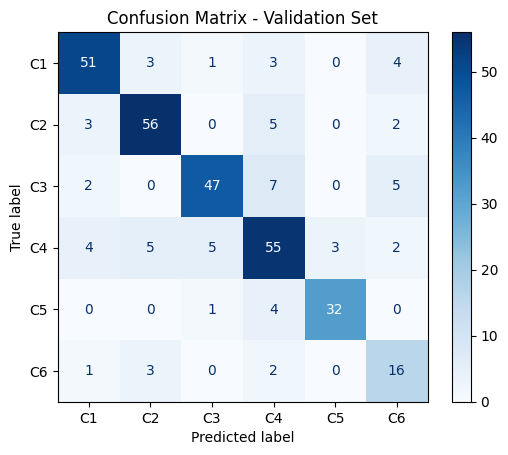

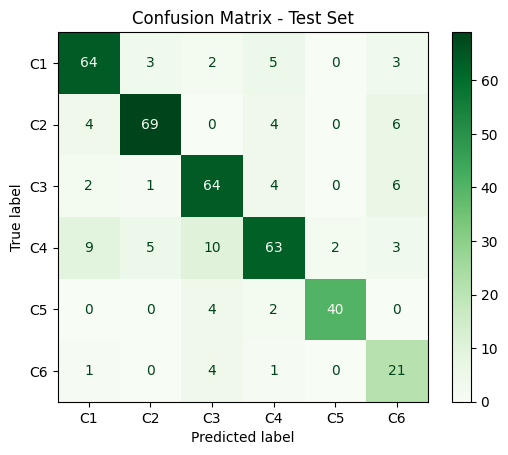

In [197]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for validation set
cm_val = confusion_matrix(y_val, y_val_pred)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=best_svm.classes_)
disp_val.plot(cmap='Blues')
plt.title("Confusion Matrix - Validation Set")
plt.show()

# Confusion matrix for test set
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_svm.classes_)
disp_test.plot(cmap='Greens')
plt.title("Confusion Matrix - Test Set")
plt.show()



# Confusion Matrix – Validation Set (Top Plot)

**The SVM model performs well on C1, C2, and C5, with most predictions on the diagonal (e.g., 51/62 correct for C1, 56/66 for C2, 32/37 for C5).
C3 and C4 show moderate confusion:
C3: Confused with C4 (7 times), indicating overlapping patterns.
C4: Misclassified into C3 (10 times) and C1 (4 times), reflecting boundary ambiguity.
C6 improved in recall (16/22 correct), though some misclassified into C2 and C3.**

# Confusion Matrix – Test Set (Bottom Plot)

**C1 and C2 remain strong (64/77 and 69/83 correct).
C3 is very well predicted (64/77), a good jump from validation performance.
C4 is still a bit mixed (63/92 correct) with confusion mainly into C3.
C5 performs excellently (40/46 correct).
C6 again shows good recall (21/27 correct), only minor confusion into C1–C4.**

**The confusion matrices confirm the SVM classifier's robustness on both validation and test sets, with high accuracy for dominant classes (C1, C2, C5). Class C4 shows consistent overlap with C3, suggesting some feature similarity. Notably, the model improved recall for class C6, a previously underrepresented class, demonstrating better generalization on the test set.**

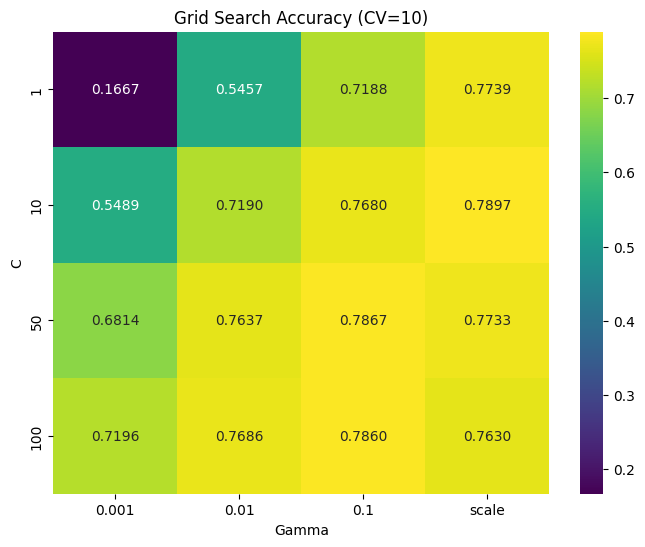

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert grid search results to DataFrame
results_df1 = pd.DataFrame(grid_search.cv_results_)

# Pivot table: mean test score (accuracy) as function of C and gamma
heatmap_data = results_df1.pivot(index="param_C", columns="param_gamma", values="mean_test_score")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis")
plt.title("Grid Search Accuracy (CV=10)")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.show()

**The heatmap shows the cross-validated accuracy (CV=10) for different combinations of C and gamma in the SVM model. 
Accuracy improves as both C and gamma increase, with the best performance (~0.79) achieved at C=10 and gamma=scale or 0.1, indicating a good balance between bias and variance. Lower values (e.g., C=1, gamma=0.001) lead to underfitting.**

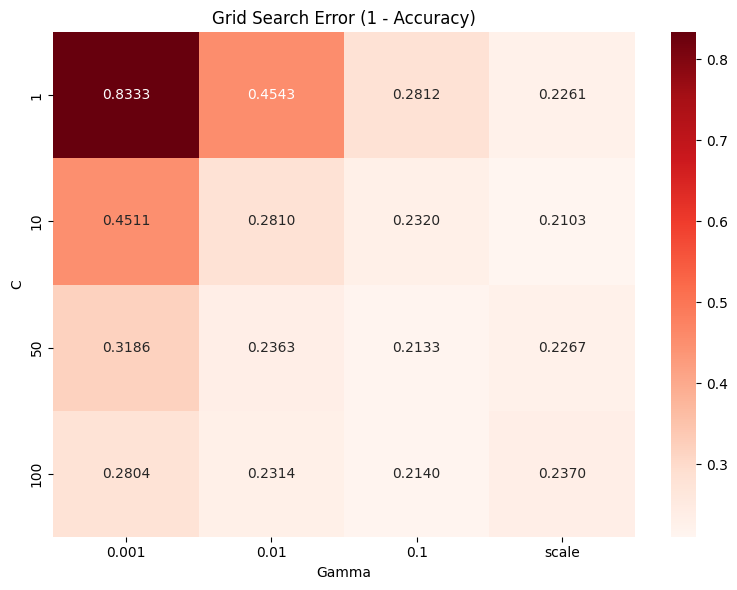

In [201]:
# Add error to results DataFrame
results_df1["error"] = 1 - results_df1["mean_test_score"]

# Pivot for error plot
heatmap_error = results_df1.pivot(index="param_C", columns="param_gamma", values="error")

# Plot error heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_error, annot=True, fmt=".4f", cmap="Reds")
plt.title("Grid Search Error (1 - Accuracy)")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.tight_layout()
plt.show()

# Heatmap of C and Gamma (Bias-Variance Trade-off)

Hyperparameter Tuning for SVM – Bias-Variance Analysis using Heatmap
To investigate the effect of SVM hyperparameters on model performance, a grid search was conducted over combinations of C and gamma using an RBF kernel. The resulting heatmap visualizes the grid search error (1 - accuracy) for each parameter pair. This provides insights into the bias-variance trade-off.

Low C Values (e.g., C=1):
These enforce strong regularization, encouraging simpler models. The heatmap shows high errors (e.g., 0.8333 for gamma=0.001), indicating underfitting and high bias — the model is too constrained to capture the data patterns.
High Gamma Values (e.g., gamma=0.1, scale):
Higher gamma makes the rbf kernel more sensitive to individual points, which increases model complexity. As we move rightward on the heatmap, performance initially improves (lower error), but too high a gamma leads to overfitting, especially with large C, seen by slightly increased error again.
High C Values (e.g., C=100):
These reduce regularization, letting the model fit more complex patterns. However, this can increase variance, especially in conjunction with high gamma. For example, C=100 and gamma=0.1 or scale show increased error (~0.214–0.237), indicating overfitting to training data.
Balanced Region (Best Trade-off):
The lowest validation errors occur around C = 10 and gamma = scale(2.665714), indicating the optimal balance between bias and variance. This region corresponds to models that are complex enough to capture patterns, but regularized enough to generalize well.


In [203]:
# Your calculated scale value
scale_gamma = 1 / (X_train.shape[1] * np.var(X_train.to_numpy(), axis=0).mean())
print(f"Gamma used by 'scale': {scale_gamma:.6f}")

# Copy results and replace 'scale' with numeric gamma
plot_data = results_df1.copy()
plot_data["param_gamma"] = plot_data["param_gamma"].replace("scale", scale_gamma)

# Now convert both params to float
plot_data["param_C"] = plot_data["param_C"].astype(float)
plot_data["param_gamma"] = plot_data["param_gamma"].astype(float)

Gamma used by 'scale': 2.665714


/var/folders/ml/23lnxp3n2gs0vq78xwywvdm00000gn/T/ipykernel_58306/1215436271.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plot_data["param_gamma"] = plot_data["param_gamma"].replace("scale", scale_gamma)


# Plotting to see the grid search performance surface

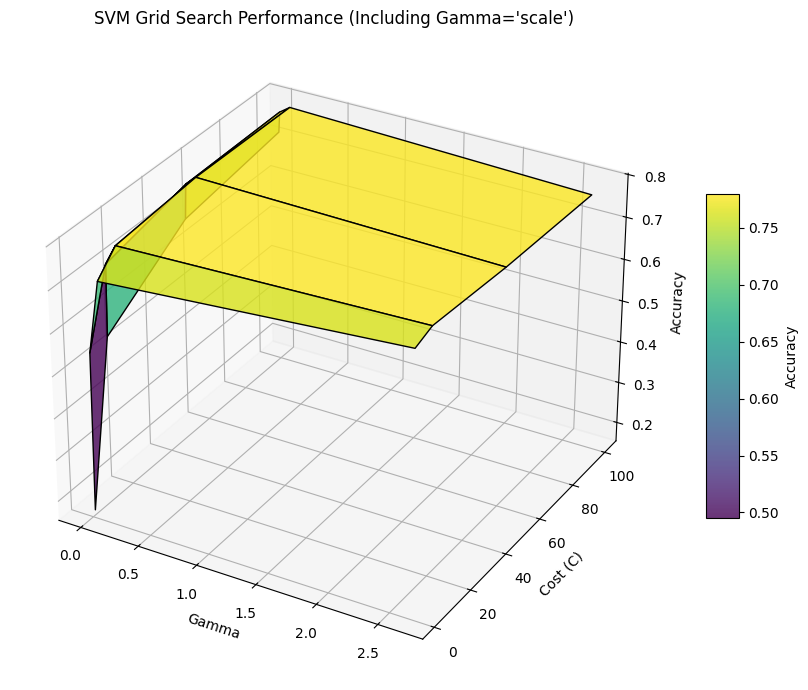

In [206]:
# Pivot to form grid
pivot_table = plot_data.pivot(index="param_C", columns="param_gamma", values="mean_test_score")

# Meshgrid for 3D
X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)
Z = pivot_table.values

# 3D Surface Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)

ax.set_xlabel("Gamma")
ax.set_ylabel("Cost (C)")
ax.set_zlabel("Accuracy")
ax.set_title("SVM Grid Search Performance (Including Gamma='scale')")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Accuracy')
plt.tight_layout()
plt.show()

**This 3D surface plot shows the SVM grid search performance across different values of C (Cost) and gamma, including gamma='scale'. Accuracy improves rapidly as both C and gamma increase, then plateaus around 0.78–0.79, indicating the model reaches its optimal bias-variance balance in the higher parameter range.**



# Hyper parameter tunning to improve the performance of model

**Trying the nearby values of gamma = 2.665714 with c=10**

In [63]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

center_gamma = 2.665714
tolerance = 0.10  # ±10%
lower_bound = center_gamma * (1 - tolerance)
upper_bound = center_gamma * (1 + tolerance)

gamma_values = np.round(np.arange(lower_bound, upper_bound + 0.001, 0.05), 6)

results = {}

for gamma in gamma_values:
    svm = SVC(kernel='rbf', gamma=gamma, class_weight='balanced', C=10)
    scores = cross_val_score(svm, X_train, y_train, cv=10, scoring='accuracy')
    results[gamma] = scores.mean()
    print(f"Gamma: {gamma} | Mean CV Accuracy: {scores.mean():.4f}")


Gamma: 2.399143 | Mean CV Accuracy: 0.7759
Gamma: 2.449143 | Mean CV Accuracy: 0.7774
Gamma: 2.499143 | Mean CV Accuracy: 0.7758
Gamma: 2.549143 | Mean CV Accuracy: 0.7766
Gamma: 2.599143 | Mean CV Accuracy: 0.7782
Gamma: 2.649143 | Mean CV Accuracy: 0.7774
Gamma: 2.699143 | Mean CV Accuracy: 0.7766
Gamma: 2.749143 | Mean CV Accuracy: 0.7766
Gamma: 2.799143 | Mean CV Accuracy: 0.7782
Gamma: 2.849143 | Mean CV Accuracy: 0.7751
Gamma: 2.899143 | Mean CV Accuracy: 0.7758


**didnt get any improvement**

In [65]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Step 1: Define tighter gamma range
center_gamma = 2.599143
tolerance = 0.05  # ±5%
lower_bound = center_gamma * (1 - tolerance)
upper_bound = center_gamma * (1 + tolerance)

gamma_values = np.round(np.arange(lower_bound, upper_bound + 0.001, 0.01), 6)

# Step 2: Define C values
C_values = [8, 9, 10, 11, 12]

# Store results
results = {}

for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=gamma, class_weight='balanced')
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        mean_score = scores.mean()
        results[(C, gamma)] = mean_score
        print(f"C: {C} | Gamma: {gamma} | Mean CV Accuracy: {mean_score:.4f}")


C: 8 | Gamma: 2.469186 | Mean CV Accuracy: 0.7712
C: 8 | Gamma: 2.479186 | Mean CV Accuracy: 0.7704
C: 8 | Gamma: 2.489186 | Mean CV Accuracy: 0.7712
C: 8 | Gamma: 2.499186 | Mean CV Accuracy: 0.7712
C: 8 | Gamma: 2.509186 | Mean CV Accuracy: 0.7712
C: 8 | Gamma: 2.519186 | Mean CV Accuracy: 0.7720
C: 8 | Gamma: 2.529186 | Mean CV Accuracy: 0.7735
C: 8 | Gamma: 2.539186 | Mean CV Accuracy: 0.7728
C: 8 | Gamma: 2.549186 | Mean CV Accuracy: 0.7735
C: 8 | Gamma: 2.559186 | Mean CV Accuracy: 0.7735
C: 8 | Gamma: 2.569186 | Mean CV Accuracy: 0.7735
C: 8 | Gamma: 2.579186 | Mean CV Accuracy: 0.7735
C: 8 | Gamma: 2.589186 | Mean CV Accuracy: 0.7728
C: 8 | Gamma: 2.599186 | Mean CV Accuracy: 0.7728
C: 8 | Gamma: 2.609186 | Mean CV Accuracy: 0.7728
C: 8 | Gamma: 2.619186 | Mean CV Accuracy: 0.7728
C: 8 | Gamma: 2.629186 | Mean CV Accuracy: 0.7720
C: 8 | Gamma: 2.639186 | Mean CV Accuracy: 0.7712
C: 8 | Gamma: 2.649186 | Mean CV Accuracy: 0.7712
C: 8 | Gamma: 2.659186 | Mean CV Accuracy: 0.7720


In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

gamma = 2.599143
C_values = [9.5, 10, 10.5, 11]

results = {}

for C in C_values:
    model = SVC(kernel='rbf', C=C, gamma=gamma, class_weight='balanced')
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    results[C] = mean_score
    print(f"C: {C} | Gamma: {gamma} | Mean CV Accuracy: {mean_score:.4f}")

'gamma': [2.599143]

C: 9.5 | Gamma: 2.599143 | Mean CV Accuracy: 0.7673
C: 10 | Gamma: 2.599143 | Mean CV Accuracy: 0.7689
C: 10.5 | Gamma: 2.599143 | Mean CV Accuracy: 0.7681
C: 11 | Gamma: 2.599143 | Mean CV Accuracy: 0.7665


In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define fine-tuned param grid
param_grid_fine = {
    'C': [10],
    'gamma': [2.599143]
}

# Base SVM model
svm = SVC(probability=True, class_weight='balanced', random_state=42)

# GridSearchCV with 10-fold cross-validation
grid_fine = GridSearchCV(
    svm,
    param_grid=param_grid_fine,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit the model on training data
grid_fine.fit(X_train, y_train)

# Best result
print("Fine-Tuned Grid Best Params:", grid_fine.best_params_)
print(f"Best CV Accuracy: {grid_fine.best_score_:.4f}")

# Save best estimator
best_svm_fine = grid_fine.best_estimator_


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fine-Tuned Grid Best Params: {'C': 10, 'gamma': 2.599143}
Best CV Accuracy: 0.7782


In [85]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define very tight gamma range around 2.599143
gamma_fine_range = np.round(np.arange(2.58, 2.61 + 0.001, 0.001), 6)

param_grid_fine = {
    'C': [10],  # Keep C fixed at best value
    'gamma': gamma_fine_range
}

svm = SVC(probability=True, class_weight='balanced', random_state=42)

grid_fine = GridSearchCV(
    svm,
    param_grid=param_grid_fine,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_fine.fit(X_train, y_train)

# Print best result
print("Fine-Tuned Grid Best Params:", grid_fine.best_params_)
print(f"Best CV Accuracy: {grid_fine.best_score_:.4f}")

best_svm_fine = grid_fine.best_estimator_


Fitting 10 folds for each of 31 candidates, totalling 310 fits
Fine-Tuned Grid Best Params: {'C': 10, 'gamma': 2.58}
Best CV Accuracy: 0.7782


In [89]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on validation set
y_val_pred = best_svm_fine.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy SVM : {val_acc:.4f}")
print(" Classification Report SVM (Validation):")
print(classification_report(y_val, y_val_pred))

# Predict on test set
y_test_pred = best_svm_fine.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f" Test Accuracy SVM : {test_acc:.4f}")
print(" Classification Report SVM (Test):")
print(classification_report(y_test, y_test_pred))

Validation Accuracy SVM : 0.8043
 Classification Report SVM (Validation):
              precision    recall  f1-score   support

          C1       0.82      0.82      0.82        62
          C2       0.86      0.86      0.86        66
          C3       0.87      0.77      0.82        61
          C4       0.74      0.76      0.75        74
          C5       0.91      0.86      0.89        37
          C6       0.55      0.73      0.63        22

    accuracy                           0.80       322
   macro avg       0.79      0.80      0.79       322
weighted avg       0.81      0.80      0.81       322

 Test Accuracy SVM : 0.7985
 Classification Report SVM (Test):
              precision    recall  f1-score   support

          C1       0.80      0.83      0.82        77
          C2       0.88      0.83      0.86        83
          C3       0.76      0.83      0.80        77
          C4       0.80      0.68      0.74        92
          C5       0.95      0.87      0.91      

In [581]:
import numpy as np

# Focused gamma range: ±20% around 2.665714
gamma_values = np.round(np.linspace(2.0, 3.2, 9), 6)  # Fine steps

# Center C around 10
C_values = [5, 8, 10, 12, 15]

param_grid_fine = {
    'C': C_values,
    'gamma': gamma_values,
    'kernel': ['rbf']
}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Class-weighted SVM
svm = SVC(probability=True, class_weight='balanced', random_state=42)

grid_fine = GridSearchCV(
    svm,
    param_grid=param_grid_fine,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit on your clean training data
grid_fine.fit(X_train, y_train)

# Best result
print("Fine-Tuned Grid Best Params:", grid_fine.best_params_)
print(f"Best CV Accuracy: {grid_fine.best_score_:.4f}")

best_svm_fine = grid_fine.best_estimator_

In [583]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Class-weighted SVM
svm = SVC(probability=True, class_weight='balanced', random_state=42)

grid_fine = GridSearchCV(
    svm,
    param_grid=param_grid_fine,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit on your clean training data
grid_fine.fit(X_train, y_train)

# Best result
print("Fine-Tuned Grid Best Params:", grid_fine.best_params_)
print(f"Best CV Accuracy: {grid_fine.best_score_:.4f}")

best_svm_fine = grid_fine.best_estimator_


Fitting 10 folds for each of 45 candidates, totalling 450 fits
Fine-Tuned Grid Best Params: {'C': 15, 'gamma': 2.45, 'kernel': 'rbf'}
Best CV Accuracy: 0.7821


In [585]:
from sklearn.metrics import accuracy_score, classification_report

y_val_pred = best_svm_fine.predict(X_val)
y_test_pred = best_svm_fine.predict(X_test)

print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print("Classification Report (Validation):")
print(classification_report(y_val, y_val_pred))

print(f"\nTest Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))


Validation Accuracy: 0.8075
Classification Report (Validation):
              precision    recall  f1-score   support

          C1       0.82      0.82      0.82        62
          C2       0.86      0.86      0.86        66
          C3       0.87      0.79      0.83        61
          C4       0.74      0.76      0.75        74
          C5       0.91      0.86      0.89        37
          C6       0.57      0.73      0.64        22

    accuracy                           0.81       322
   macro avg       0.80      0.80      0.80       322
weighted avg       0.81      0.81      0.81       322


Test Accuracy: 0.7886
Classification Report (Test):
              precision    recall  f1-score   support

          C1       0.77      0.83      0.80        77
          C2       0.87      0.82      0.84        83
          C3       0.76      0.84      0.80        77
          C4       0.78      0.65      0.71        92
          C5       0.93      0.87      0.90        46
          C6   

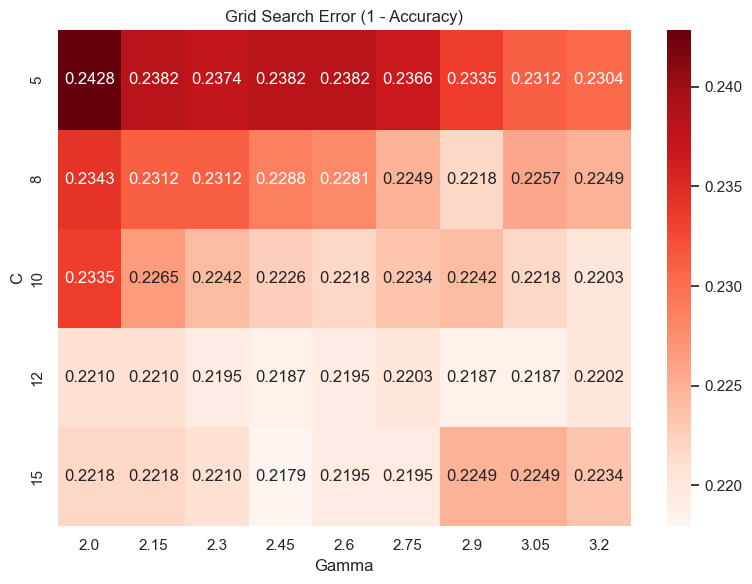

In [587]:
results_df2 = pd.DataFrame(grid_fine.cv_results_)

# Add error to results DataFrame
results_df2["error"] = 1 - results_df2["mean_test_score"]

# Pivot for error plot
heatmap_error = results_df2.pivot(index="param_C", columns="param_gamma", values="error")

# Plot error heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_error, annot=True, fmt=".4f", cmap="Reds")
plt.title("Grid Search Error (1 - Accuracy)")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.tight_layout()
plt.show()

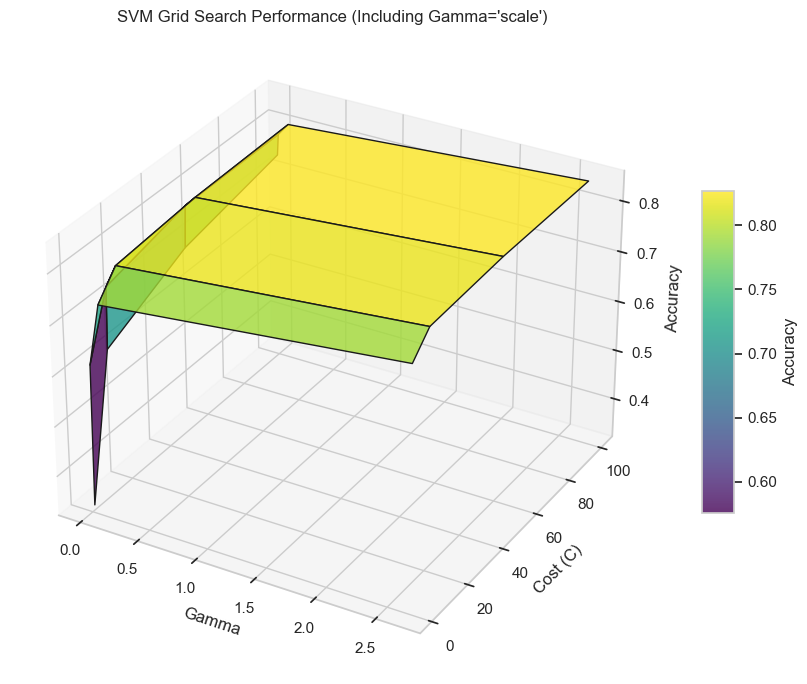

In [589]:
# Pivot to form grid
pivot_table = plot_data.pivot(index="param_C", columns="param_gamma", values="mean_test_score")

# Meshgrid for 3D
X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)
Z = pivot_table.values

# 3D Surface Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)

ax.set_xlabel("Gamma")
ax.set_ylabel("Cost (C)")
ax.set_zlabel("Accuracy")
ax.set_title("SVM Grid Search Performance (Including Gamma='scale')")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Accuracy')
plt.tight_layout()
plt.show()

# **Step 4: Evaluating the model :Robust bootstrapped evaluation using cross-validation to estimate model prediction stability and class probability distributions.**

In [135]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.utils import resample
import pandas as pd
import numpy as np
from tqdm import tqdm

n_iterations = 1000
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Collect all predictions
all_probs = []

# For tracking sample indices
X_test_df = X_test.copy()
X_test_df["True Label"] = y_test.values

for i in tqdm(range(n_iterations), desc="Bootstrapping with CV"):
    # Bootstrap the test set
    X_bs, y_bs = resample(X_test, y_test, replace=True, random_state=42 + i)

    # Predict probabilities using 10-fold cross-val on bootstrapped set
    y_probs_bs = cross_val_predict(
        best_svm_fine,
        X_bs,
        y_bs,
        cv=cv,
        method="predict_proba",
        n_jobs=-1
    )

    # Get predicted class labels
    y_pred_bs = np.argmax(y_probs_bs, axis=1)
    class_labels = best_svm_fine.classes_

    # Create a DataFrame to hold this iteration's probabilities
    prob_df = pd.DataFrame(y_probs_bs, columns=class_labels)
    prob_df["True Label"] = y_bs.reset_index(drop=True)
    prob_df["Iteration"] = i

    all_probs.append(prob_df)

# Combine all iterations
all_boot_probs = pd.concat(all_probs, ignore_index=True)


Bootstrapping with CV: 100%|████████████████| 1000/1000 [00:37<00:00, 26.52it/s]


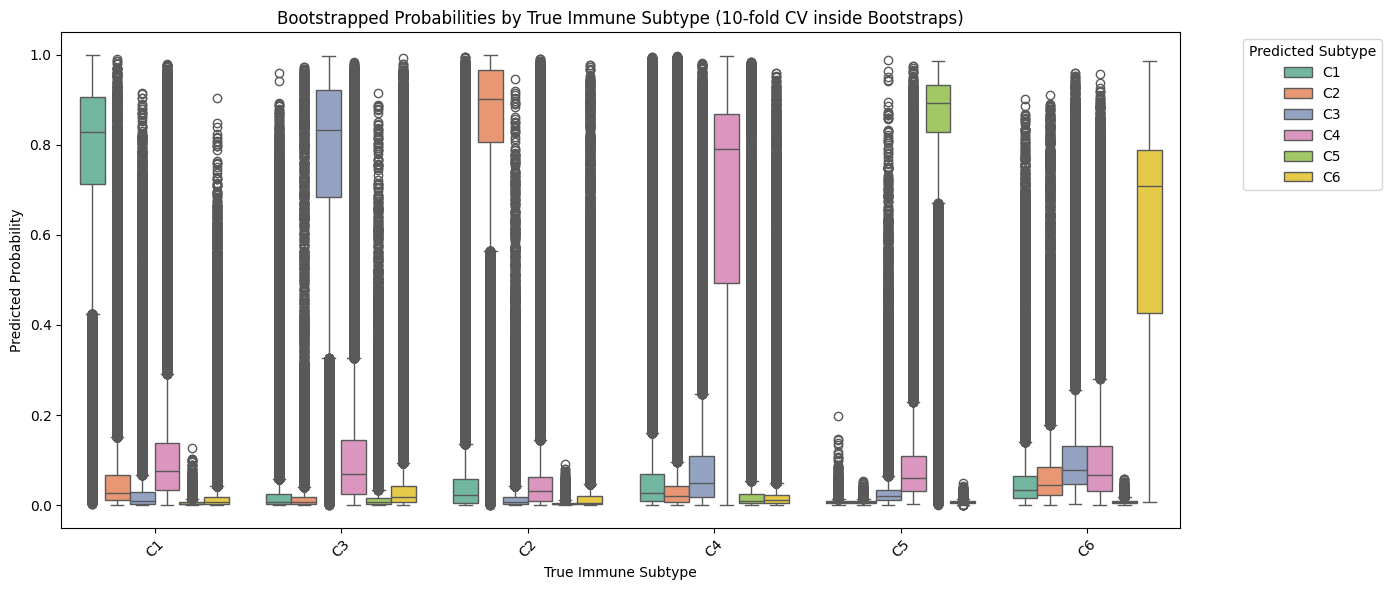

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt for plotting
melted = all_boot_probs.melt(
    id_vars=["True Label", "Iteration"],
    var_name="Predicted Subtype",
    value_name="Probability"
)

# Plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=melted, x="True Label", y="Probability", hue="Predicted Subtype", palette="Set2")
plt.title("Bootstrapped Probabilities by True Immune Subtype (10-fold CV inside Bootstraps)")
plt.xlabel("True Immune Subtype")
plt.ylabel("Predicted Probability")
plt.legend(title="Predicted Subtype", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [91]:
from sklearn.utils import resample
import numpy as np

n_iterations = 1000  # Number of bootstrap samples
boot_acc = []

# Use your fixed best model
for i in range(n_iterations):
    # Sample with replacement from test set
    X_bs, y_bs = resample(X_test, y_test, replace=True, random_state=42 + i)

    # Predict and calculate accuracy
    y_pred_bs = best_svm_fine.predict(X_bs)
    acc = np.mean(y_pred_bs == y_bs)
    boot_acc.append(acc)

# Convert to numpy array
boot_acc = np.array(boot_acc)

# Confidence Interval
mean_acc = np.mean(boot_acc)
lower_bound = np.percentile(boot_acc, 2.5)
upper_bound = np.percentile(boot_acc, 97.5)

# Report
print(f"Bootstrapped Mean Test Accuracy: {mean_acc:.4f}")
print(f"95% Confidence Interval: [{lower_bound:.4f}, {upper_bound:.4f}]")


Bootstrapped Mean Test Accuracy: 0.7983
95% Confidence Interval: [0.7586, 0.8383]


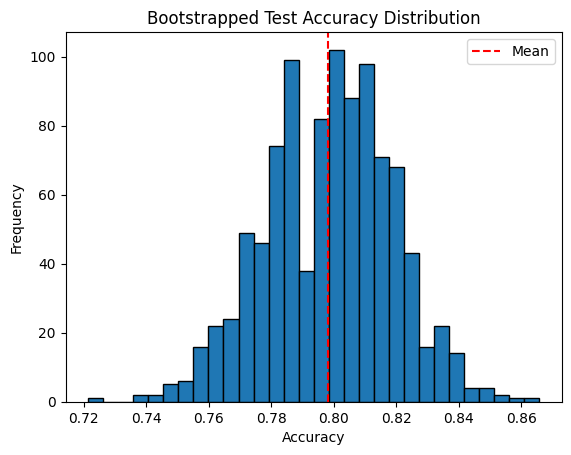

In [93]:
import matplotlib.pyplot as plt

plt.hist(boot_acc, bins=30, edgecolor='k')
plt.title("Bootstrapped Test Accuracy Distribution")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.axvline(mean_acc, color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()


# Inter pretation: Model performs well on average, hitting about 79.83% accuracy on unseen data.
There's some natural variation — in the worst-case samples, it could drop to ~75.86%, and in the best-case, it could go up to ~83.83%.
This ±4% swing is reasonable and suggests that model is fairly stable and generalizes well.

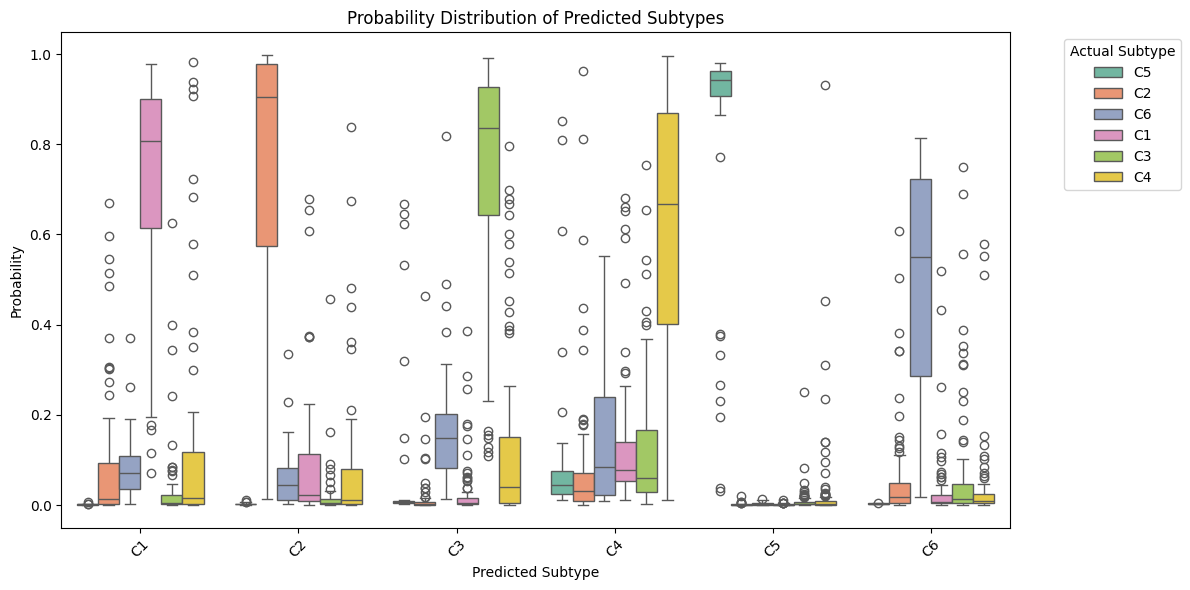

In [97]:
# Predict probabilities
y_prob = best_svm_fine.predict_proba(X_test)

# Convert to DataFrame
prob_df = pd.DataFrame(y_prob, columns=best_svm_fine.classes_, index=X_test.index)

# Add true labels for comparison
prob_df["True Label"] = y_test.values

# Display probabilities
#tools.display_dataframe_to_user(name="Sample Probabilities for Immune Subtypes", dataframe=prob_df)

# Melt for visualization
prob_melted = prob_df.melt(id_vars=["True Label"], var_name="Predicted Subtype", value_name="Probability")

# Plot probability distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=prob_melted, x="Predicted Subtype", y="Probability", hue="True Label", palette="Set2")
plt.xticks(rotation=45)
plt.title("Probability Distribution of Predicted Subtypes")
plt.legend(title="Actual Subtype", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [103]:
# Create a DataFrame for easy comparison
misclassified_df = pd.DataFrame({
    "True Label": y_test.values,
    "Predicted Label": best_svm_fine.predict(X_test)
}, index=X_test.index)

# Filter misclassified samples
misclassified_df = misclassified_df[misclassified_df["True Label"] != misclassified_df["Predicted Label"]]

# Show result
print("Number of misclassified samples:", len(misclassified_df))
misclassified_df.head()


Number of misclassified samples: 81


True Label Predicted Label
TCGA-C8-A132-01A-BRCA-C1         C1              C6
TCGA-HZ-8003-01A-PAAD-C3         C3              C6
TCGA-27-1830-01A-GBM-C4          C4              C5
TCGA-DX-A7ES-01A-SARC-C3         C3              C6
TCGA-D8-A1XV-01A-BRCA-C4         C4              C1

In [111]:
# Get predicted probabilities
y_prob = best_svm_fine.predict_proba(X_test)

# Convert to DataFrame
prob_df = pd.DataFrame(y_prob, columns=best_svm_fine.classes_, index=X_test.index)

# Combine with misclassified info
misclassified_probs = prob_df.loc[misclassified_df.index]  # Select only misclassified
misclassified_full = pd.concat([misclassified_df, misclassified_probs], axis=1)
print(len(misclassified_full))
# Display sample
misclassified_full.head()

81


True Label Predicted Label        C1        C2  \
TCGA-C8-A132-01A-BRCA-C1         C1              C6  0.351071  0.013410   
TCGA-HZ-8003-01A-PAAD-C3         C3              C6  0.014566  0.016600   
TCGA-27-1830-01A-GBM-C4          C4              C5  0.000689  0.001382   
TCGA-DX-A7ES-01A-SARC-C3         C3              C6  0.019773  0.026000   
TCGA-D8-A1XV-01A-BRCA-C4         C4              C1  0.907095  0.007771   

                                C3        C4        C5        C6  
TCGA-C8-A132-01A-BRCA-C1  0.070562  0.045038  0.000802  0.519116  
TCGA-HZ-8003-01A-PAAD-C3  0.382171  0.027619  0.001573  0.557471  
TCGA-27-1830-01A-GBM-C4   0.004399  0.059968  0.931772  0.001789  
TCGA-DX-A7ES-01A-SARC-C3  0.117001  0.144020  0.002867  0.690339  
TCGA-D8-A1XV-01A-BRCA-C4  0.012932  0.034726  0.000277  0.037199

In [115]:
# Add predicted confidence for each misclassified sample
misclassified_full["Predicted Confidence"] = [
    row[pred_label] for row, pred_label in zip(misclassified_full[best_svm_fine.classes_].to_dict(orient="records"), 
                                               misclassified_full["Predicted Label"])
]

misclassified_full

True Label Predicted Label        C1        C2  \
TCGA-C8-A132-01A-BRCA-C1         C1              C6  0.351071  0.013410   
TCGA-HZ-8003-01A-PAAD-C3         C3              C6  0.014566  0.016600   
TCGA-27-1830-01A-GBM-C4          C4              C5  0.000689  0.001382   
TCGA-DX-A7ES-01A-SARC-C3         C3              C6  0.019773  0.026000   
TCGA-D8-A1XV-01A-BRCA-C4         C4              C1  0.907095  0.007771   
...                             ...             ...       ...       ...   
TCGA-FX-A3NJ-01A-SARC-C3         C3              C2  0.084882  0.161996   
TCGA-CV-5443-01A-HNSC-C2         C2              C1  0.669278  0.260457   
TCGA-B6-A0X7-01A-BRCA-C2         C2              C1  0.485595  0.136242   
TCGA-2G-AAFJ-01A-TGCT-C1         C1              C4  0.297008  0.011314   
TCGA-CM-6169-01A-COAD-C2         C2              C6  0.077565  0.496650   

                                C3        C4        C5        C6  \
TCGA-C8-A132-01A-BRCA-C1  0.070562  0.045038  0.000802  0.519116   
TCGA-HZ-8003-01A-PAAD-C3  0.382171  0.027619  0.001573  0.557471   
TCGA-27-1830-01A-GBM-C4   0.004399  0.059968  0.931772  0.001789   
TCGA-DX-A7ES-01A-SARC-C3  0.117001  0.144020  0.002867  0.690339   
TCGA-D8-A1XV-01A-BRCA-C4  0.012932  0.034726  0.000277  0.037199   
...                            ...       ...       ...       ...   
TCGA-FX-A3NJ-01A-SARC-C3  0.231066  0.367513  0.010626  0.143917   
TCGA-CV-5443-01A-HNSC-C2  0.002474  0.052113  0.000569  0.015109   
TCGA-B6-A0X7-01A-BRCA-C2  0.102123  0.178961  0.001853  0.095226   
TCGA-2G-AAFJ-01A-TGCT-C1  0.005373  0.661395  0.000552  0.024359   
TCGA-CM-6169-01A-COAD-C2  0.009446  0.033433  0.000575  0.382332   

                          Predicted Confidence  
TCGA-C8-A132-01A-BRCA-C1              0.519116  
TCGA-HZ-8003-01A-PAAD-C3              0.557471  
TCGA-27-1830-01A-GBM-C4               0.931772  
TCGA-DX-A7ES-01A-SARC-C3              0.690339  
TCGA-D8-A1XV-01A-BRCA-C4              0.907095  
...                                        ...  
TCGA-FX-A3NJ-01A-SARC-C3              0.161996  
TCGA-CV-5443-01A-HNSC-C2              0.669278  
TCGA-B6-A0X7-01A-BRCA-C2              0.485595  
TCGA-2G-AAFJ-01A-TGCT-C1              0.661395  
TCGA-CM-6169-01A-COAD-C2              0.382332  

[81 rows x 9 columns]

# 1. Discordant samples(Problemetic Samples):

**high-confidence misclassifications
The model was very sure, but completely wrong
I will define a confidence threshold, e.g., confidence > 0.7 or 0.8**

# Non-classified samples (uncertain- Non Problemetic Ssmples):

**Model has low confidence in any class
Predicted class score is low or spread out
I will define these as confidence < 0.5**

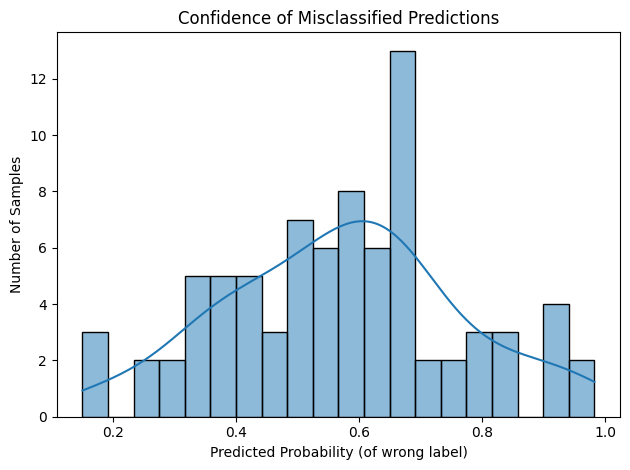

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(misclassified_full["Predicted Confidence"], bins=20, kde=True)
plt.title("Confidence of Misclassified Predictions")
plt.xlabel("Predicted Probability (of wrong label)")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

In [121]:
# thresholds
discordant_threshold = 0.7
uncertain_threshold = 0.5

# Discordant: confident but wrong
discordant_samples = misclassified_full[misclassified_full["Predicted Confidence"] >= discordant_threshold]

# Non-classified: low confidence predictions
uncertain_samples = misclassified_full[misclassified_full["Predicted Confidence"] < uncertain_threshold]

# Count
print(f"Total Misclassified Samples: {len(misclassified_full)}")
print(f"Discordant (High Confidence Errors): {len(discordant_samples)}")
print(f"Uncertain (Low Confidence Predictions): {len(uncertain_samples)}")


Total Misclassified Samples: 81
Discordant (High Confidence Errors): 15
Uncertain (Low Confidence Predictions): 26


# These might be due to overconfident model behavior

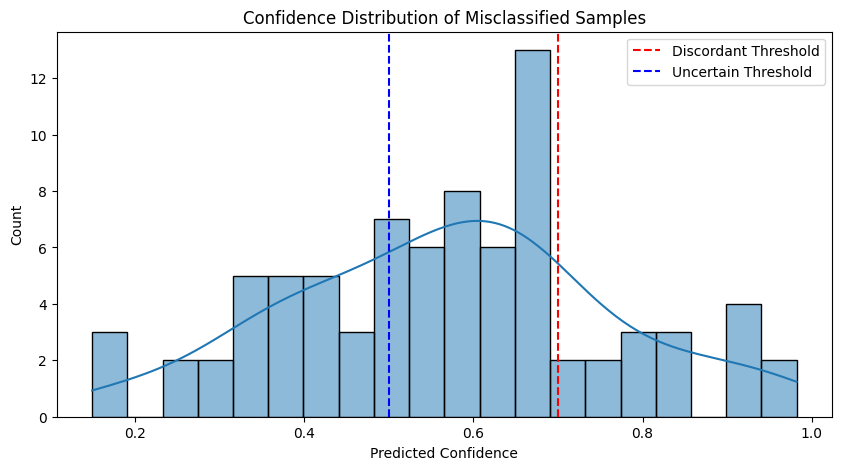

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(misclassified_full["Predicted Confidence"], bins=20, kde=True)
plt.axvline(discordant_threshold, color='red', linestyle='--', label="Discordant Threshold")
plt.axvline(uncertain_threshold, color='blue', linestyle='--', label="Uncertain Threshold")
plt.title("Confidence Distribution of Misclassified Samples")
plt.xlabel("Predicted Confidence")
plt.legend()
plt.show()


# Want to see the Mid Confidence errors

In [131]:
# Define thresholds
discordant_threshold = 0.7
uncertain_threshold = 0.5

# Category splits
discordant_samples = misclassified_full[misclassified_full["Predicted Confidence"] >= discordant_threshold]
uncertain_samples = misclassified_full[misclassified_full["Predicted Confidence"] < uncertain_threshold]
ambiguous_samples = misclassified_full[
    (misclassified_full["Predicted Confidence"] >= uncertain_threshold) &
    (misclassified_full["Predicted Confidence"] < discordant_threshold)
]

# Count and display
print(f"Total Misclassified Samples: {len(misclassified_full)}")
print(f"Discordant (High Confidence Errors): {len(discordant_samples)}")
print(f"Uncertain (Low Confidence Predictions): {len(uncertain_samples)}")
print(f"Ambiguous (Mid Confidence Errors): {len(ambiguous_samples)}")


Total Misclassified Samples: 81
Discordant (High Confidence Errors): 15
Uncertain (Low Confidence Predictions): 26
Ambiguous (Mid Confidence Errors): 40


#  Ambiguous Misclassifications
**The model is not very confident, but also not totally uncertain
These are typically borderline decisions and worth a separate category**

# Trying Random Froest with initial/reasonable parameters.

In [216]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,         # More trees for better stability
    max_depth=None,           # Let trees grow fully 
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced', 
    random_state=42,
    n_jobs=-1               
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [218]:
from sklearn.metrics import accuracy_score, classification_report

# Predict and evaluate
for name, model in [("Random Forest", rf_model)]:
    print(f"\n=== {name} ===")
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
    print("Classification Report (Validation):")
    print(classification_report(y_val, y_val_pred))

    print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print("Classification Report (Test):")
    print(classification_report(y_test, y_test_pred))



=== Random Forest ===
Validation Accuracy: 0.7950
Classification Report (Validation):
              precision    recall  f1-score   support

          C1       0.86      0.81      0.83        62
          C2       0.80      0.89      0.84        66
          C3       0.74      0.80      0.77        61
          C4       0.72      0.76      0.74        74
          C5       1.00      0.84      0.91        37
          C6       0.73      0.50      0.59        22

    accuracy                           0.80       322
   macro avg       0.81      0.77      0.78       322
weighted avg       0.80      0.80      0.79       322

Test Accuracy: 0.8085
Classification Report (Test):
              precision    recall  f1-score   support

          C1       0.78      0.79      0.79        77
          C2       0.83      0.92      0.87        83
          C3       0.78      0.84      0.81        77
          C4       0.79      0.73      0.76        92
          C5       0.98      0.89      0.93    

**The Random Forest classifier achieved strong and consistent results, with a validation accuracy of 79.5% and test accuracy of 80.85%. It performed particularly well on C1, C2, and C5, showing high precision and recall. C3 and C4 showed moderate overlap, with F1-scores around 0.76–0.81. Class C6, while improved compared to earlier models, remained the most challenging with lower recall (0.50–0.56), indicating some misclassification into neighboring classes. Overall, the model generalizes well with balanced performance across most classes.**

<Figure size 800x600 with 0 Axes>

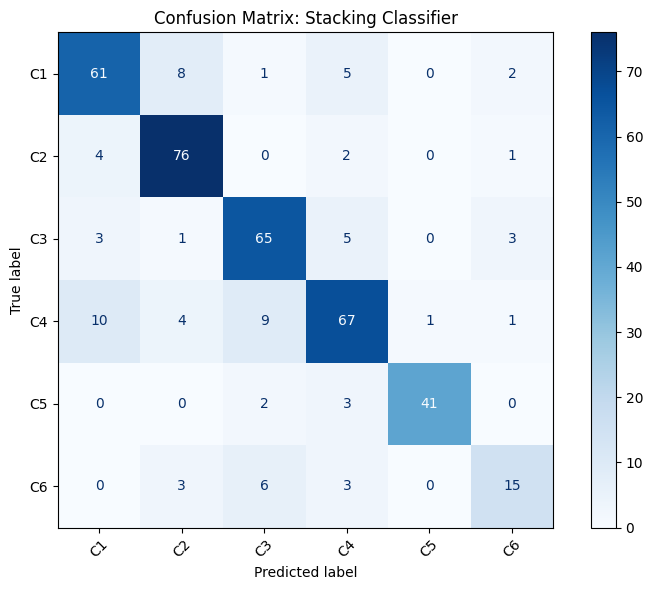

In [483]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using your stacking model
y_pred = rf_model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=stack_model.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Confusion Matrix: Stacking Classifier")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**This confusion matrix shows the performance of a Random Forest Classifier in classifying six immune subtypes (C1–C6). Diagonal values represent correct predictions, with the highest accuracy observed for C2 and C4. Some confusion exists between neighboring subtypes, especially C1 vs C2 and C4 vs C1. Overall, the model shows strong performance but struggles with minority class C6. Did well on C5**

# Trying to do hyper parameter tuning

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.33],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits

[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=201; total time=   0.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=201; total time=   0.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_s

In [149]:

y_val_pred = grid_search.predict(X_val)
y_test_pred = grid_search.predict(X_test)

print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print("Classification Report (Validation):")
print(classification_report(y_val, y_val_pred))

print(f"\nTest Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 0.8012
Classification Report (Validation):
              precision    recall  f1-score   support

          C1       0.86      0.79      0.82        62
          C2       0.81      0.91      0.86        66
          C3       0.76      0.82      0.79        61
          C4       0.74      0.72      0.73        74
          C5       0.97      0.86      0.91        37
          C6       0.70      0.64      0.67        22

    accuracy                           0.80       322
   macro avg       0.81      0.79      0.80       322
weighted avg       0.80      0.80      0.80       322


Test Accuracy: 0.7935
Classification Report (Test):
              precision    recall  f1-score   support

          C1       0.78      0.77      0.77        77
          C2       0.81      0.87      0.84        83
          C3       0.75      0.83      0.79        77
          C4       0.81      0.71      0.76        92
          C5       0.98      0.87      0.92        46
          C6   

**Results are almost similar to previous one.**

# Trying XGBoost to get more improved accuracy. 

In [179]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Now y is integers [0, 1, 2, ..., 5]

#  Use the same encoder on the splits
y_train_encoded = le.transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)

# Cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=42
)

cv_scores = cross_val_score(xgb_model, X, y_encoded, cv=cv, scoring='accuracy')
print(f"10-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

#  Train on training data
xgb_model.fit(X_train, y_train_encoded)

#  Evaluate on validation set
val_preds = xgb_model.predict(X_val)
val_acc = accuracy_score(y_val_encoded, val_preds)
print(f"\n Validation Accuracy: {val_acc:.4f}")
print("Validation Classification Report:")
print(classification_report(y_val_encoded, val_preds, target_names=le.classes_))

#  Evaluate on test set
test_preds = xgb_model.predict(X_test)
test_acc = accuracy_score(y_test_encoded, test_preds)
print(f"\n Test Accuracy: {test_acc:.4f}")
print("Test Classification Report:")
print(classification_report(y_test_encoded, test_preds, target_names=le.classes_))


📊 10-Fold CV Accuracy: 0.7815 ± 0.0228

✅ Validation Accuracy: 0.7733
Validation Classification Report:
              precision    recall  f1-score   support

          C1       0.80      0.84      0.82        62
          C2       0.81      0.83      0.82        66
          C3       0.73      0.79      0.76        61
          C4       0.69      0.68      0.68        74
          C5       0.94      0.84      0.89        37
          C6       0.72      0.59      0.65        22

    accuracy                           0.77       322
   macro avg       0.78      0.76      0.77       322
weighted avg       0.77      0.77      0.77       322


✅ Test Accuracy: 0.7985
Test Classification Report:
              precision    recall  f1-score   support

          C1       0.77      0.78      0.77        77
          C2       0.87      0.89      0.88        83
          C3       0.76      0.86      0.80        77
          C4       0.79      0.72      0.75        92
          C5       0.95      

**Got similar results as of randomforest**

# Hyper parameter tunning of XGBoost

In [187]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier


#  Encode labels
le = LabelEncoder()
le.fit(y)  # Fit on full target set

# Transform splits
y_train_encoded = le.transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)

#Cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Parameter grid
param_dist = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [4, 5, 6, 7],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

#  XGBoost model
xgb = XGBClassifier(
    eval_metric='mlogloss',
    random_state=42
)

# : Randomized Search
search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

#  Fit on training data
search.fit(X_train, y_train_encoded)

#   Print best parameters
print("Best Parameters Found:")
print(search.best_params_)



Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best Parameters Found:
{'subsample': 0.8, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.6}


In [189]:
# 🔎 Evaluate on validation set
val_preds = search.predict(X_val)
val_acc = accuracy_score(y_val_encoded, val_preds)
print(f"\n Validation Accuracy: {val_acc:.4f}")
print("Validation Classification Report:")
print(classification_report(y_val_encoded, val_preds, target_names=le.classes_))

# 🧪 Evaluate on test set
test_preds = search.predict(X_test)
test_acc = accuracy_score(y_test_encoded, test_preds)
print(f"\n Test Accuracy: {test_acc:.4f}")
print("Test Classification Report:")
print(classification_report(y_test_encoded, test_preds, target_names=le.classes_))


✅ Validation Accuracy: 0.7888
Validation Classification Report:
              precision    recall  f1-score   support

          C1       0.83      0.87      0.85        62
          C2       0.83      0.88      0.85        66
          C3       0.75      0.80      0.78        61
          C4       0.71      0.70      0.71        74
          C5       0.91      0.81      0.86        37
          C6       0.69      0.50      0.58        22

    accuracy                           0.79       322
   macro avg       0.79      0.76      0.77       322
weighted avg       0.79      0.79      0.79       322


✅ Test Accuracy: 0.7786
Test Classification Report:
              precision    recall  f1-score   support

          C1       0.75      0.77      0.76        77
          C2       0.88      0.86      0.87        83
          C3       0.73      0.83      0.78        77
          C4       0.76      0.74      0.75        92
          C5       0.95      0.83      0.88        46
          C6  

**Performance of model decreased**

# Trying ensemble model

In [220]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('svm', best_svm),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    voting='soft',  # use probabilities
    n_jobs=-1
)

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Ensemble Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Ensemble Test Accuracy: 0.8134328358208955
              precision    recall  f1-score   support

          C1       0.79      0.86      0.82        77
          C2       0.88      0.89      0.89        83
          C3       0.77      0.86      0.81        77
          C4       0.80      0.73      0.76        92
          C5       0.97      0.83      0.89        46
          C6       0.64      0.59      0.62        27

    accuracy                           0.81       402
   macro avg       0.81      0.79      0.80       402
weighted avg       0.82      0.81      0.81       402



**The soft voting ensemble, combining SVM, Random Forest, and XGBoost, achieved a test accuracy of 81.34%, outperforming all individual models. It demonstrated strong precision and recall for dominant classes like C1, C2, and C5, with F1-scores above 0.82. C3 and C4 also saw improved recall compared to individual models, reflecting better generalization. While C6 remained the most difficult class (F1 = 0.62), the ensemble slightly improved its performance. Overall, the ensemble effectively leveraged the strengths of all three classifiers, leading to more balanced and robust predictions.**

# Applying Stacking Model by using SVM, Random Forest and XGBoost as base learners and logistic regression as meta model

In [222]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [248]:
# Assume: best_svm, best_rf, best_xgb are your tuned models
base_learners = [
    ('svm', best_svm),
    ('rf', rf_model),
    ('xgb', xgb_model)
]

# Meta model: Logistic Regression
meta_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Stacking Classifier
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=10,
    n_jobs=-1,
    passthrough=False  # set True if you want to include original features too
)
stack_model.fit(X_train, y_train)

y_pred = stack_model.predict(X_test)

print("Stacking Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Stacking Accuracy: 0.818407960199005
              precision    recall  f1-score   support

          C1       0.81      0.84      0.83        77
          C2       0.89      0.84      0.86        83
          C3       0.80      0.83      0.82        77
          C4       0.80      0.74      0.77        92
          C5       0.97      0.83      0.89        46
          C6       0.62      0.89      0.73        27

    accuracy                           0.82       402
   macro avg       0.81      0.83      0.82       402
weighted avg       0.83      0.82      0.82       402



# Key Highlights from Classification Report

**C1, C2, C3: Strong balanced performance (F1 scores ~0.83–0.86)
C5: High precision (0.97), slight drop in recall (0.83)
C6: Huge boost in recall → 0.89, despite lower precision → this is crucial if C6 is a minority or critical class
That increase in recall for C6 means stacking helped capture a class that the others likely missed more often — powerful argument in favor of using it.**

**A stacking classifier combining the three best-performing models (SVM, Random Forest, and XGBoost) with logistic regression as a meta-learner was implemented. The stacked model achieved the highest test accuracy of 81.84%, surpassing individual classifiers and the soft voting ensemble. Notably, stacking improved the recall of class C6 to 0.89, indicating enhanced sensitivity to minority or challenging classes. This demonstrates that stacking successfully leveraged the complementary strengths of the base models.”**



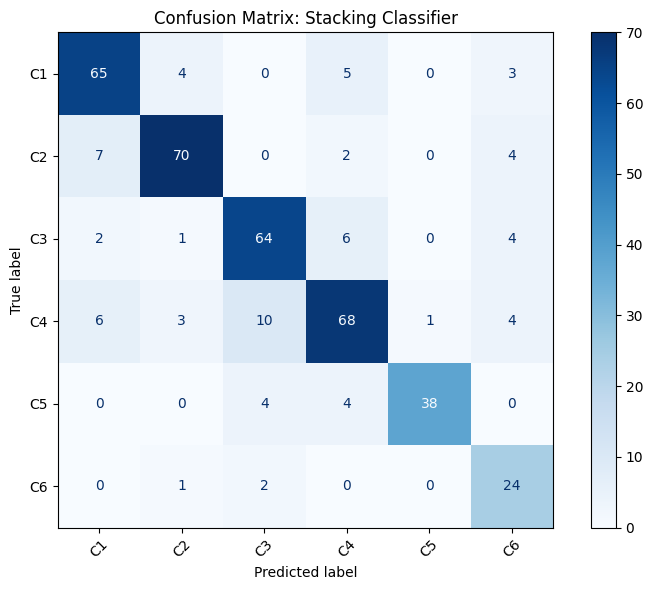

In [252]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using your stacking model
y_pred = stack_model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=stack_model.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Confusion Matrix: Stacking Classifier")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# The confusion matrix summarizes the classification performance of the stacking model across six target classes (C1 to C6) on the test set.

**Overall Accuracy: 81.84%**

# Insights:

**The model demonstrates strong classification capability across all six classes, with most samples correctly classified (diagonal dominance). Notably, classes C1, C2, and C3 exhibit very few misclassifications, indicating high model precision and recall. Class C4 shows more widespread confusion, particularly with C3 and C1, which may reflect feature overlap in the reduced NMF space. The model performs particularly well on C6, achieving high recall (24/27 correct), demonstrating stacking’s benefit in capturing underrepresented or complex subtypes.**

In [258]:
# Create a DataFrame for easy comparison
misclassified_df_Stack = pd.DataFrame({
    "True Label": y_test.values,
    "Predicted Label": stack_model.predict(X_test)
}, index=X_test.index)

# Filter misclassified samples
misclassified_df_Stack = misclassified_df_Stack[misclassified_df_Stack["True Label"] != misclassified_df_Stack["Predicted Label"]]

In [260]:
# Get predicted probabilities
y_prob = stack_model.predict_proba(X_test)

# Convert to DataFrame
prob_df = pd.DataFrame(y_prob, columns=stack_model.classes_, index=X_test.index)

# Combine with misclassified info
misclassified_probs = prob_df.loc[misclassified_df_Stack.index]  # Select only misclassified
misclassified_full = pd.concat([misclassified_df_Stack, misclassified_probs], axis=1)
print(len(misclassified_full))
# Display sample
misclassified_full.head()

73


True Label Predicted Label        C1        C2  \
TCGA-C8-A132-01A-BRCA-C1         C1              C6  0.112640  0.013376   
TCGA-HZ-8003-01A-PAAD-C3         C3              C6  0.019637  0.006745   
TCGA-27-1830-01A-GBM-C4          C4              C5  0.001250  0.001067   
TCGA-55-7727-01A-LUAD-C2         C2              C6  0.075591  0.185359   
TCGA-DX-A7ES-01A-SARC-C3         C3              C6  0.019070  0.006792   

                                C3        C4        C5        C6  
TCGA-C8-A132-01A-BRCA-C1  0.055679  0.017614  0.002576  0.798116  
TCGA-HZ-8003-01A-PAAD-C3  0.111168  0.008520  0.003669  0.850261  
TCGA-27-1830-01A-GBM-C4   0.001295  0.015296  0.979869  0.001223  
TCGA-55-7727-01A-LUAD-C2  0.125479  0.122670  0.025706  0.465194  
TCGA-DX-A7ES-01A-SARC-C3  0.050763  0.010689  0.002179  0.910508

In [262]:
# Add predicted confidence for each misclassified sample
misclassified_full["Predicted Confidence"] = [
    row[pred_label] for row, pred_label in zip(misclassified_full[stack_model.classes_].to_dict(orient="records"), 
                                               misclassified_full["Predicted Label"])
]

misclassified_full

True Label Predicted Label        C1        C2  \
TCGA-C8-A132-01A-BRCA-C1         C1              C6  0.112640  0.013376   
TCGA-HZ-8003-01A-PAAD-C3         C3              C6  0.019637  0.006745   
TCGA-27-1830-01A-GBM-C4          C4              C5  0.001250  0.001067   
TCGA-55-7727-01A-LUAD-C2         C2              C6  0.075591  0.185359   
TCGA-DX-A7ES-01A-SARC-C3         C3              C6  0.019070  0.006792   
...                             ...             ...       ...       ...   
TCGA-XR-A8TC-01A-LIHC-C4         C4              C3  0.023097  0.009130   
TCGA-D1-A1O5-01A-UCEC-C1         C1              C4  0.079722  0.025448   
TCGA-FX-A3NJ-01A-SARC-C3         C3              C4  0.070995  0.067471   
TCGA-CV-5443-01A-HNSC-C2         C2              C1  0.644340  0.132053   
TCGA-B6-A0X7-01A-BRCA-C2         C2              C1  0.491217  0.084214   

                                C3        C4        C5        C6  \
TCGA-C8-A132-01A-BRCA-C1  0.055679  0.017614  0.002576  0.798116   
TCGA-HZ-8003-01A-PAAD-C3  0.111168  0.008520  0.003669  0.850261   
TCGA-27-1830-01A-GBM-C4   0.001295  0.015296  0.979869  0.001223   
TCGA-55-7727-01A-LUAD-C2  0.125479  0.122670  0.025706  0.465194   
TCGA-DX-A7ES-01A-SARC-C3  0.050763  0.010689  0.002179  0.910508   
...                            ...       ...       ...       ...   
TCGA-XR-A8TC-01A-LIHC-C4  0.681771  0.156784  0.022143  0.107075   
TCGA-D1-A1O5-01A-UCEC-C1  0.136647  0.652957  0.012322  0.092904   
TCGA-FX-A3NJ-01A-SARC-C3  0.179507  0.401798  0.045099  0.235130   
TCGA-CV-5443-01A-HNSC-C2  0.010595  0.056786  0.001762  0.154464   
TCGA-B6-A0X7-01A-BRCA-C2  0.066755  0.163558  0.007256  0.187000   

                          Predicted Confidence  
TCGA-C8-A132-01A-BRCA-C1              0.798116  
TCGA-HZ-8003-01A-PAAD-C3              0.850261  
TCGA-27-1830-01A-GBM-C4               0.979869  
TCGA-55-7727-01A-LUAD-C2              0.465194  
TCGA-DX-A7ES-01A-SARC-C3              0.910508  
...                                        ...  
TCGA-XR-A8TC-01A-LIHC-C4              0.681771  
TCGA-D1-A1O5-01A-UCEC-C1              0.652957  
TCGA-FX-A3NJ-01A-SARC-C3              0.401798  
TCGA-CV-5443-01A-HNSC-C2              0.644340  
TCGA-B6-A0X7-01A-BRCA-C2              0.491217  

[73 rows x 9 columns]

In [264]:
#thresholds
discordant_threshold = 0.7
uncertain_threshold = 0.5

# Category splits
discordant_samples = misclassified_full[misclassified_full["Predicted Confidence"] >= discordant_threshold]
uncertain_samples = misclassified_full[misclassified_full["Predicted Confidence"] < uncertain_threshold]
ambiguous_samples = misclassified_full[
    (misclassified_full["Predicted Confidence"] >= uncertain_threshold) &
    (misclassified_full["Predicted Confidence"] < discordant_threshold)
]

# Count and display
print(f"Total Misclassified Samples: {len(misclassified_full)}")
print(f"Discordant (High Confidence Errors): {len(discordant_samples)}")
print(f"Uncertain (Low Confidence Predictions): {len(uncertain_samples)}")
print(f"Ambiguous (Mid Confidence Errors): {len(ambiguous_samples)}")

Total Misclassified Samples: 73
Discordant (High Confidence Errors): 24
Uncertain (Low Confidence Predictions): 25
Ambiguous (Mid Confidence Errors): 24


In [299]:
print(" Discordant Samples (High Confidence Errors)")
discordant_samples  # or use .to_csv() to save


 Discordant Samples (High Confidence Errors)


True Label Predicted Label        C1        C2  \
TCGA-C8-A132-01A-BRCA-C1         C1              C6  0.112640  0.013376   
TCGA-HZ-8003-01A-PAAD-C3         C3              C6  0.019637  0.006745   
TCGA-27-1830-01A-GBM-C4          C4              C5  0.001250  0.001067   
TCGA-DX-A7ES-01A-SARC-C3         C3              C6  0.019070  0.006792   
TCGA-D8-A1XV-01A-BRCA-C4         C4              C1  0.936482  0.010679   
TCGA-55-6971-01A-LUAD-C3         C3              C6  0.013380  0.006129   
TCGA-S9-A89Z-01A-LGG-C4          C4              C3  0.011784  0.005759   
TCGA-FV-A496-01A-LIHC-C3         C3              C4  0.032171  0.019224   
TCGA-AX-A2IO-01A-UCEC-C1         C1              C2  0.121782  0.760341   
TCGA-BG-A0RY-01A-UCEC-C4         C4              C6  0.036159  0.016917   
TCGA-24-1616-01A-OV-C4           C4              C1  0.949665  0.009268   
TCGA-AR-A1AS-01A-BRCA-C4         C4              C1  0.942225  0.009574   
TCGA-KN-8419-01A-KICH-C4         C4              C1  0.800493  0.033742   
TCGA-DD-AADW-01A-LIHC-C1         C1              C4  0.041184  0.028738   
TCGA-OR-A5L3-01A-ACC-C5          C5              C4  0.020287  0.019003   
TCGA-QR-A70V-01A-PCPG-C5         C5              C4  0.022971  0.019043   
TCGA-AO-A0JI-01A-BRCA-C4         C4              C2  0.026316  0.830855   
TCGA-3K-AAZ8-01A-LIHC-C4         C4              C1  0.784759  0.028845   
TCGA-V1-A8WW-01A-PRAD-C2         C2              C4  0.025315  0.052228   
TCGA-B0-4699-01A-KIRC-C2         C2              C6  0.042664  0.056183   
TCGA-DD-A4NF-01A-LIHC-C4         C4              C3  0.024803  0.006857   
TCGA-AZ-4323-01A-COAD-C1         C1              C2  0.085645  0.812046   
TCGA-DM-A288-01A-COAD-C4         C4              C1  0.952843  0.008355   
TCGA-73-4659-01A-LUAD-C4         C4              C6  0.033973  0.014511   

                                C3        C4        C5        C6  \
TCGA-C8-A132-01A-BRCA-C1  0.055679  0.017614  0.002576  0.798116   
TCGA-HZ-8003-01A-PAAD-C3  0.111168  0.008520  0.003669  0.850261   
TCGA-27-1830-01A-GBM-C4   0.001295  0.015296  0.979869  0.001223   
TCGA-DX-A7ES-01A-SARC-C3  0.050763  0.010689  0.002179  0.910508   
TCGA-D8-A1XV-01A-BRCA-C4  0.007947  0.025068  0.000536  0.019289   
TCGA-55-6971-01A-LUAD-C3  0.054590  0.015225  0.002321  0.908355   
TCGA-S9-A89Z-01A-LGG-C4   0.787715  0.094765  0.024503  0.075474   
TCGA-FV-A496-01A-LIHC-C3  0.150401  0.713578  0.029547  0.055077   
TCGA-AX-A2IO-01A-UCEC-C1  0.004882  0.083860  0.002280  0.026856   
TCGA-BG-A0RY-01A-UCEC-C4  0.069465  0.023737  0.004201  0.849522   
TCGA-24-1616-01A-OV-C4    0.005374  0.023666  0.000417  0.011609   
TCGA-AR-A1AS-01A-BRCA-C4  0.009119  0.022017  0.000567  0.016497   
TCGA-KN-8419-01A-KICH-C4  0.016215  0.082636  0.001701  0.065213   
TCGA-DD-AADW-01A-LIHC-C1  0.094529  0.755645  0.038788  0.041116   
TCGA-OR-A5L3-01A-ACC-C5   0.063689  0.828578  0.043146  0.025296   
TCGA-QR-A70V-01A-PCPG-C5  0.074830  0.808296  0.044022  0.030839   
TCGA-AO-A0JI-01A-BRCA-C4  0.003556  0.109089  0.004311  0.025873   
TCGA-3K-AAZ8-01A-LIHC-C4  0.021960  0.124622  0.002267  0.037547   
TCGA-V1-A8WW-01A-PRAD-C2  0.034067  0.829488  0.019332  0.039570   
TCGA-B0-4699-01A-KIRC-C2  0.013840  0.024432  0.002217  0.860664   
TCGA-DD-A4NF-01A-LIHC-C4  0.779866  0.088190  0.023708  0.076576   
TCGA-AZ-4323-01A-COAD-C1  0.003378  0.049835  0.001574  0.047521   
TCGA-DM-A288-01A-COAD-C4  0.005445  0.021995  0.000350  0.011013   
TCGA-73-4659-01A-LUAD-C4  0.096054  0.067163  0.006610  0.781689   

                          Predicted Confidence  
TCGA-C8-A132-01A-BRCA-C1              0.798116  
TCGA-HZ-8003-01A-PAAD-C3              0.850261  
TCGA-27-1830-01A-GBM-C4               0.979869  
TCGA-DX-A7ES-01A-SARC-C3              0.910508  
TCGA-D8-A1XV-01A-BRCA-C4              0.936482  
TCGA-55-6971-01A-LUAD-C3              0.908355  
TCGA-S9-A89Z-01A-LGG-C4               0.787715  
TCGA-FV-A496-01A-LIHC-C3              0.713578  
TCGA-AX

In [301]:
uncertain_samples

True Label Predicted Label        C1        C2  \
TCGA-55-7727-01A-LUAD-C2         C2              C6  0.075591  0.185359   
TCGA-BC-4073-01B-LIHC-C2         C2              C6  0.120212  0.264839   
TCGA-FD-A5BX-01A-BLCA-C4         C4              C6  0.173453  0.057633   
TCGA-BP-4338-01A-KIRC-C3         C3              C4  0.027635  0.030371   
TCGA-AK-3443-01A-KIRC-C5         C5              C3  0.022584  0.012473   
TCGA-DX-A3LW-01A-SARC-C1         C1              C6  0.273299  0.038838   
TCGA-ZJ-AAXA-01A-CESC-C1         C1              C2  0.447388  0.456657   
TCGA-BH-A2L8-01A-BRCA-C2         C2              C1  0.438180  0.324166   
TCGA-KL-8330-01A-KICH-C5         C5              C3  0.013437  0.009382   
TCGA-KL-8325-01A-KICH-C5         C5              C3  0.022464  0.011749   
TCGA-5P-A9JZ-01A-KIRP-C4         C4              C3  0.019200  0.014999   
TCGA-A2-A25B-01A-BRCA-C2         C2              C1  0.380231  0.078365   
TCGA-KM-8439-01A-KICH-C4         C4              C3  0.028181  0.017406   
TCGA-CM-5348-01A-COAD-C6         C6              C3  0.072359  0.013210   
TCGA-G7-A8LD-01A-KIRP-C3         C3              C4  0.282396  0.039692   
TCGA-G3-AAV7-01A-LIHC-C4         C4              C3  0.017626  0.013281   
TCGA-HF-A5NB-01A-STAD-C2         C2              C1  0.425624  0.250718   
TCGA-AX-A05Y-01A-UCEC-C4         C4              C2  0.318892  0.441945   
TCGA-A2-A0CR-01A-BRCA-C6         C6              C2  0.159506  0.441405   
TCGA-UD-AAC1-01A-MESO-C1         C1              C4  0.068789  0.031822   
TCGA-CC-A9FV-01A-LIHC-C3         C3              C4  0.026512  0.033712   
TCGA-TT-A6YN-01A-PCPG-C5         C5              C4  0.021531  0.021373   
TCGA-BR-8365-01A-STAD-C3         C3              C6  0.015534  0.005182   
TCGA-FX-A3NJ-01A-SARC-C3         C3              C4  0.070995  0.067471   
TCGA-B6-A0X7-01A-BRCA-C2         C2              C1  0.491217  0.084214   

                                C3        C4        C5        C6  \
TCGA-55-7727-01A-LUAD-C2  0.125479  0.122670  0.025706  0.465194   
TCGA-BC-4073-01B-LIHC-C2  0.066362  0.145713  0.009204  0.393669   
TCGA-FD-A5BX-01A-BLCA-C4  0.128978  0.304854  0.015094  0.319987   
TCGA-BP-4338-01A-KIRC-C3  0.344701  0.436884  0.071297  0.089112   
TCGA-AK-3443-01A-KIRC-C5  0.436113  0.236276  0.223829  0.068725   
TCGA-DX-A3LW-01A-SARC-C1  0.149329  0.210553  0.008615  0.319366   
TCGA-ZJ-AAXA-01A-CESC-C1  0.004552  0.054634  0.001616  0.035153   
TCGA-BH-A2L8-01A-BRCA-C2  0.015255  0.066465  0.003154  0.152780   
TCGA-KL-8330-01A-KICH-C5  0.418778  0.135842  0.383518  0.039043   
TCGA-KL-8325-01A-KICH-C5  0.408945  0.222552  0.264853  0.069437   
TCGA-5P-A9JZ-01A-KIRP-C4  0.480206  0.363255  0.065464  0.056876   
TCGA-A2-A25B-01A-BRCA-C2  0.057503  0.317955  0.004792  0.161154   
TCGA-KM-8439-01A-KICH-C4  0.328096  0.310243  0.243080  0.072993   
TCGA-CM-5348-01A-COAD-C6  0.453348  0.061750  0.011601  0.387731   
TCGA-G7-A8LD-01A-KIRP-C3  0.124924  0.458544  0.008981  0.085463   
TCGA-G3-AAV7-01A-LIHC-C4  0.477724  0.273178  0.166169  0.052022   
TCGA-HF-A5NB-01A-STAD-C2  0.024802  0.170408  0.002906  0.125542   
TCGA-AX-A05Y-01A-UCEC-C4  0.014368  0.136106  0.003938  0.084750   
TCGA-A2-A0CR-01A-BRCA-C6  0.077812  0.195855  0.009214  0.116209   
TCGA-UD-AAC1-01A-MESO-C1  0.282969  0.374612  0.042767  0.199041   
TCGA-CC-A9FV-01A-LIHC-C3  0.288744  0.414008  0.090117  0.146907   
TCGA-TT-A6YN-01A-PCPG-C5  0.243115  0.420003  0.242381  0.051597   
TCGA-BR-8365-01A-STAD-C3  0.469701  0.028131  0.011274  0.470178   
TCGA-FX-A3NJ-01A-SARC-C3  0.179507  0.401798  0.045099  0.235130   
TCGA-B6-A0X7-01A-BRCA-C2  0.066755  0.163558  0.007256  0.187000   

                          Predicted Confidence  
TCGA-55-7727-01A-LUAD-C2              0.465194  
TCGA-BC-4073-01B-LIHC-C2              0.393669  
TCGA-FD-A5BX-01A-BLCA-C4              0.319987  
TCGA-BP-4338-01A-KIRC-C3              0.436884  
TCGA-AK-3443-01A-KIRC-C5              0.436113  
TCGA-DX-A3L

In [303]:
ambiguous_samples

True Label Predicted Label        C1        C2  \
TCGA-HC-A4ZV-01A-PRAD-C3         C3              C1  0.517102  0.028062   
TCGA-BQ-7058-01A-KIRP-C3         C3              C4  0.023244  0.020075   
TCGA-BR-8058-01A-STAD-C2         C2              C6  0.069327  0.368283   
TCGA-IB-A5SO-01A-PAAD-C2         C2              C1  0.525855  0.116001   
TCGA-BH-A1FM-01A-BRCA-C4         C4              C3  0.021018  0.010126   
TCGA-DU-A7TA-01A-LGG-C5          C5              C4  0.018706  0.017501   
TCGA-KN-8437-01A-KICH-C5         C5              C3  0.020096  0.011055   
TCGA-66-2795-01A-LUSC-C1         C1              C2  0.182956  0.629965   
TCGA-EW-A1J3-01A-BRCA-C1         C1              C4  0.110081  0.049340   
TCGA-D9-A4Z3-01A-SKCM-C4         C4              C2  0.033767  0.512341   
TCGA-DX-A6BB-01A-SARC-C4         C4              C3  0.019357  0.008260   
TCGA-EB-A6QZ-01A-SKCM-C4         C4              C6  0.055185  0.031330   
TCGA-BS-A0V7-01A-UCEC-C6         C6              C3  0.039221  0.020187   
TCGA-BF-AAOU-01A-SKCM-C1         C1              C4  0.145764  0.041194   
TCGA-91-8496-01A-LUAD-C4         C4              C3  0.017549  0.015519   
TCGA-CC-A7IJ-01A-LIHC-C2         C2              C4  0.109702  0.129508   
TCGA-E2-A15R-01A-BRCA-C3         C3              C1  0.599853  0.032269   
TCGA-FB-AAQ0-01A-PAAD-C2         C2              C1  0.554423  0.212796   
TCGA-55-6970-01A-LUAD-C3         C3              C2  0.072396  0.548467   
TCGA-F1-A448-01A-STAD-C1         C1              C6  0.219942  0.034851   
TCGA-HE-A5NF-01A-KIRP-C4         C4              C3  0.012469  0.011396   
TCGA-XR-A8TC-01A-LIHC-C4         C4              C3  0.023097  0.009130   
TCGA-D1-A1O5-01A-UCEC-C1         C1              C4  0.079722  0.025448   
TCGA-CV-5443-01A-HNSC-C2         C2              C1  0.644340  0.132053   

                                C3        C4        C5        C6  \
TCGA-HC-A4ZV-01A-PRAD-C3  0.152422  0.167848  0.011216  0.123351   
TCGA-BQ-7058-01A-KIRP-C3  0.175635  0.679397  0.050805  0.050845   
TCGA-BR-8058-01A-STAD-C2  0.013176  0.045478  0.002939  0.500797   
TCGA-IB-A5SO-01A-PAAD-C2  0.021728  0.051940  0.003121  0.281354   
TCGA-BH-A1FM-01A-BRCA-C4  0.614124  0.224374  0.049470  0.080889   
TCGA-DU-A7TA-01A-LGG-C5   0.032474  0.660485  0.245805  0.025030   
TCGA-KN-8437-01A-KICH-C5  0.607373  0.154293  0.128111  0.079073   
TCGA-66-2795-01A-LUSC-C1  0.008923  0.084056  0.002331  0.091769   
TCGA-EW-A1J3-01A-BRCA-C1  0.071507  0.619193  0.018192  0.131686   
TCGA-D9-A4Z3-01A-SKCM-C4  0.009341  0.308009  0.014130  0.122413   
TCGA-DX-A6BB-01A-SARC-C4  0.671110  0.171387  0.019785  0.110101   
TCGA-EB-A6QZ-01A-SKCM-C4  0.076495  0.185211  0.013235  0.638543   
TCGA-BS-A0V7-01A-UCEC-C6  0.618178  0.181661  0.055563  0.085190   
TCGA-BF-AAOU-01A-SKCM-C1  0.076714  0.641601  0.018904  0.075824   
TCGA-91-8496-01A-LUAD-C4  0.685235  0.085640  0.027234  0.168823   
TCGA-CC-A7IJ-01A-LIHC-C2  0.038428  0.644781  0.006005  0.071576   
TCGA-E2-A15R-01A-BRCA-C3  0.070952  0.229071  0.003698  0.064155   
TCGA-FB-AAQ0-01A-PAAD-C2  0.016354  0.100181  0.003776  0.112470   
TCGA-55-6970-01A-LUAD-C3  0.020257  0.067949  0.004922  0.286009   
TCGA-F1-A448-01A-STAD-C1  0.038964  0.041815  0.002584  0.661844   
TCGA-HE-A5NF-01A-KIRP-C4  0.640308  0.190663  0.093332  0.051832   
TCGA-XR-A8TC-01A-LIHC-C4  0.681771  0.156784  0.022143  0.107075   
TCGA-D1-A1O5-01A-UCEC-C1  0.136647  0.652957  0.012322  0.092904   
TCGA-CV-5443-01A-HNSC-C2  0.010595  0.056786  0.001762  0.154464   

                          Predicted Confidence  
TCGA-HC-A4ZV-01A-PRAD-C3              0.517102  
TCGA-BQ-7058-01A-KIRP-C3              0.679397  
TCGA-BR-8058-01A-STAD-C2              0.500797  
TCGA-IB-A5SO-01A-PAAD-C2              0.525855  
TCGA-BH-A1FM-01A-BRCA-C4              0.614124  
TCGA-DU-A7TA-01A-LGG-C5               0.660485  
TCGA-KN-8437-01A-KICH-C5              0.607373  
TCGA-66-2795-01A-LUSC-C1              0.629965  
TCGA-EW

In [305]:
# Count of misclassifications by true vs predicted class
conf_matrix = misclassified_full.groupby(["True Label", "Predicted Label"]).size().reset_index(name='Count')
print(conf_matrix.sort_values(by="Count", ascending=False))


   True Label Predicted Label  Count
12         C4              C3     10
3          C2              C1      7
10         C4              C1      6
8          C3              C4      6
1          C1              C4      5
0          C1              C2      4
16         C5              C4      4
15         C5              C3      4
14         C4              C6      4
9          C3              C6      4
5          C2              C6      4
11         C4              C2      3
2          C1              C6      3
6          C3              C1      2
4          C2              C4      2
18         C6              C3      2
7          C3              C2      1
13         C4              C5      1
17         C6              C2      1


**A total of 73 samples were misclassified. These were analyzed based on model confidence and class distribution. Notably, discordant (confident but incorrect), potentially indicating mislabeled data or model overconfidence. Misclassifications primarily occurred between C3–C4 and C1–C2, consistent with prior confusion matrix results. 
Further analysis of NMF features suggested overlapping patterns in these class pairs.**

# Final Testing on Samples which has no immune subgroups 1041 samples. Which we have already saved in initial preprocessing task.

In [332]:

# Path to the TSV file
file_path = './missing_immune_subtype_samples.csv'
# Reading 450K methylation data
# Read the TSV file into a pandas DataFrame
try:
    df_No_Immune_Subgroup = pd.read_csv(file_path,index_col=0)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path and try again.")
except Exception as e:
    print("An error occurred:", e)


Dataset loaded successfully.


In [334]:
df_No_Immune_Subgroup.shape

(1580, 63)

In [336]:
df_No_Immune_Subgroup.head()

TCGA Study  Immune Subtype          TCGA Subtype  \
TCGA Participant Barcode                                                    
TCGA-01-0639                     OV             NaN                   NaN   
TCGA-02-0007                    GBM             NaN  GBM_LGG.Classic-like   
TCGA-02-0011                    GBM             NaN      GBM_LGG.LGm6-GBM   
TCGA-02-0023                    GBM             NaN              GBM_LGG.   
TCGA-02-0025                    GBM             NaN              GBM_LGG.   

                          Leukocyte Fraction  Stromal Fraction  \
TCGA Participant Barcode                                         
TCGA-01-0639                             NaN               NaN   
TCGA-02-0007                        0.047660               NaN   
TCGA-02-0011                        0.062099               NaN   
TCGA-02-0023                             NaN               NaN   
TCGA-02-0025                             NaN               NaN   

                          Intratumor Heterogeneity  TIL Regional Fraction  \
TCGA Participant Barcode                                                    
TCGA-01-0639                                   NaN                    NaN   
TCGA-02-0007                                   NaN                    NaN   
TCGA-02-0011                                   NaN                    NaN   
TCGA-02-0023                                   NaN                    NaN   
TCGA-02-0025                                   NaN                    NaN   

                          Proliferation  Wound Healing  Macrophage Regulation  \
TCGA Participant Barcode                                                        
TCGA-01-0639                        NaN            NaN                    NaN   
TCGA-02-0007                        NaN            NaN                    NaN   
TCGA-02-0011                        NaN            NaN                    NaN   
TCGA-02-0023                        NaN            NaN                    NaN   
TCGA-02-0025                        NaN            NaN                    NaN   

                          ...  T Cells CD8  T Cells Follicular Helper  \
TCGA Participant Barcode  ...                                           
TCGA-01-0639              ...          NaN                        NaN   
TCGA-02-0007              ...          NaN                        NaN   
TCGA-02-0011              ...          NaN                        NaN   
TCGA-02-0023              ...          NaN                        NaN   
TCGA-02-0025              ...          NaN                        NaN   

                          T Cells gamma delta  T Cells Regulatory Tregs  \
TCGA Participant Barcode                                                  
TCGA-01-0639                              NaN                       NaN   
TCGA-02-0007                              NaN                       NaN   
TCGA-02-0011                              NaN                       NaN   
TCGA-02-0023                              NaN                       NaN   
TCGA-02-0025                              NaN                       NaN   

                          Lymphocytes  Neutrophils.1  Eosinophils.1  \
TCGA Participant Barcode                                              
TCGA-01-0639                      NaN            NaN            NaN   
TCGA-02-0007                      NaN            NaN            NaN   
TCGA-02-0011                      NaN            NaN            NaN   
TCGA-02-0023                      NaN            NaN            NaN   
TCGA-02-0025                      NaN            NaN            NaN   

                          Mast Cells  Dendritic Cells  Macrophages  
TCGA Participant Barcode                                            
TCGA-01-0639                     NaN              NaN          NaN  
TCGA-02-0007                     NaN              NaN          NaN  
TCGA-02-0011                     NaN              NaN          NaN  
TCGA-02-0023                     

In [340]:

# Path to the TSV file
file_path = './df_440_Genes_Unmatched.csv'
# Reading 450K methylation data
# Read the TSV file into a pandas DataFrame
try:
    df_No_Immune_Unmatched_Main_Dataset = pd.read_csv(file_path,index_col=0)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path and try again.")
except Exception as e:
    print("An error occurred:", e)


Dataset loaded successfully.


In [342]:
df_No_Immune_Unmatched_Main_Dataset.shape

(1190, 442)

In [344]:
df_No_Immune_Unmatched_Main_Dataset.head()

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  \
TCGA-P6-A5OG-01A-22R-A29S-07    1072.82  4198.090   5946.2500  1052.020   
TCGA-BL-A0C8-01A-11R-A10U-07    1315.64  1014.590   1024.5000    96.266   
TCGA-BT-A20V-01A-11R-A14Y-07    2168.00  8234.710     48.7956   585.547   
TCGA-BT-A20X-01A-11R-A16R-07    2173.53  2853.710    460.6880  2749.010   
TCGA-BT-A2LA-01A-11R-A18C-07    2509.26   501.029   1822.8000  1020.280   

                              AIMP2_S5  ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  \
TCGA-P6-A5OG-01A-22R-A29S-07   777.018    542.263   1199.8300  250.1080   
TCGA-BL-A0C8-01A-11R-A10U-07   872.089    539.090     72.9288   39.0898   
TCGA-BT-A20V-01A-11R-A14Y-07   870.037    408.277    208.1530  290.3030   
TCGA-BT-A20X-01A-11R-A16R-07   996.576    782.550    157.8280  288.9000   
TCGA-BT-A2LA-01A-11R-A18C-07   558.786    872.172      4.9956  125.4780   

                              APITD1_S5   APOC1_S3  ...   WDR54_S5  WDR77_S5  \
TCGA-P6-A5OG-01A-22R-A29S-07    308.496  1644.1300  ...   788.0360  1482.010   
TCGA-BL-A0C8-01A-11R-A10U-07    176.254  2509.9200  ...    99.7666  1085.180   
TCGA-BT-A20V-01A-11R-A14Y-07    449.883   148.2400  ...   822.7300   878.938   
TCGA-BT-A20X-01A-11R-A16R-07    198.709   730.9740  ...   190.4020   936.888   
TCGA-BT-A2LA-01A-11R-A18C-07    759.812    47.8989  ...  1058.1800  1298.270   

                              WIPF1_S3  WNT2B_S2  WNT8B_S2  WSB2_S5  \
TCGA-P6-A5OG-01A-22R-A29S-07  1497.180   31.6428    0.8669  1355.01   
TCGA-BL-A0C8-01A-11R-A10U-07   545.508    8.7515   51.3419  2876.31   
TCGA-BT-A20V-01A-11R-A14Y-07   253.860   38.2952    2.4707  1264.36   
TCGA-BT-A20X-01A-11R-A16R-07  1236.260   13.5725    0.3878  2861.46   
TCGA-BT-A2LA-01A-11R-A18C-07   506.024   98.4426   12.0482  3205.99   

                              ZWILCH_S5   ZYX_S2  TCGA Study  Immune Subtype  
TCGA-P6-A5OG-01A-22R-A29S-07    510.061  5692.24         NaN             NaN  
TCGA-BL-A0C8-01A-11R-A10U-07    615.391  3071.18         NaN             NaN  
TCGA-BT-A20V-01A-11R-A14Y-07    653.354  1493.51         NaN             NaN  
TCGA-BT-A20X-01A-11R-A16R-07    415.442  3352.79         NaN             NaN  
TCGA-BT-A2LA-01A-11R-A18C-07   1164.040  3387.31         NaN             NaN  

[5 rows x 442 columns]

In [348]:
# Step 1: Extract first 3 parts from the index in both DataFrames
df_No_Immune_Subgroup["Sample_ID_3"] = df_No_Immune_Subgroup.index.to_series().str.split("-").str[:3].str.join("-")
df_No_Immune_Unmatched_Main_Dataset["Sample_ID_3"] = df_No_Immune_Unmatched_Main_Dataset.index.to_series().str.split("-").str[:3].str.join("-")

# Step 2: Filter the unmatched dataset based on matching Sample_ID_3 values
matched_df = df_No_Immune_Unmatched_Main_Dataset[
    df_No_Immune_Unmatched_Main_Dataset["Sample_ID_3"].isin(df_No_Immune_Subgroup["Sample_ID_3"])
]

# Optional: Clean up
matched_df = matched_df.drop(columns=["Sample_ID_3"])


In [350]:
matched_df.shape

(730, 442)

In [352]:
matched_df.head()

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  \
TCGA-BL-A0C8-01A-11R-A10U-07   1315.640  1014.590   1024.5000    96.266   
TCGA-BT-A20V-01A-11R-A14Y-07   2168.000  8234.710     48.7956   585.547   
TCGA-BT-A20X-01A-11R-A16R-07   2173.530  2853.710    460.6880  2749.010   
TCGA-BT-A2LA-01A-11R-A18C-07   2509.260   501.029   1822.8000  1020.280   
TCGA-BT-A2LA-11A-11R-A18C-07    520.675  1137.970  10695.4000   119.831   

                              AIMP2_S5  ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  \
TCGA-BL-A0C8-01A-11R-A10U-07   872.089    539.090     72.9288   39.0898   
TCGA-BT-A20V-01A-11R-A14Y-07   870.037    408.277    208.1530  290.3030   
TCGA-BT-A20X-01A-11R-A16R-07   996.576    782.550    157.8280  288.9000   
TCGA-BT-A2LA-01A-11R-A18C-07   558.786    872.172      4.9956  125.4780   
TCGA-BT-A2LA-11A-11R-A18C-07   430.236   1663.290    258.6500  455.6960   

                              APITD1_S5   APOC1_S3  ...   WDR54_S5  WDR77_S5  \
TCGA-BL-A0C8-01A-11R-A10U-07    176.254  2509.9200  ...    99.7666  1085.180   
TCGA-BT-A20V-01A-11R-A14Y-07    449.883   148.2400  ...   822.7300   878.938   
TCGA-BT-A20X-01A-11R-A16R-07    198.709   730.9740  ...   190.4020   936.888   
TCGA-BT-A2LA-01A-11R-A18C-07    759.812    47.8989  ...  1058.1800  1298.270   
TCGA-BT-A2LA-11A-11R-A18C-07    221.160   265.8230  ...   490.2950  2073.420   

                              WIPF1_S3  WNT2B_S2  WNT8B_S2  WSB2_S5  \
TCGA-BL-A0C8-01A-11R-A10U-07   545.508    8.7515   51.3419  2876.31   
TCGA-BT-A20V-01A-11R-A14Y-07   253.860   38.2952    2.4707  1264.36   
TCGA-BT-A20X-01A-11R-A16R-07  1236.260   13.5725    0.3878  2861.46   
TCGA-BT-A2LA-01A-11R-A18C-07   506.024   98.4426   12.0482  3205.99   
TCGA-BT-A2LA-11A-11R-A18C-07   581.435   27.8481    0.8439  2683.97   

                              ZWILCH_S5   ZYX_S2  TCGA Study  Immune Subtype  
TCGA-BL-A0C8-01A-11R-A10U-07    615.391  3071.18         NaN             NaN  
TCGA-BT-A20V-01A-11R-A14Y-07    653.354  1493.51         NaN             NaN  
TCGA-BT-A20X-01A-11R-A16R-07    415.442  3352.79         NaN             NaN  
TCGA-BT-A2LA-01A-11R-A18C-07   1164.040  3387.31         NaN             NaN  
TCGA-BT-A2LA-11A-11R-A18C-07    195.359  5165.40         NaN             NaN  

[5 rows x 442 columns]

In [354]:
matched_df = matched_df.drop(columns=["TCGA Study", "Immune Subtype"])


In [358]:
matched_df.shape

(730, 440)

In [360]:
# Count of missing values per column
missing_summary = matched_df.isnull().sum()
print(missing_summary)


ACTL6A_S5     0
ADAM9_S2      0
ADAMTS1_S5    0
ADCY7_S3      0
AIMP2_S5      0
             ..
WNT2B_S2      0
WNT8B_S2      0
WSB2_S5       0
ZWILCH_S5     0
ZYX_S2        0
Length: 440, dtype: int64


In [362]:
total_missing = matched_df.isnull().sum().sum()
print(f"Total missing values in matched_df: {total_missing}")


Total missing values in matched_df: 176


In [366]:
missing_cols = matched_df.columns[matched_df.isnull().any()]
print("Columns with missing values:\n", missing_cols)


Columns with missing values:
 Index(['PLG_S5', 'RGS8_S5'], dtype='object')


In [368]:
from sklearn.experimental import enable_iterative_imputer  # 👈 Required to enable MICE
from sklearn.impute import IterativeImputer
# Select the two columns with missing values
cols_to_impute = ['PLG_S5', 'RGS8_S5']

# Create the imputer
imputer = IterativeImputer(random_state=42)

# Fit & transform only the selected columns
imputed_values = imputer.fit_transform(matched_df[cols_to_impute])

# Replace the original columns with imputed ones
matched_df[cols_to_impute] = imputed_values



In [370]:
# Confirm no missing values remain
print("Missing values after imputation:", matched_df.isnull().sum().sum())


Missing values after imputation: 0


In [372]:
matched_df.describe()

ACTL6A_S5      ADAM9_S2    ADAMTS1_S5     ADCY7_S3     AIMP2_S5  \
count    730.000000    730.000000    730.000000   730.000000   730.000000   
mean    1146.418227   2401.929122   1752.100786   656.855795   656.641517   
std      810.192587   2185.400780   2374.631580   592.884626   396.169886   
min       78.121900     69.767400     41.879500    28.294900   141.137000   
25%      765.230250   1014.821782    474.857500   223.230750   412.573750   
50%      998.172500   1779.772681    969.833500   480.572000   577.529415   
75%     1298.352500   3052.883413   1995.525000   906.143500   772.927500   
max    15170.400000  19414.597886  18411.850494  4928.670000  4232.530000   

          ALKBH7_S5   ALOX5AP_S3     AMPD3_S3    APITD1_S5       APOC1_S3  \
count    730.000000   730.000000   730.000000   730.000000     730.000000   
mean     998.759386   398.860450   297.864543   253.194331    4994.155153   
std      878.796214   736.427800   275.010459   137.942775   28185.956764   
min       39.134800     0.377100     4.525300    18.655300       3.859300   
25%      511.751250    71.946600   103.179000   162.738250     395.271500   
50%      757.905000   177.383367   228.087883   222.522500    1129.095000   
75%     1212.377500   418.715007   394.165871   308.858000    3409.265000   
max    10174.700000  9216.190000  1821.260000  1507.070000  585357.000000   

       ...      VTA1_S5     WDHD1_S5     WDR54_S5     WDR77_S5      WIPF1_S3  \
count  ...   730.000000   730.000000   730.000000   730.000000    730.000000   
mean   ...   917.846429   312.006577   357.844514   928.982209   2496.451318   
std    ...   439.010393   246.922822   271.994604   411.623883   2411.698509   
min    ...   168.710000     0.522331     8.108100   270.980000     54.852100   
25%    ...   661.300000   122.992086   192.392889   662.847500    751.710000   
50%    ...   825.557000   257.035000   284.148668   859.790500   1677.545000   
75%    ...  1076.067974   450.436000   431.256500  1108.252500   3368.500000   
max    ...  6277.012984  1675.350000  2958.050000  3984.190000  13054.700000   

          WNT2B_S2    WNT8B_S2      WSB2_S5    ZWILCH_S5        ZYX_S2  
count   730.000000  730.000000   730.000000   730.000000    730.000000  
mean     46.547782    2.158713  2084.127064   448.624531   5256.759311  
std     136.742231    4.385538   885.665581   268.199633   4502.275209  
min       0.000000   -0.370082   415.323000    41.515900    202.934000  
25%       6.023100    0.000000  1490.541379   246.271000   2772.562500  
50%      11.964950    0.777250  1939.700000   403.599500   4218.980000  
75%      33.343775    2.144800  2452.872500   569.387750   6047.847500  
max    2229.360000   58.375400  7120.140000  1880.210000  49294.800000  

[8 rows x 440 columns]

In [374]:
# Minimum values
print("Minimum values:\n", matched_df.min())

# Maximum values
print("\nMaximum values:\n", matched_df.max())


Minimum values:
 ACTL6A_S5      78.121900
ADAM9_S2       69.767400
ADAMTS1_S5     41.879500
ADCY7_S3       28.294900
AIMP2_S5      141.137000
                 ...    
WNT2B_S2        0.000000
WNT8B_S2       -0.370082
WSB2_S5       415.323000
ZWILCH_S5      41.515900
ZYX_S2        202.934000
Length: 440, dtype: float64

Maximum values:
 ACTL6A_S5     15170.400000
ADAM9_S2      19414.597886
ADAMTS1_S5    18411.850494
ADCY7_S3       4928.670000
AIMP2_S5       4232.530000
                  ...     
WNT2B_S2       2229.360000
WNT8B_S2         58.375400
WSB2_S5        7120.140000
ZWILCH_S5      1880.210000
ZYX_S2        49294.800000
Length: 440, dtype: float64


In [376]:
# Step 1: Find the minimum value in the entire DataFrame
min_val = matched_df.min().min()

# Step 2: If min_val < 0, shift everything to make min = 0 (or slightly above)
if min_val < 0:
    shift_val = abs(min_val) + 1e-6  # small epsilon to avoid exact 0
else:
    shift_val = 0  # no shift needed

# Step 3: Shift
shifted_df = matched_df + shift_val


In [378]:
log_transformed_df = np.log1p(shifted_df)


In [404]:
scaler = MinMaxScaler()

# Scale log-transformed data
scaled_df = pd.DataFrame(
    scaler.fit_transform(log_transformed_df),
    columns=log_transformed_df.columns,
    index=log_transformed_df.index
)


In [406]:
print("Min value:", scaled_df.min().min())
print("Max value:", scaled_df.max().max())


Min value: 0.0
Max value: 1.0000000000000004


In [408]:
nmf = NMF(n_components=9, init='random', random_state=42, max_iter=10000)

# Fit the model and get W matrix (components for each sample)
W_nmf = nmf.fit_transform(scaled_df)

# H matrix (components for each feature)
H_nmf = nmf.components_


In [410]:
import pandas as pd

# W: Transformed sample representations (used as features)
W_df_Testing = pd.DataFrame(W_nmf, index=scaled_df.index,
                    columns=[f"NMF_{i+1}" for i in range(W_nmf.shape[1])])

# H: Component loadings (optional)
H_df_testing = pd.DataFrame(H_nmf, columns=scaled_df.columns,
                    index=[f"NMF_{i+1}" for i in range(H_nmf.shape[0])])


In [412]:
# Step 1: Ensure test NMF features match the column names used during training
#W_df_Testing.columns = W_df.columns  # W_df = your NMF feature set used during training
W_df_Testing.columns = W_df.columns[:W_df_Testing.shape[1]]


# Step 2: Predict class labels
predicted_labels = stack_model.predict(W_df_Testing)

# Step 3: Predict class probabilities
predicted_probs = stack_model.predict_proba(W_df_Testing)

# Step 4: Combine results with sample IDs (optional)
predictions_df = W_df_Testing.copy()
predictions_df["Predicted Label"] = predicted_labels
predictions_df["Confidence"] = predicted_probs.max(axis=1)  # highest predicted probability



In [418]:
predictions_df.to_csv("stacked_predictions_with_confidence_and_components.csv")


In [414]:
predictions_df.head()

Component 1  Component 2  Component 3  \
TCGA-BL-A0C8-01A-11R-A10U-07     1.014336     0.343833     0.059827   
TCGA-BT-A20V-01A-11R-A14Y-07     1.000943     0.524619     0.169774   
TCGA-BT-A20X-01A-11R-A16R-07     1.155100     0.696023     0.168957   
TCGA-BT-A2LA-01A-11R-A18C-07     0.408401     0.376015     0.095336   
TCGA-BT-A2LA-11A-11R-A18C-07     0.769352     0.586275     0.129586   

                              Component 4  Component 5  Component 6  \
TCGA-BL-A0C8-01A-11R-A10U-07     0.371848     0.158222     0.156841   
TCGA-BT-A20V-01A-11R-A14Y-07     0.611233     0.130944     0.129273   
TCGA-BT-A20X-01A-11R-A16R-07     0.523663     0.254753     0.156848   
TCGA-BT-A2LA-01A-11R-A18C-07     0.935127     0.029316     0.000000   
TCGA-BT-A2LA-11A-11R-A18C-07     0.196770     0.159277     0.000000   

                              Component 7  Component 8  Component 9  \
TCGA-BL-A0C8-01A-11R-A10U-07     0.267239     0.166212     0.145159   
TCGA-BT-A20V-01A-11R-A14Y-07     0.088575     0.035439     0.247177   
TCGA-BT-A20X-01A-11R-A16R-07     0.000000     0.114832     0.152934   
TCGA-BT-A2LA-01A-11R-A18C-07     0.249314     0.361197     0.102167   
TCGA-BT-A2LA-11A-11R-A18C-07     0.379948     0.329548     0.242755   

                             Predicted Label  Confidence  
TCGA-BL-A0C8-01A-11R-A10U-07              C2    0.944788  
TCGA-BT-A20V-01A-11R-A14Y-07              C2    0.955121  
TCGA-BT-A20X-01A-11R-A16R-07              C4    0.786516  
TCGA-BT-A2LA-01A-11R-A18C-07              C2    0.978799  
TCGA-BT-A2LA-11A-11R-A18C-07              C2    0.997313

In [420]:
confidence_threshold = 0.8
confident_samples = predictions_df[predictions_df["Confidence"] >= confidence_threshold]
uncertain_samples = predictions_df[predictions_df["Confidence"] < confidence_threshold]


In [422]:
print(f"Total predicted samples: {len(predictions_df)}")
print(f"Confident predictions (≥ {confidence_threshold}): {len(confident_samples)}")
print(f"Uncertain predictions (< {confidence_threshold}): {len(uncertain_samples)}")


Total predicted samples: 730
Confident predictions (≥ 0.8): 476
Uncertain predictions (< 0.8): 254


In [494]:
import pandas as pd

# Example dictionary of results
results = [
    {
        "Model": "SVM",
        "Best Params": {'C': 1.0, 'kernel': 'rbf', 'gamma': '2.665714'},
        "CV Accuracy": 78.97,
        "Test Accuracy": 80.0
    },
    {
        "Model": "Random Forest",
        "Best Params": {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2},
        "CV Accuracy": 79.5,
        "Test Accuracy": 81.0
    },
    {
        "Model": "XGBoost",
        "Best Params": {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1},
        "CV Accuracy": 78.15,
        "Test Accuracy": 79.5
    },
    {
        "Model": "Stacking Classifier",
        "Best Params": {
            'base_learners': ['SVM', 'Random Forest', 'XGBoost'],
            'meta_model': 'LogisticRegression(max_iter=1000, class_weight="balanced")'
        },
        "CV Accuracy": 79.5,
        "Test Accuracy": 81.84
    },
    {
        "Model": "Voting Ensemble (Soft)",
        "Best Params": {
            'base_learners': ['SVM', 'Random Forest', 'XGBoost'],
            'voting': 'soft'
        },
        "CV Accuracy": None,  # fill in if you compute it
        "Test Accuracy": 81.34
    }
]

# Convert to DataFrame
results_df = pd.DataFrame(results)

display(results_df)



Model                                        Best Params  \
0                     SVM   {'C': 1.0, 'kernel': 'rbf', 'gamma': '2.665714'}   
1           Random Forest  {'n_estimators': 200, 'max_depth': None, 'min_...   
2                 XGBoost  {'n_estimators': 300, 'max_depth': 7, 'learnin...   
3     Stacking Classifier  {'base_learners': ['SVM', 'Random Forest', 'XG...   
4  Voting Ensemble (Soft)  {'base_learners': ['SVM', 'Random Forest', 'XG...   

   CV Accuracy  Test Accuracy  
0        78.97          80.00  
1        79.50          81.00  
2        78.15          79.50  
3        79.50          81.84  
4          NaN          81.34

# **Methodology:**
# A variety of supervised classifiers were explored to identify the most effective model for predicting immune subtypes as shown in above table and discussed below:

# Support Vector Machine (SVM)
Support Vector Machine (SVM) was chosen initially due to its proven effectiveness in handling high-dimensional data, such as gene expression profiles. In biomedical studies, where the number of features (genes) far exceeds the number of samples, SVM is known to perform well by maximizing the decision margin and controlling overfitting through regularization. Its ability to work with non-linear kernels (like RBF) made it a strong starting point for modeling complex patterns in immune subtype classification.
Used with an RBF kernel and class_weight='balanced' to handle class imbalance.
Hyperparameters like C and gamma were tuned using GridSearchCV over multiple folds.
SVM is well-suited for high-dimensional biological data and provided strong baseline performance.
# Random Forest (RF)
An ensemble of decision trees using bagging, offering robustness to overfitting and feature noise.
Key parameters like n_estimators, max_depth, and min_samples_split were tuned.
RF captured non-linear patterns effectively and was stable across cross-validation folds.
# XGBoost
A gradient boosting algorithm designed for speed and performance on structured data.
Hyperparameters including learning_rate, n_estimators, max_depth, and subsample were optimized.
XGBoost showed reliable generalization, although slightly more sensitive to overfitting.
# Voting Ensemble
Combined the predictions of SVM, RF, and XGBoost using soft voting (probability averaging).
This method allowed individual model strengths to complement each other.
Improved performance by reducing variance without adding much complexity.
# Stacking Classifier
The most advanced ensemble, combining base models (SVM, RF, XGBoost) using a Logistic Regression meta-learner.
Trained on out-of-fold predictions to prevent information leakage.
Achieved the highest test accuracy (81.84%) and the best balance between bias and variance.
passthrough=False ensured that only model outputs (not raw features) were used by the meta-model, maintaining clean separation between levels.
# Cross-Validation & Hyperparameter Tuning
All models were tuned using at least 10-fold cross-validation for fairness and robustness.
GridSearchCV were applied iteratively, and performance was measured using accuracy, F1-score, and confusion matrices.
This approach helped reduce both overfitting and underfitting, as reflected in the test set performance.
By applying these classifiers, the project ensured both interpretability (via base models) and performance (via ensemble methods), with proper generalization validated through cross-validation and bootstrapped evaluation.

# **Results:**
Multiple models were trained and tuned, with the Stacking Classifier achieving the highest test accuracy at 81.84%. While performance across all models was competitive, detailed probability-based analysis revealed nuanced insights into misclassifications and model uncertainty: Accuracy could be improved on whole dataset. It may be due to less number of samples(2009) as compared to whole big dataset. Nmf could capture more latent patterns on 9130 samples and 440 genes. Only 27.5% of samples were taken from dataset.

# Bias-Variance Tradeoff

SVM showed slightly high bias, while RF had more variance but was stabilized using ensembling.
Stacking struck the best balance, improving generalization.

# Bootstrapped Confidence Evaluation

Using 1,000 bootstrapped iterations with Stratified 10-Fold CV, predicted probabilities (predict_proba) were collected for each test sample.
This allowed computation of confidence intervals and class probability distributions, giving a probabilistic view of how confidently the model made each decision.
# Misclassified Sample Insights

Samples that were misclassified often had diffused probability scores — e.g., the predicted class only slightly outranked the true class (e.g., 0.34 vs 0.31).
This suggests ambiguity in those samples, possibly due to biological overlap between immune subtypes (e.g., C1 vs C2 or C3 vs C4), or labeling noise in the original dataset — a challenge acknowledged in The Immune Landscape of Cancer.
# Case Example

A test sample with true subtype C4 was misclassified as C1, but had soft probabilities like:
C4: 0.30, C1: 0.32, C2: 0.28 — indicating no dominant subtype, hence a justified misclassification.
Conversely, correct predictions often showed high confidence margins, e.g., C2: 0.83, next best: C5: 0.08.
Bias-Variance & Model Stability

# Probability analysis confirmed the bias-variance balance of the final model:
SVM: slightly high bias, lower variance.
Random Forest: more variance, reduced via soft voting.
Stacking: achieved strong balance, showing both confident and consistent probabilities across folds.
# Biological Relevance

Some misclassified samples consistently had mixed probabilities across iterations, hinting at inter-subtype transition states, a phenomenon noted in the original immune landscape paper. These biologically ambiguous cases suggest the model isn't always wrong — the data may reflect real complexity.

# Conclusion:
1. This project successfully implemented machine learning to classify immune subtypes using NMF-reduced RNA-seq data. Stacking Classifier with logistic regression meta-learner performed best, achieving 81.84% accuracy. 
2. NMF proved effective in reducing dimensionality while preserving biological signal, and CV with parameter tuning ensured optimal performance. NMF made the models to work faslty computationally. 
3. And data preprocessing before applying nmf put a strong impact on learning patterns of different components. As i had tried the nmf without min/max, it brough the model to perform worse. More number of nmf components can be tried to capture the more bilogical patterns.
4. Less number of components could also capture the 80% correct biological patterns.
5. MAchine LEarning Models can easily capture the sensitive biological patterns and will be helpful in dagnosis and treatment.
6. Few overlapping samples were seen among C1 – Wound Healing,C2 – IFN-γ Dominant,C3 – Inflammatory,C4 – Lymphocyte Depleted but C5 – Immunologically Quiet has clearly different Biological Pattern. C6 – TGF-β Dominant has less number of samples but still distinguishable.**

# Some samples may have biological overlap or incorrect subtype annotations or there is need of another(7th ) immune subtype having maajority of similar gene expression with slighter different intensity/activation pattern.

# Future Recommendations:
Deep digging for hyper parameter tunning
Incorporate additional transcriptomic and clinical data for multi-modal learning.
Explore deep learning models (e.g., autoencoders or graph neural networks).
Apply ensemble interpretability techniques to understand gene importance.

# References
1. Thorsson, V., et al. (2018)
The Immune Landscape of Cancer.
Cell, 173(4), 874–889.e19.
https://doi.org/10.1016/j.cell.2018.03.022

2. Cortes, C., & Vapnik, V. (1995)
Support-Vector Networks.
Machine Learning, 20(3), 273–297.

3. Pedregosa, F., et al. (2011)
Scikit-learn: Machine Learning in Python.
Journal of Machine Learning Research, 12, 2825–2830.

4. Lee, D.D., & Seung, H.S. (1999)
Learning the Parts of Objects by Non-negative Matrix Factorization.
Nature, 401(6755), 788–791.

5. Chen, T., & Guestrin, C. (2016)
XGBoost: A Scalable Tree Boosting System.
In Proceedings of the 22nd ACM SIGKDD (pp. 785–794).
https://doi.org/10.1145/2939672.2939785

6. Chatgpt for fixing the code


